In [ ]:
# Import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Explore_data import *
from numpy import percentile

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
data_path = "Final_SALESDATA1.csv"
dataset = pd.read_csv(data_path)
dataset.head()

date  year  month  day name_web  \
0  2023-01-14  2023      1   14   amazon   
1  2023-01-14  2023      1   14    macys   
2  2023-01-14  2023      1   14    macys   
3  2023-01-14  2023      1   14    macys   
4  2023-01-14  2023      1   14    macys   

                                        link_product subject  \
0  https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...       u   
1  https://www.macys.com/shop/product/tommy-hilfi...       w   
2  https://www.macys.com/shop/product/tommy-hilfi...       w   
3  https://www.macys.com/shop/product/tommy-hilfi...       w   
4  https://www.macys.com/shop/product/tommy-hilfi...       w   

              color color1 category category1 category2  amount  \
0             black  black      bag       bag       bag     1.0   
1       scarlet_red    red    dress     dress  clothing     2.0   
2       scarlet_red    red    dress     dress  clothing     2.0   
3  sky_captain_blue   blue    dress     dress  clothing     6.0   
4  sky_captain_blue   blue    dress     dress  clothing     2.0   

   purchase_price_unit  sale_price_unit  sale_price  purchase_price   revenue  \
0            1560900.0        1890000.0   1890000.0       1560900.0  329100.0   
1             744120.0         890000.0   1780000.0       1488240.0  291760.0   
2             744120.0         890000.0   1780000.0       1488240.0  291760.0   
3             744120.0         890000.0   5340000.0       4464720.0  875280.0   
4             744120.0         890000.0   1780000.0       1488240.0  291760.0   

   %revenue_unit  
0      17.412698  
1      16.391011  
2      16.391011  
3      16.391011  
4      16.391011

In [ ]:
def get_num_outlier(data : pd.Series):
    _Q1, _Q3 = percentile(data, 25), percentile(data, 75)
    _IQR = _Q3 - _Q1
    cut_off = _IQR * 1.5
    lower, upper = _Q1 - cut_off, _Q3 + cut_off
    return len([x for x in data if x < lower or x > upper])

In [ ]:
outlier_num = get_num_columns(dataset).apply(get_num_outlier)[3:]
outlier_num

amount                 178
purchase_price_unit    105
sale_price_unit         93
sale_price             114
purchase_price         115
revenue                193
%revenue_unit           72
dtype: int64

In [ ]:
def outlier_category(column: pd.Series):
    freq = column.value_counts()
    # calculate the 5th and 95th percentiles of the frequency distribution
    p5 = np.percentile(freq, 65)

    # find the categories that are below the 5th percentile or above the 95th percentile
    outliers = freq[(freq < p5)].index.tolist()

    try:
        _outlier = column.isin(outliers).value_counts()[1]
    except:
        _outlier = 0
        pass

    return _outlier


In [ ]:
outlier_category = get_obj_columns(dataset).apply(outlier_category)[1:]
outlier_category

name_web         85
link_product      0
subject         488
color           140
color1          402
category        150
category1       226
category2       488
dtype: int64

In [ ]:
outlier = pd.DataFrame(pd.concat([outlier_category, outlier_num]))

C:\Users\ndp17\AppData\Local\Temp\ipykernel_18208\2511470564.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = x)


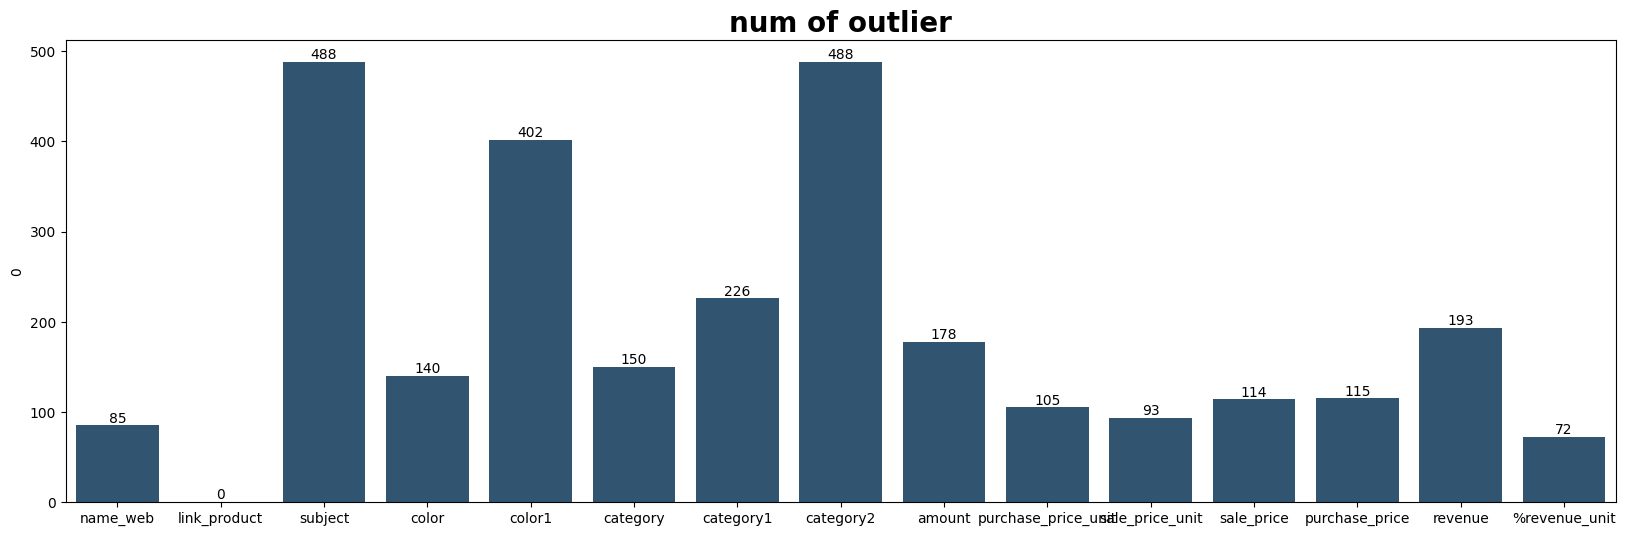

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
x = outlier.index

sns.barplot(ax=ax,x=x, y = outlier[0], data = outlier, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax.set_xticklabels(labels = x)
ax.set_xlabel('')

plt.title('num of outlier', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

### categorical data

In [ ]:
get_category_influence(dataset, 'revenue', plimit= 1)

(['name_web',
  'date',
  'color',
  'subject',
  'category2',
  'category1',
  'link_product',
  'category',
  'color1'],
 [0.01223879578325004,
  0.03727637782886764,
  0.4605608179599328,
  0.6761498765915908,
  0.883083864051482,
  0.9948764895349452,
  0.9972950794662959,
  0.9999936431012467,
  0.9999947315194808])

#### name_web

In [ ]:
def sort_groupcategory(database: pd.DataFrame, category: list, values: list, ascending=False):
    return database.groupby(category).sum()\
                    [values]\
                    .sort_values(values, ascending = ascending)

In [ ]:
sale_category1 = sort_groupcategory(dataset, category = 'name_web',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)
sale_category1.head()

revenue  amount  purchase_price    sale_price
name_web                                                      
macys       2.910679e+08   966.0    8.357621e+08  1.126830e+09
amazon      1.716481e+08   543.0    4.453719e+08  6.170200e+08
ashford     1.280076e+08   323.0    5.553204e+08  6.833280e+08
saksoff5th  9.615372e+07   360.0    4.137453e+08  5.098990e+08
ssense      6.918969e+07   187.0    2.763803e+08  3.455700e+08

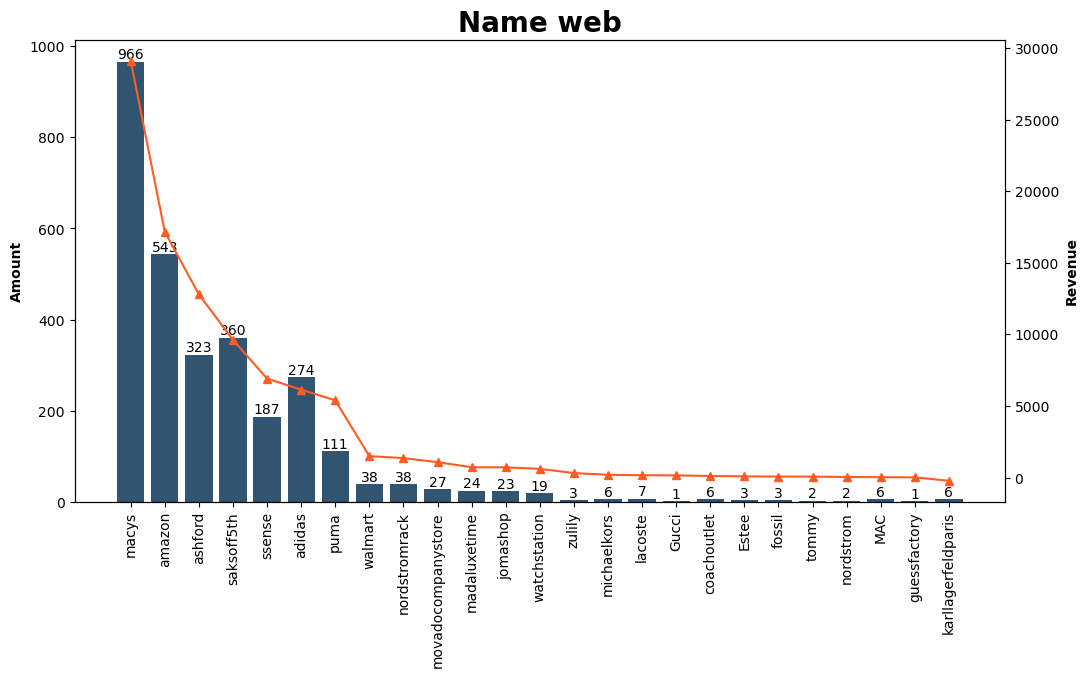

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x, rotation = 90)

plt.title('Name web', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [ ]:
df_name_web = dataset[['date','name_web','revenue']]\
    .groupby(['date', 'name_web'], as_index= False).sum()\
    .pivot(index = 'date',
           columns = 'name_web')

df_name_web[df_name_web < 0] = 0

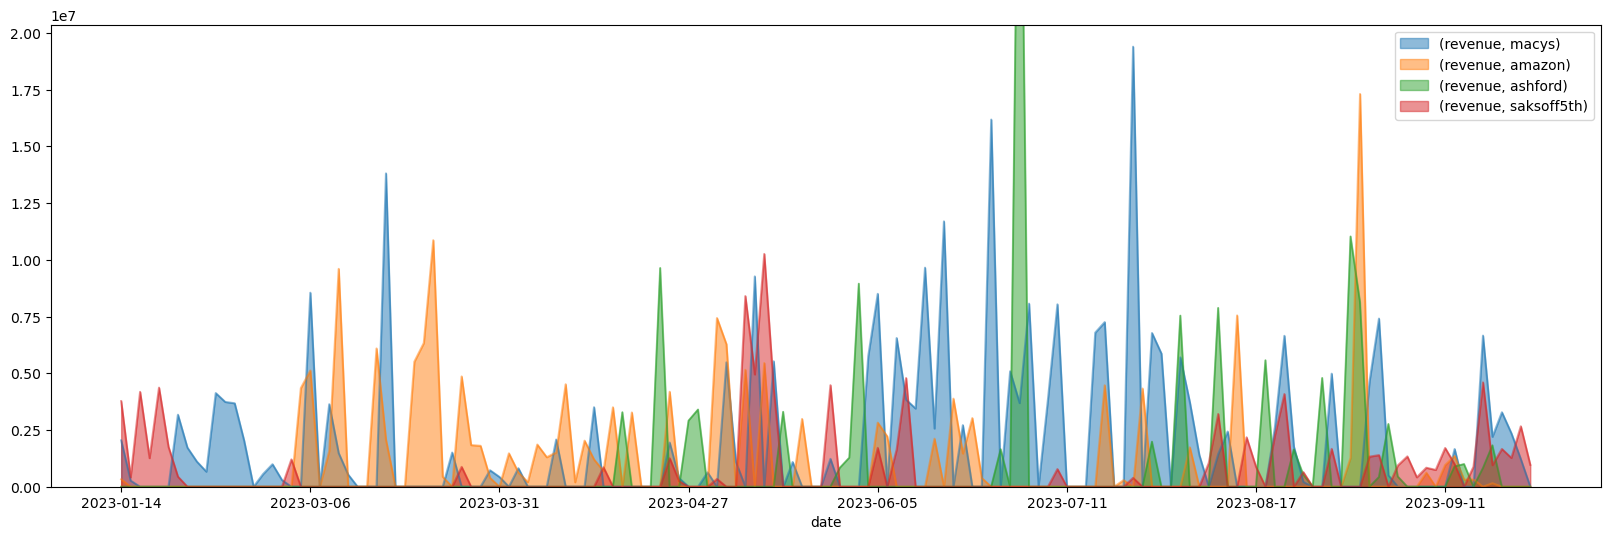

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for name_web in sale_category1.index[:4]:
    df_name_web[('revenue', name_web )].plot(kind = 'area', alpha = 0.5)

plt.legend()

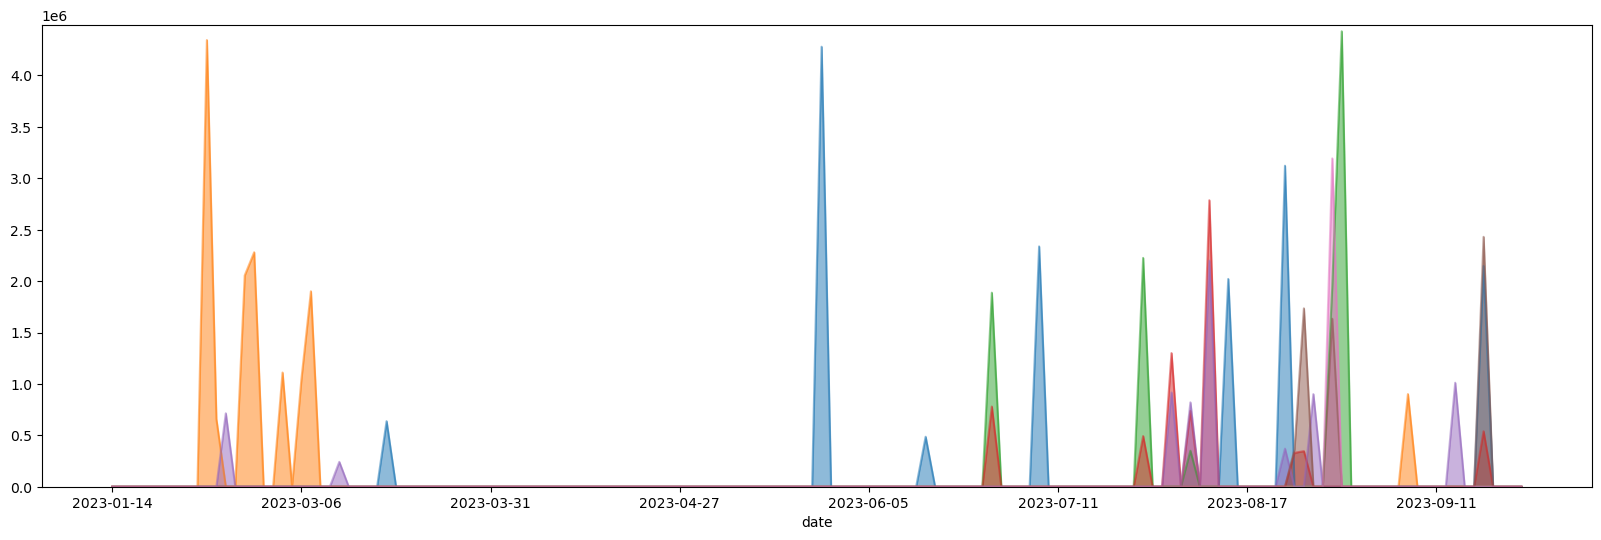

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for name_web in sale_category1.index[7:14]:
    df_name_web[('revenue', name_web )].plot(kind = 'area', alpha = 0.5)

plt.show()


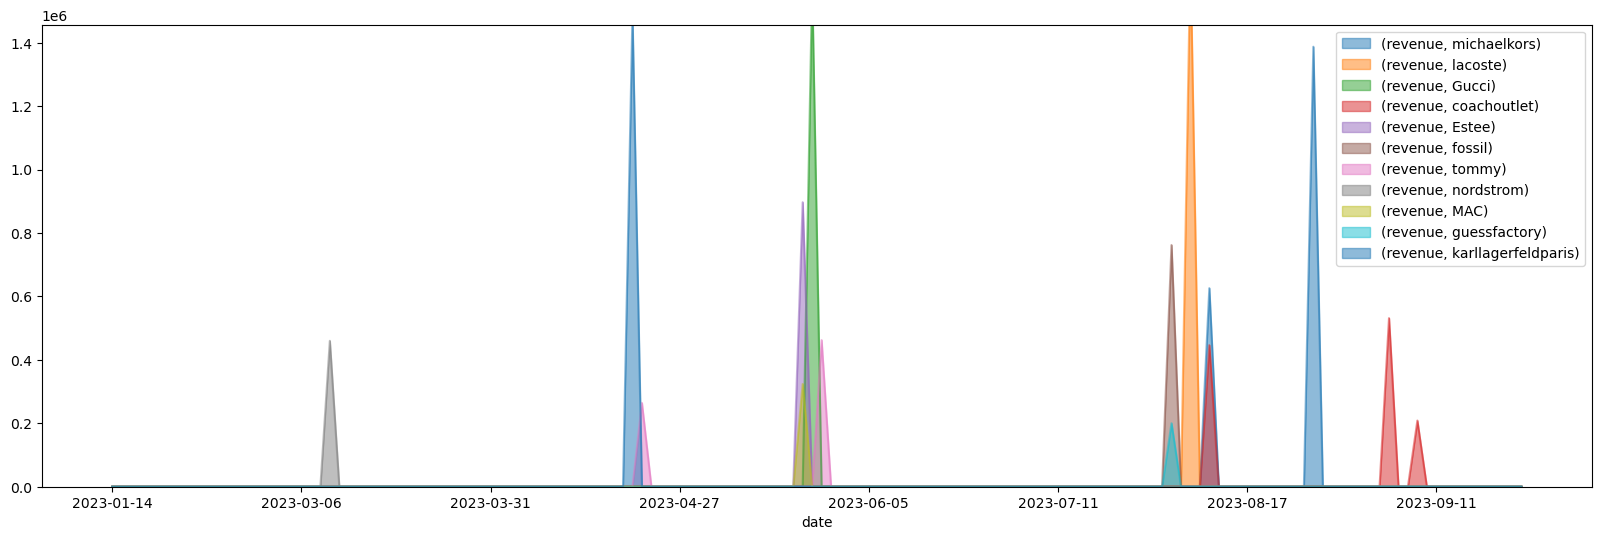

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for name_web in sale_category1.index[14:]:
    df_name_web[('revenue', name_web )].plot(kind = 'area', alpha = 0.5)

plt.legend()
plt.show()


In [ ]:
category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    _result = get_category_influence(dataset.loc[dataset.name_web.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])


In [ ]:
category[0] = ['id', 'name_web', 'date', 'color', 'subject', 'category2']

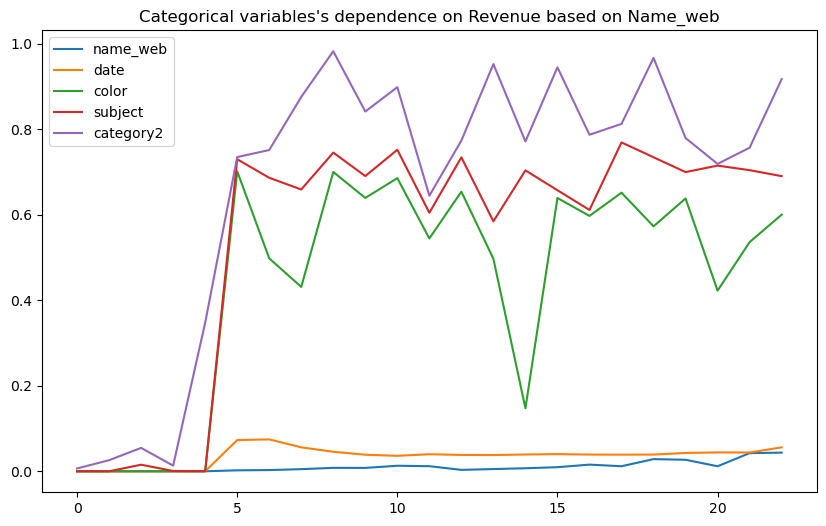

In [ ]:
df = pd.DataFrame(category[1:], columns = category[0])

fig, ax = plt.subplots(figsize=(10, 6))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue based on Name_web")
plt.legend()

In [ ]:
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)

In [ ]:
df.sort_values(['total'], ascending= True).head(10)

id      name_web          date         color       subject  category2  \
0    2  1.394837e-66  6.121852e-36  3.827197e-22  5.762930e-05   0.006652   
3    5  9.034189e-11  2.766037e-08  2.369885e-05  6.953903e-04   0.013166   
1    3  9.348336e-20  1.452564e-18  3.125968e-18  9.743284e-08   0.025918   
2    4  6.304501e-13  2.082936e-09  1.093927e-04  1.535193e-02   0.054719   
4    6  2.089531e-16  1.024042e-09  2.076020e-05  2.392206e-04   0.347445   
14  16  7.092523e-03  3.924267e-02  1.473090e-01  7.037425e-01   0.771431   
11  13  1.189286e-02  3.985495e-02  5.445651e-01  6.046148e-01   0.644512   
20  22  1.173781e-02  4.411472e-02  4.225339e-01  7.149128e-01   0.718925   
6    8  2.835648e-03  7.457565e-02  4.980547e-01  6.864220e-01   0.751332   
7    9  4.965062e-03  5.598526e-02  4.311627e-01  6.590884e-01   0.875617   

       total  
0   0.006710  
3   0.013885  
1   0.025918  
2   0.070180  
4   0.347705  
14  1.668817  
11  1.845440  
20  1.912224  
6   2.013220  
7   2.026819

In [ ]:
dataset1 = dataset.loc[dataset.name_web.isin(sale_category1.index[:5])]
dataset2 = dataset.loc[dataset.name_web.isin(sale_category1.index[:6])]
dataset3 = dataset.loc[dataset.name_web.isin(sale_category1.index[:16])]

#### Color

In [ ]:
sale_category1 = sort_groupcategory(dataset, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)
sale_category1.head()

revenue  amount  purchase_price    sale_price
color                                                                 
black               3.580811e+08  1119.0    1.145348e+09  1.503429e+09
white               1.760755e+08   529.0    4.396135e+08  6.156890e+08
gold_yellow         6.571215e+07   220.0    2.760979e+08  3.418100e+08
beige_yellow_brown  4.989345e+07   147.0    1.610305e+08  2.109240e+08
red                 4.003155e+07   132.0    1.105484e+08  1.505800e+08

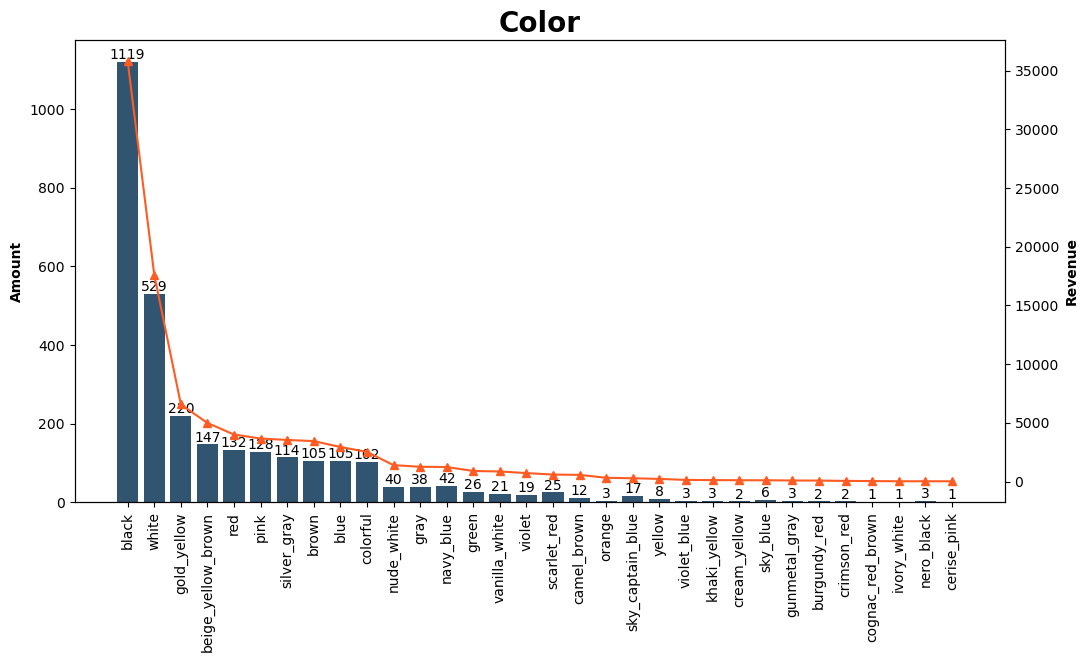

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x, rotation = 90)

plt.title('Color', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [ ]:
df_color = dataset[['date','color','revenue']]\
    .groupby(['date', 'color'], as_index= False).sum()\
    .pivot(index = 'date',
           columns = 'color')

df_color[df_color<0] = 0
df_color.head()

revenue                                                 \
color      beige_yellow_brown      black blue brown burgundy_red camel_brown   
date                                                                           
2023-01-14                NaN  4101080.0  NaN   NaN          NaN         NaN   
2023-01-15                NaN   684230.0  NaN   NaN          NaN         NaN   
2023-01-25                NaN  3741000.0  NaN   NaN          NaN         NaN   
2023-01-26                NaN  1260600.0  NaN   NaN          NaN         NaN   
2023-01-27                NaN  3975825.0  NaN   NaN          NaN         NaN   

                                                                           \
color      cerise_pink cognac_red_brown colorful cream_yellow crimson_red   
date                                                                        
2023-01-14         NaN              NaN      NaN          NaN         NaN   
2023-01-15         NaN              NaN      NaN          NaN         NaN   
2023-01-25         NaN              NaN      NaN          NaN         NaN   
2023-01-26         NaN              NaN      NaN          NaN         NaN   
2023-01-27         NaN              NaN      NaN          NaN         NaN   

                                                                               \
color      gold_yellow      gray green gunmetal_gray ivory_white khaki_yellow   
date                                                                            
2023-01-14         NaN       NaN   NaN           NaN         NaN          NaN   
2023-01-15         NaN       NaN   NaN           NaN         NaN          NaN   
2023-01-25         NaN       NaN   NaN           NaN         NaN          NaN   
2023-01-26         NaN       NaN   NaN           NaN         NaN          NaN   
2023-01-27         NaN  390200.0   NaN           NaN         NaN          NaN   

                                                                        \
color      navy_blue nero_black nude_white orange pink red scarlet_red   
date                                                                     
2023-01-14       NaN        NaN        NaN    NaN  NaN NaN    583520.0   
2023-01-15       NaN        NaN        NaN    NaN  NaN NaN         NaN   
2023-01-25       NaN        NaN        NaN    NaN  NaN NaN         NaN   
2023-01-26       NaN        NaN        NaN    NaN  NaN NaN         NaN   
2023-01-27       NaN        NaN        NaN    NaN  NaN NaN         NaN   

                                                                       \
color      silver_gray sky_blue sky_captain_blue vanilla_white violet   
date                                                                    
2023-01-14         NaN      NaN        1458800.0           NaN    NaN   
2023-01-15         NaN      NaN              NaN           NaN    NaN   
2023-01-25         NaN      NaN              NaN           NaN    NaN   
2023-01-26         NaN      NaN              NaN           NaN    NaN   
2023-01-27         NaN      NaN              NaN           NaN    NaN   

                                         
color      violet_blue     white yellow  
date                                     
2023-01-14         NaN       NaN    NaN  
2023-01-15         NaN       NaN    NaN  
2023-01-25         NaN  440200.0    NaN  
2023-01-26         NaN       NaN    NaN  
2023-01-27         NaN       NaN    NaN

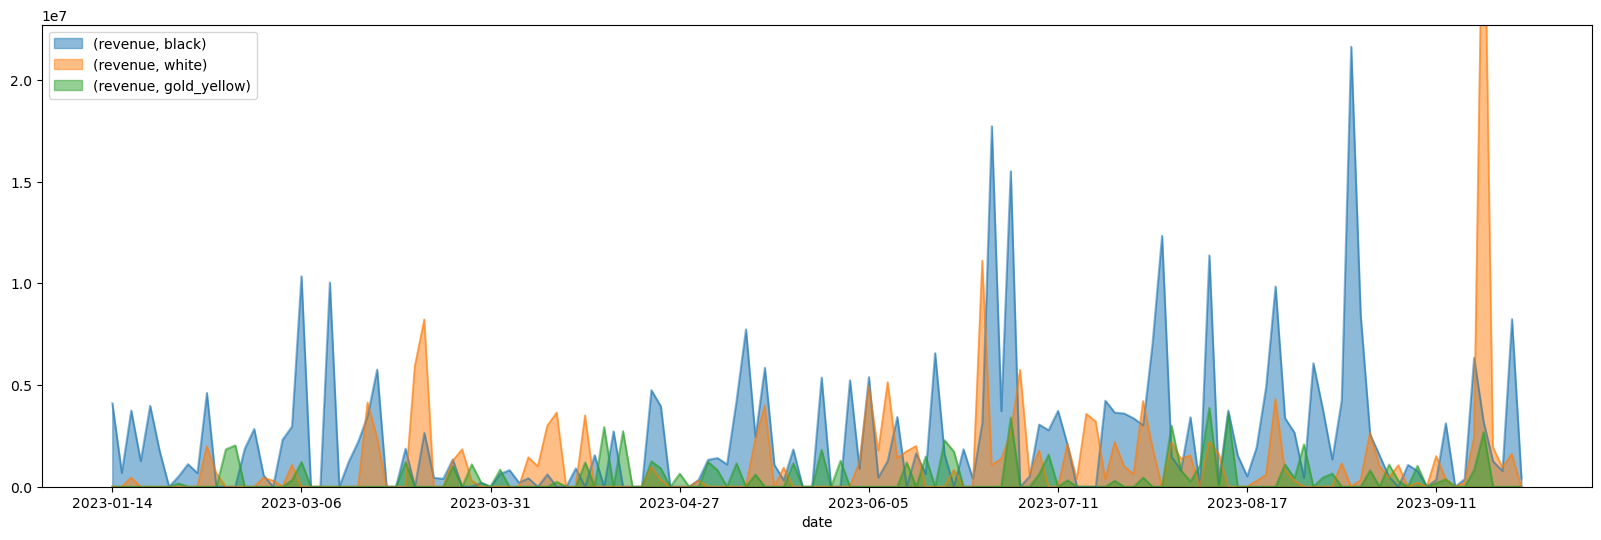

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for color in sale_category1[sale_category1.revenue > 5*1e7].index:
    df_color[('revenue', color )].plot(kind = 'area', alpha = 0.5)

plt.legend()

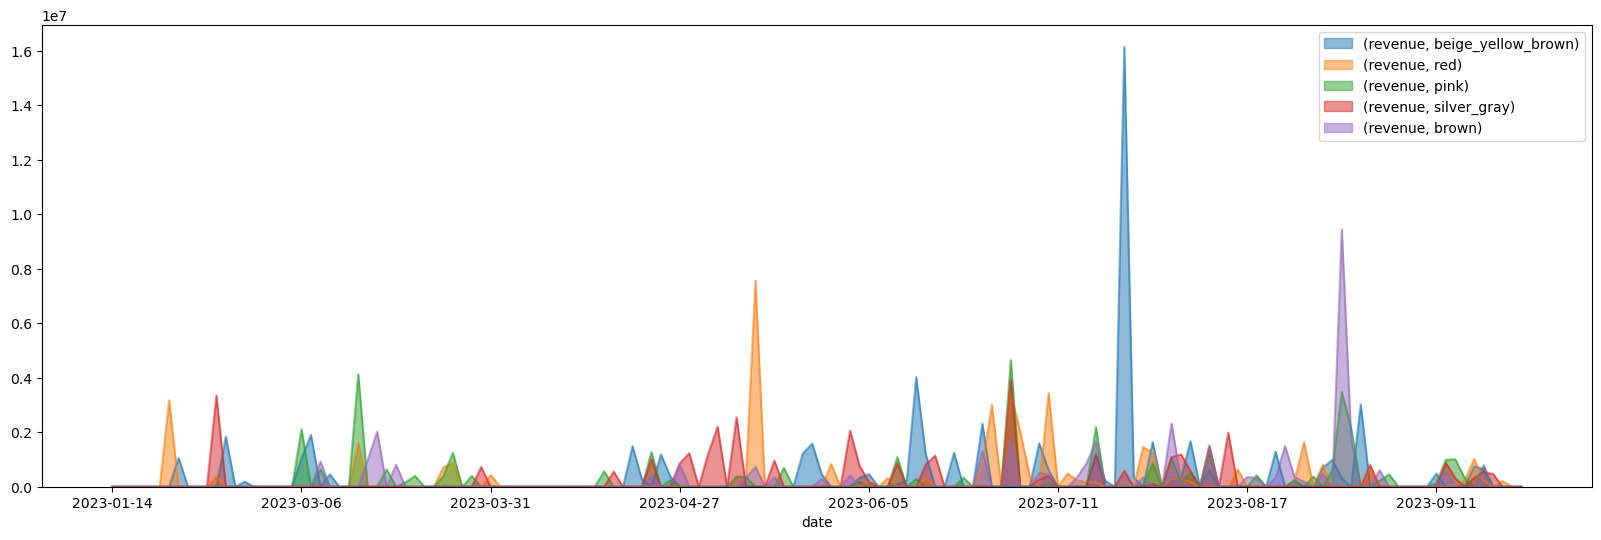

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for color in sale_category1[(sale_category1.revenue > 3*1e7) & (sale_category1.revenue < 5*1e7)].index:
    df_color[('revenue', color )].plot(kind = 'area', alpha = 0.5)

plt.legend()

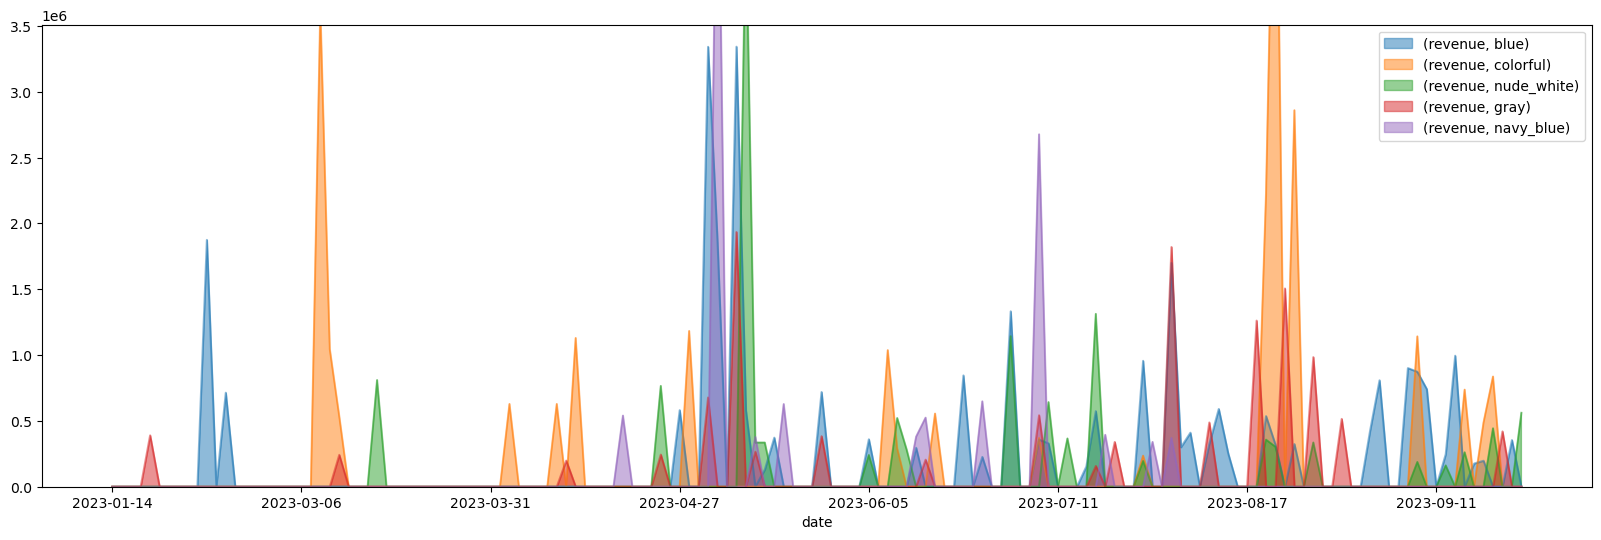

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for color in sale_category1[(sale_category1.revenue < 3*1e7) & (sale_category1.revenue> 1*1e7)].index:
    df_color[('revenue', color )].plot(kind = 'area', alpha = 0.5)

plt.legend()

In [ ]:
category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    print(i)
    _result = get_category_influence(dataset.loc[dataset.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])

Text(0.5, 1.0, "Categorical variables's dependence on Revenue based on Color")

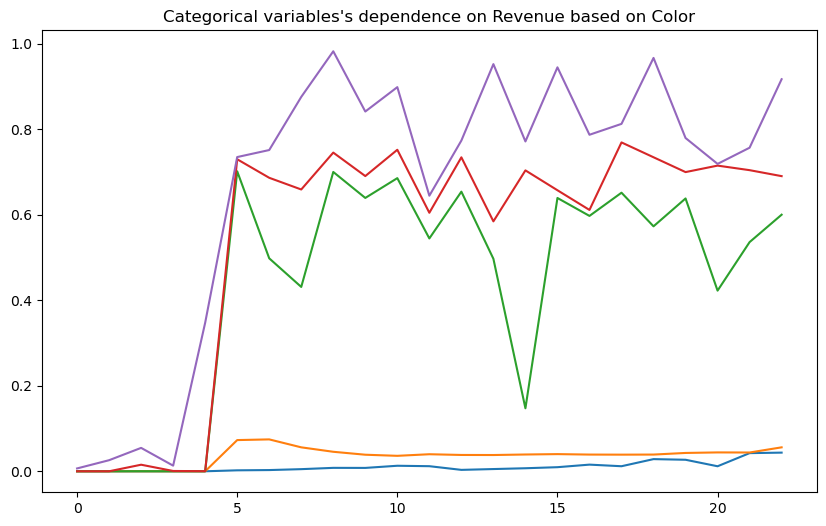

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue based on Color")

In [ ]:
sale_category1 = sort_groupcategory(dataset1, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)

category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    print(i)
    _result = get_category_influence(dataset1.loc[dataset1.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])


In [ ]:
df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

id      name_web          date     color   subject  category2     total
15  17  6.867551e-10  1.527413e-07  0.000019  0.000039   0.001656  0.001714
10  12  6.138355e-09  1.261373e-06  0.000003  0.000076   0.001727  0.001806
9   11  8.723472e-09  1.205686e-06  0.000003  0.000164   0.005362  0.005531
13  15  2.617664e-09  4.650767e-07  0.000013  0.000061   0.009932  0.010007
12  14  3.618014e-09  4.459611e-07  0.000012  0.000068   0.011022  0.011103
14  16  2.346826e-09  4.965882e-07  0.000016  0.000057   0.019005  0.019078
25  27  7.723060e-11  2.289638e-08  0.000036  0.000240   0.052338  0.052614
24  26  7.621575e-11  1.995851e-08  0.000035  0.000352   0.073499  0.073887
21  23  8.001044e-11  2.042012e-08  0.000035  0.000066   0.088699  0.088800
23  25  7.724810e-11  2.047471e-08  0.000035  0.000114   0.089374  0.089523

Text(0.5, 1.0, "Categorical variables's dependence on Revenue1 based on Color")

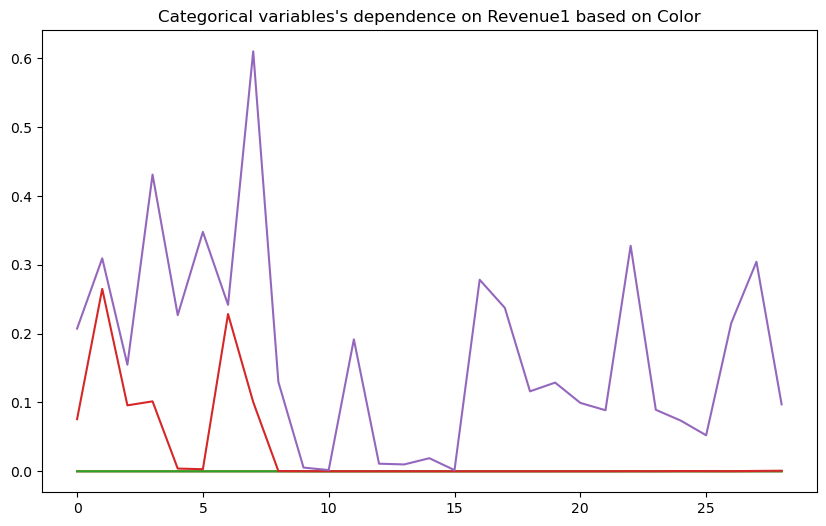

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue1 based on Color")

In [ ]:
sale_category1 = sort_groupcategory(dataset2, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)

category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    _result = get_category_influence(dataset2.loc[dataset2.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

id      name_web          date         color   subject  category2  \
15  17  1.810393e-15  7.606947e-09  4.762134e-07  0.000037   0.006302   
27  29  1.474994e-16  1.443659e-09  3.376651e-05  0.000143   0.007132   
28  30  1.614367e-16  1.181446e-09  2.076020e-05  0.000147   0.030616   
22  24  1.318883e-16  7.625712e-10  3.182964e-05  0.000086   0.046856   
13  15  7.778410e-15  2.755808e-08  7.369206e-07  0.000055   0.049150   
20  22  1.572541e-16  1.019496e-09  1.959747e-05  0.000026   0.069038   
23  25  1.547082e-16  9.242391e-10  1.041124e-05  0.000033   0.071526   
14  16  1.988602e-15  8.633856e-09  6.795376e-07  0.000040   0.088684   
1    3  6.824587e-16  7.592484e-12  1.436539e-11  0.001761   0.088510   
10  12  3.943457e-14  2.371478e-11  6.431245e-08  0.000076   0.101973   

       total  
15  0.006339  
27  0.007309  
28  0.030783  
22  0.046973  
13  0.049206  
20  0.069084  
23  0.071569  
14  0.088724  
1   0.090271  
10  0.102050

Text(0.5, 1.0, "Categorical variables's dependence on Revenue2 based on Color")

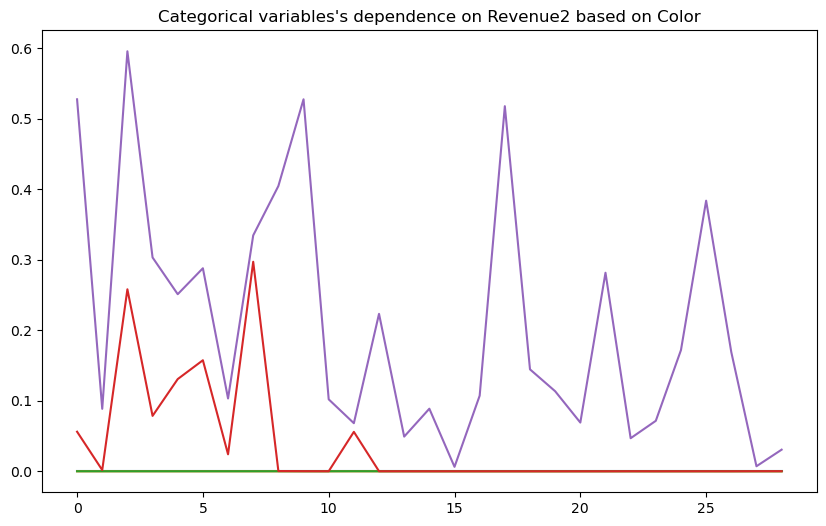

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue2 based on Color")

In [ ]:
sale_category1 = sort_groupcategory(dataset3, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)

category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    _result = get_category_influence(dataset3.loc[dataset3.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

id  name_web      date     color   subject  category2     total
9   11  0.009774  0.051010  0.162720  0.333258   0.615763  1.172525
19  21  0.008497  0.041619  0.233608  0.512795   0.720043  1.516563
15  17  0.033726  0.065430  0.079975  0.653486   0.749726  1.582343
20  22  0.008411  0.042651  0.165510  0.680428   0.693465  1.590465
16  18  0.032421  0.064564  0.102986  0.503425   0.925211  1.628607
10  12  0.012349  0.047009  0.147830  0.583452   0.888351  1.678990
17  19  0.010434  0.062216  0.084944  0.620438   0.953393  1.731425
12  14  0.034495  0.113938  0.184383  0.583384   0.903558  1.819757
18  20  0.009518  0.051920  0.186771  0.768357   0.823882  1.840448
14  16  0.039664  0.087478  0.114093  0.782151   0.817338  1.840725

Text(0.5, 1.0, "Categorical variables's dependence on Revenue3 based on Color")

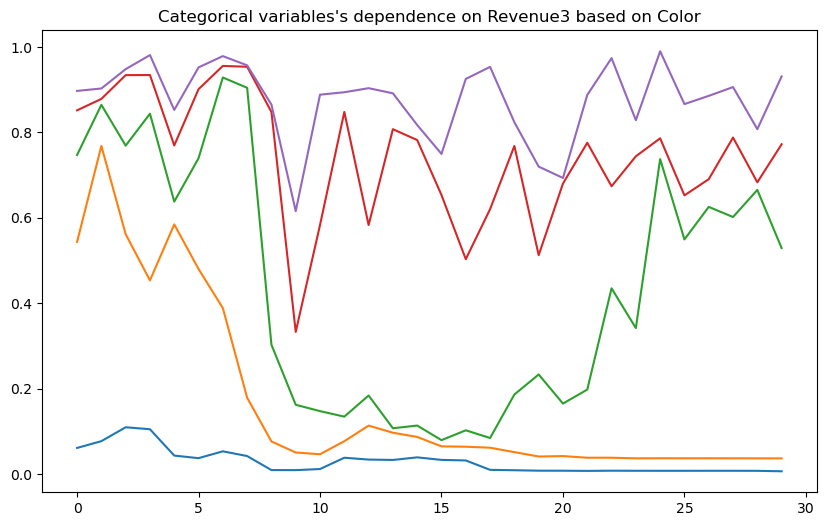

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue3 based on Color")

In [ ]:
from preporcesing_saledata import color_general
dataset4 = dataset1.copy()
dataset4['color'] = dataset4['color'].apply(lambda x: color_general(x) if x in (sale_category1.index[17:]) else x)
dataset4.head()

date  year  month  day name_web  \
0  2023-01-14  2023      1   14   amazon   
1  2023-01-14  2023      1   14    macys   
2  2023-01-14  2023      1   14    macys   
3  2023-01-14  2023      1   14    macys   
4  2023-01-14  2023      1   14    macys   

                                        link_product subject        color  \
0  https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...       u        black   
1  https://www.macys.com/shop/product/tommy-hilfi...       w  scarlet_red   
2  https://www.macys.com/shop/product/tommy-hilfi...       w  scarlet_red   
3  https://www.macys.com/shop/product/tommy-hilfi...       w         blue   
4  https://www.macys.com/shop/product/tommy-hilfi...       w         blue   

             color1 category category1 category2  amount  purchase_price_unit  \
0             black      bag       bag       bag     1.0            1560900.0   
1       scarlet_red    dress     dress  clothing     2.0             744120.0   
2       scarlet_red    dress     dress  clothing     2.0             744120.0   
3  sky_captain_blue    dress     dress  clothing     6.0             744120.0   
4  sky_captain_blue    dress     dress  clothing     2.0             744120.0   

   sale_price_unit  sale_price  purchase_price   revenue  %revenue_unit  
0        1890000.0   1890000.0       1560900.0  329100.0      17.412698  
1         890000.0   1780000.0       1488240.0  291760.0      16.391011  
2         890000.0   1780000.0       1488240.0  291760.0      16.391011  
3         890000.0   5340000.0       4464720.0  875280.0      16.391011  
4         890000.0   1780000.0       1488240.0  291760.0      16.391011

In [ ]:
sale_category1 = sort_groupcategory(dataset4, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)

In [ ]:
category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    _result = get_category_influence(dataset4.loc[dataset4.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

id      name_web          date         color   subject  category2  \
13  15  1.530222e-09  2.403214e-07  9.775306e-07  0.000006   0.000039   
10  12  3.121675e-09  4.749030e-07  8.825028e-06  0.000049   0.021768   
15  17  1.024840e-10  1.854837e-08  4.951288e-06  0.000024   0.029484   
14  16  3.746020e-10  6.106359e-08  1.103023e-05  0.000025   0.046744   
9   11  4.386625e-09  2.418813e-07  4.536157e-07  0.000112   0.055183   
11  13  2.401012e-09  3.141437e-07  3.701380e-06  0.000045   0.068610   
8   10  1.112318e-07  1.427885e-06  4.761511e-06  0.000257   0.072452   
12  14  2.105200e-09  1.807679e-07  2.840276e-05  0.000043   0.103301   
1    3  2.112606e-14  3.597118e-14  8.201498e-14  0.058744   0.156991   
5    7  1.022385e-19  1.748327e-16  1.527319e-06  0.040866   0.236109   

       total  
13  0.000046  
10  0.021826  
15  0.029512  
14  0.046780  
9   0.055296  
11  0.068659  
8   0.072715  
12  0.103373  
1   0.215734  
5   0.276976

In [ ]:
dataset8 = dataset4.loc[dataset4.color.isin(sale_category1.index[:17])]

Text(0.5, 1.0, "Categorical variables's dependence on Revenue4 based on Color")

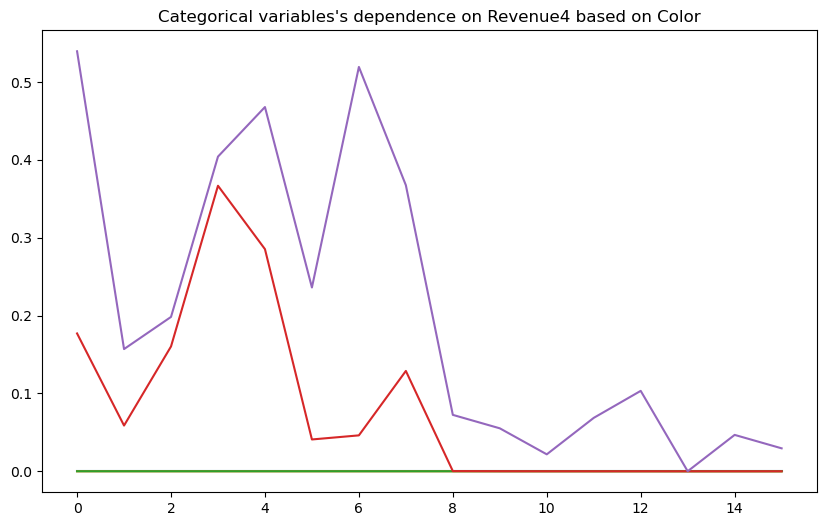

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue4 based on Color")

In [ ]:
from preporcesing_saledata import color_general
dataset5 = dataset2.copy()
dataset5['color'] = dataset5['color'].apply(lambda x: color_general(x) if x in (sale_category1.index[29:]) else x)
dataset5.head()

date  year  month  day name_web  \
0  2023-01-14  2023      1   14   amazon   
1  2023-01-14  2023      1   14    macys   
2  2023-01-14  2023      1   14    macys   
3  2023-01-14  2023      1   14    macys   
4  2023-01-14  2023      1   14    macys   

                                        link_product subject  \
0  https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...       u   
1  https://www.macys.com/shop/product/tommy-hilfi...       w   
2  https://www.macys.com/shop/product/tommy-hilfi...       w   
3  https://www.macys.com/shop/product/tommy-hilfi...       w   
4  https://www.macys.com/shop/product/tommy-hilfi...       w   

              color            color1 category category1 category2  amount  \
0             black             black      bag       bag       bag     1.0   
1       scarlet_red       scarlet_red    dress     dress  clothing     2.0   
2       scarlet_red       scarlet_red    dress     dress  clothing     2.0   
3  sky_captain_blue  sky_captain_blue    dress     dress  clothing     6.0   
4  sky_captain_blue  sky_captain_blue    dress     dress  clothing     2.0   

   purchase_price_unit  sale_price_unit  sale_price  purchase_price   revenue  \
0            1560900.0        1890000.0   1890000.0       1560900.0  329100.0   
1             744120.0         890000.0   1780000.0       1488240.0  291760.0   
2             744120.0         890000.0   1780000.0       1488240.0  291760.0   
3             744120.0         890000.0   5340000.0       4464720.0  875280.0   
4             744120.0         890000.0   1780000.0       1488240.0  291760.0   

   %revenue_unit  
0      17.412698  
1      16.391011  
2      16.391011  
3      16.391011  
4      16.391011

In [ ]:
sale_category1 = sort_groupcategory(dataset5, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)

In [ ]:
category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    _result = get_category_influence(dataset5.loc[dataset5.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

id      name_web          date         color   subject  category2  \
15  17  1.810393e-15  7.606947e-09  4.762134e-07  0.000037   0.006302   
27  29  1.474994e-16  1.443659e-09  3.376651e-05  0.000143   0.007132   
28  30  1.614367e-16  1.181446e-09  2.076020e-05  0.000147   0.030616   
22  24  1.318883e-16  7.625712e-10  3.182964e-05  0.000086   0.046856   
13  15  7.778410e-15  2.755808e-08  7.369206e-07  0.000055   0.049150   
20  22  1.572541e-16  1.019496e-09  1.959747e-05  0.000026   0.069038   
23  25  1.547082e-16  9.242391e-10  1.041124e-05  0.000033   0.071526   
14  16  1.988602e-15  8.633856e-09  6.795376e-07  0.000040   0.088684   
1    3  6.824587e-16  7.592484e-12  1.436539e-11  0.001761   0.088510   
10  12  3.943457e-14  2.371478e-11  6.431245e-08  0.000076   0.101973   

       total  
15  0.006339  
27  0.007309  
28  0.030783  
22  0.046973  
13  0.049206  
20  0.069084  
23  0.071569  
14  0.088724  
1   0.090271  
10  0.102050

In [ ]:
dataset9  = dataset5.loc[dataset5.color.isin(sale_category1.index[:25])]
dataset10 = dataset5.loc[dataset5.color.isin(sale_category1.index[:26])]

Text(0.5, 1.0, "Categorical variables's dependence on Revenue5 based on Color")

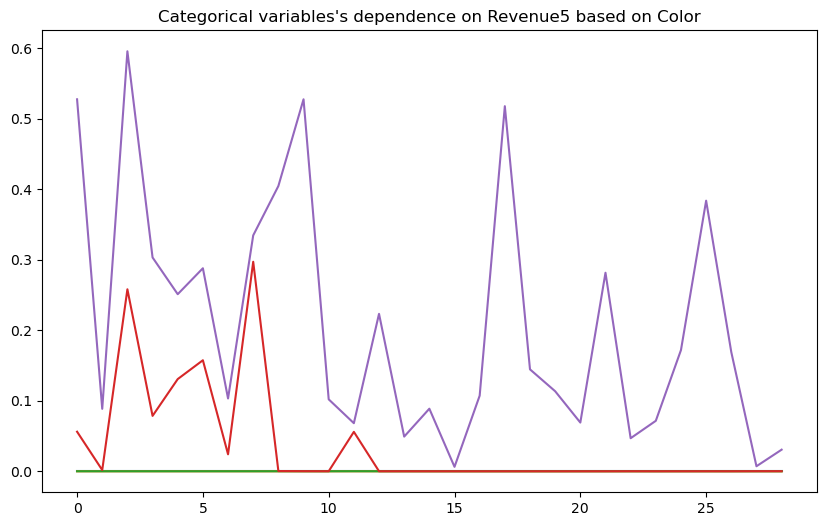

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue5 based on Color")

In [ ]:
from preporcesing_saledata import color_general
dataset6 = dataset2.copy()
dataset6['color'] = dataset6['color'].apply(lambda x: color_general(x) if x in (sale_category1.index[17:]) else x)
dataset6.head()

date  year  month  day name_web  \
0  2023-01-14  2023      1   14   amazon   
1  2023-01-14  2023      1   14    macys   
2  2023-01-14  2023      1   14    macys   
3  2023-01-14  2023      1   14    macys   
4  2023-01-14  2023      1   14    macys   

                                        link_product subject        color  \
0  https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...       u        black   
1  https://www.macys.com/shop/product/tommy-hilfi...       w  scarlet_red   
2  https://www.macys.com/shop/product/tommy-hilfi...       w  scarlet_red   
3  https://www.macys.com/shop/product/tommy-hilfi...       w         blue   
4  https://www.macys.com/shop/product/tommy-hilfi...       w         blue   

             color1 category category1 category2  amount  purchase_price_unit  \
0             black      bag       bag       bag     1.0            1560900.0   
1       scarlet_red    dress     dress  clothing     2.0             744120.0   
2       scarlet_red    dress     dress  clothing     2.0             744120.0   
3  sky_captain_blue    dress     dress  clothing     6.0             744120.0   
4  sky_captain_blue    dress     dress  clothing     2.0             744120.0   

   sale_price_unit  sale_price  purchase_price   revenue  %revenue_unit  
0        1890000.0   1890000.0       1560900.0  329100.0      17.412698  
1         890000.0   1780000.0       1488240.0  291760.0      16.391011  
2         890000.0   1780000.0       1488240.0  291760.0      16.391011  
3         890000.0   5340000.0       4464720.0  875280.0      16.391011  
4         890000.0   1780000.0       1488240.0  291760.0      16.391011

In [ ]:
sale_category1 = sort_groupcategory(dataset6, category = 'color',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)

category = [['id', 'name_web', 'date', 'color', 'subject', 'category2']]
for i in range(2, len(sale_category1.index)):
    _result = get_category_influence(dataset6.loc[dataset6.color.isin(sale_category1.index[:i])], 'revenue', plimit= 1)
    category.append([i] + _result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

id      name_web          date         color   subject  category2  \
14  16  1.324047e-15  3.457537e-09  3.831942e-06  0.000024   0.001593   
13  15  6.292850e-15  1.404766e-08  2.846876e-06  0.000034   0.003542   
8   10  1.223692e-12  3.124792e-07  3.971498e-07  0.000239   0.006062   
15  17  1.088159e-15  2.686378e-09  1.727996e-06  0.000022   0.007906   
9   11  4.114230e-14  1.031352e-09  3.016403e-08  0.000111   0.115391   
10  12  2.690748e-14  3.076094e-08  3.250707e-08  0.000049   0.145725   
4    6  5.555621e-22  2.321646e-18  8.794194e-09  0.035376   0.159361   
16  18  2.526320e-16  1.124668e-09  4.754288e-06  0.000021   0.215069   
0    2  1.299314e-14  7.365672e-14  2.119040e-12  0.092170   0.143039   
3    5  7.852336e-23  1.120146e-20  2.105623e-08  0.106958   0.131632   

       total  
14  0.001621  
13  0.003580  
8   0.006302  
15  0.007930  
9   0.115502  
10  0.145774  
4   0.194737  
16  0.215095  
0   0.235209  
3   0.238590

Text(0.5, 1.0, "Categorical variables's dependence on Revenue6 based on Color")

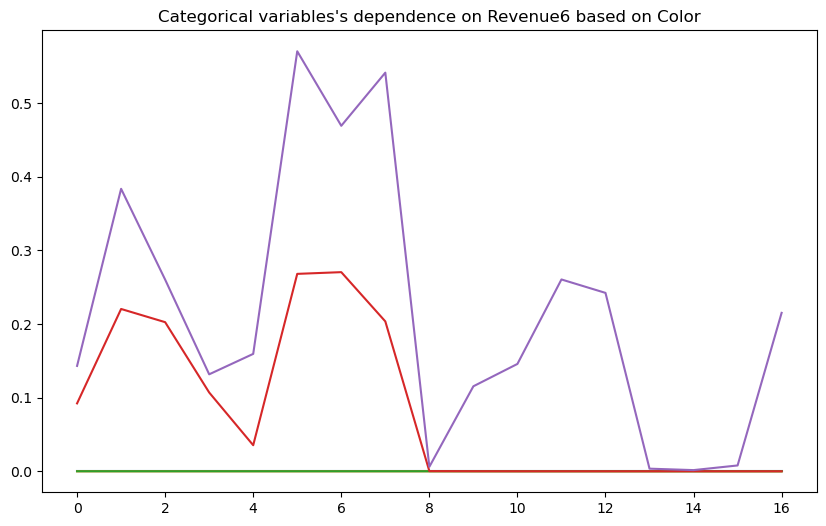

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6 ))

for column in category[0][1:]:
    df[column].plot(kind = 'line')

plt.title("Categorical variables's dependence on Revenue6 based on Color")

#### subject

In [ ]:
sale_category1 = sort_groupcategory(dataset, category = 'subject',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)
sale_category1.head()

revenue  amount  purchase_price    sale_price
subject                                                    
w        6.271753e+08  2019.0    2.059707e+09  2.686882e+09
u        1.619988e+08   444.0    5.501392e+08  7.121380e+08
m        1.532668e+08   516.0    4.269832e+08  5.802500e+08

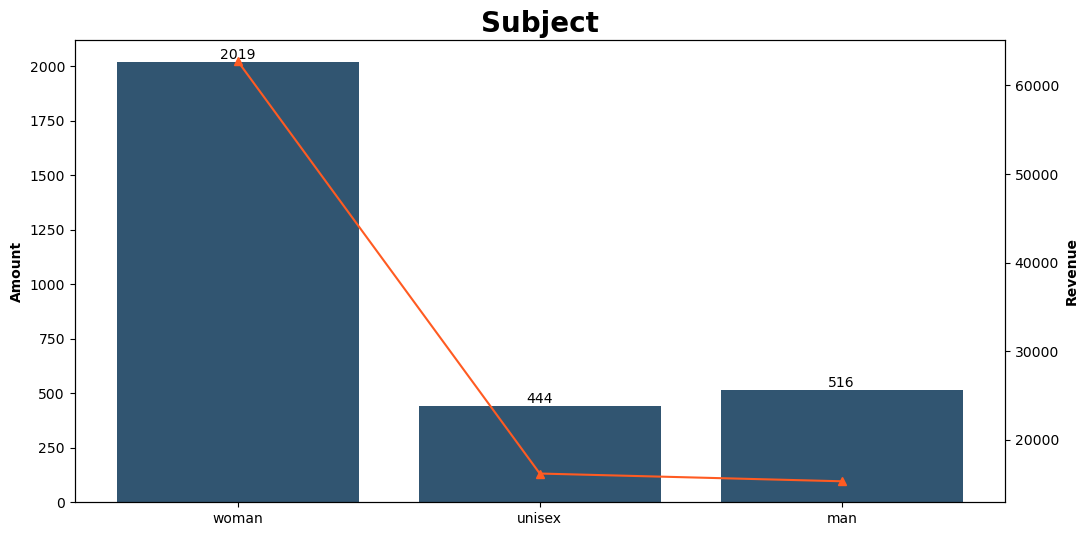

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = ['woman', 'unisex', 'man'])

plt.title('Subject', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [ ]:
df_subject = dataset[['date','subject','revenue']]\
    .groupby(['date', 'subject'], as_index= False).sum()\
    .pivot(index = 'date',
           columns = 'subject')

df_subject[df_subject<0] = 0
df_subject.head()

revenue                      
subject          m          u          w
date                                    
2023-01-14     NaN  2910300.0  3233100.0
2023-01-15     NaN        NaN   684230.0
2023-01-25     NaN        NaN  4181200.0
2023-01-26     NaN        NaN  1260600.0
2023-01-27     NaN   390200.0  3975825.0

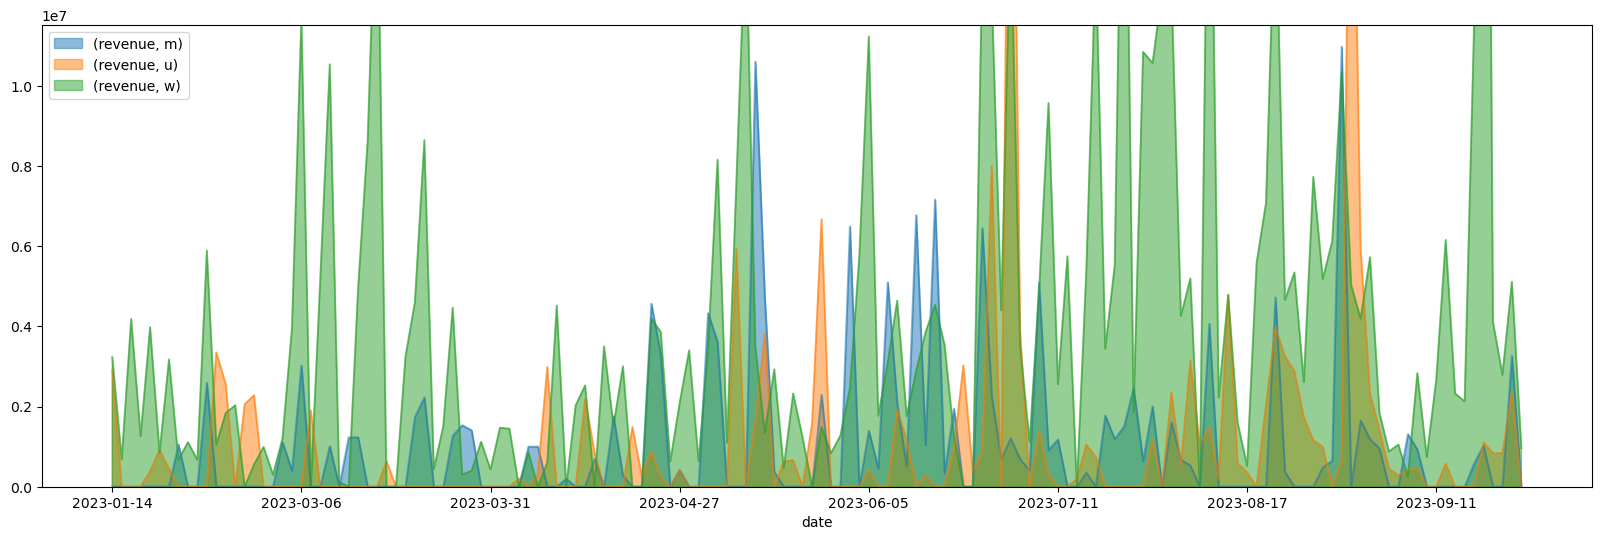

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for subject in df_subject.columns:
    df_subject[subject].plot(kind = 'area', alpha = 0.5)

plt.legend()

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset8, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date     color   subject  category2     total
0  1.024840e-10  1.854837e-08  0.000005  0.000024   0.029484  0.029512

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset9, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date    color   subject  category2     total
0  1.547082e-16  9.242391e-10  0.00001  0.000033   0.071526  0.071569

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset10, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date     color   subject  category2     total
0  1.513177e-16  1.212022e-09  0.000033  0.000051     0.1718  0.171885

#### Category2

In [ ]:
sale_category1 = sort_groupcategory(dataset, category = 'category2',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)
sale_category1.head()

revenue  amount  purchase_price    sale_price
category2                                                    
accessory  3.655108e+08  1114.0    1.355697e+09  1.721208e+09
shoes      3.190022e+08   969.0    7.798658e+08  1.098868e+09
bag        1.357148e+08   399.0    5.336452e+08  6.693600e+08
clothing   1.002971e+08   407.0    3.016929e+08  4.019900e+08
other      1.125220e+07    36.0    2.820780e+07  3.946000e+07

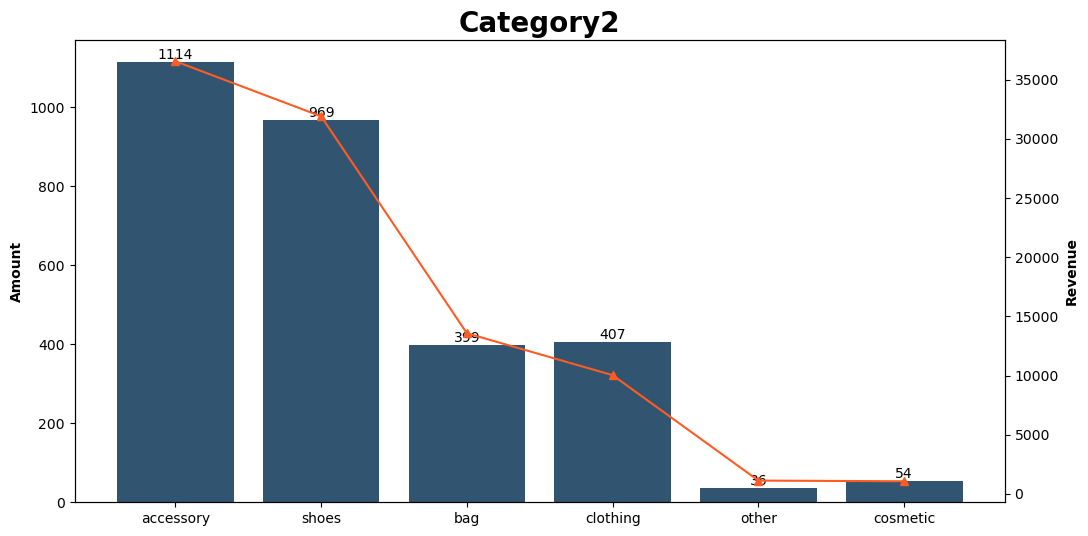

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x)

plt.title('Category2', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [ ]:
df_category2 = dataset[['date','category2','revenue']]\
    .groupby(['date', 'category2'], as_index= False).sum()\
    .pivot(index = 'date',
           columns = 'category2')

df_category2[df_category2<0] =0

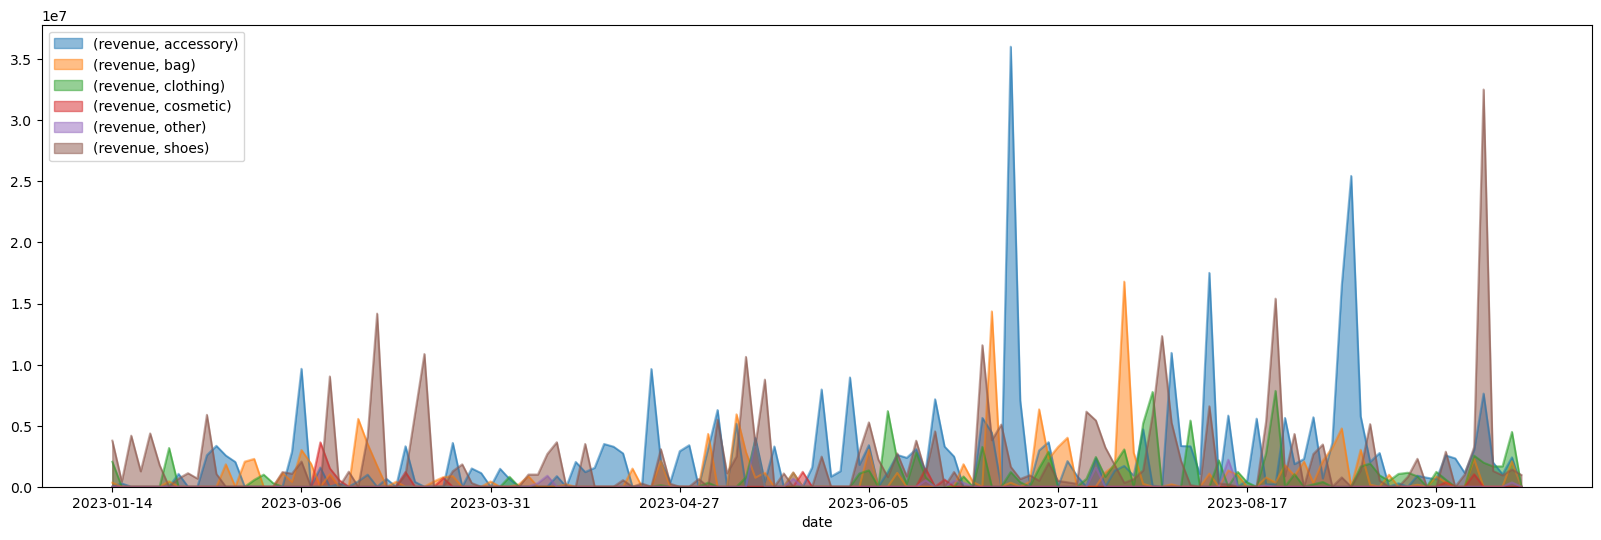

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

for category2 in df_category2.columns:
    df_category2[category2].plot(kind = 'area', alpha = 0.5)

plt.legend()

In [ ]:
sale_category1 = sort_groupcategory(dataset9, category = 'category2',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)
sale_category1.head()

revenue  amount  purchase_price    sale_price
category2                                                    
accessory  3.146145e+08   973.0    1.138543e+09  1.453158e+09
shoes      2.613472e+08   836.0    6.893418e+08  9.506890e+08
bag        1.212042e+08   357.0    4.627358e+08  5.839400e+08
clothing   9.772299e+07   398.0    2.961370e+08  3.938600e+08
other      1.125220e+07    36.0    2.820780e+07  3.946000e+07

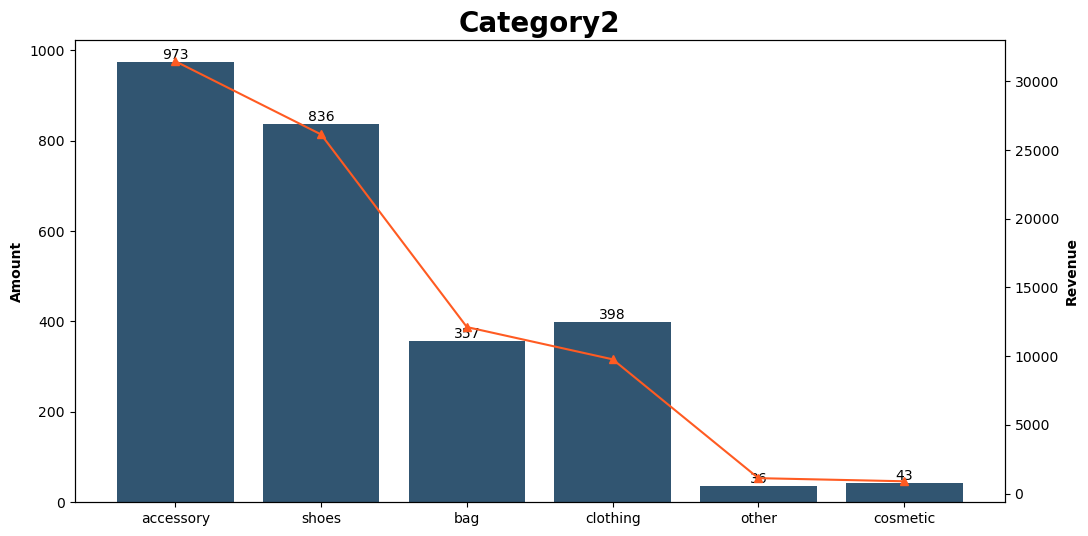

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x)

plt.title('Category2', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [ ]:
sale_category1 = sort_groupcategory(dataset10, category = 'category2',
                                    values= ['revenue', 'amount', 'purchase_price', 'sale_price'],
                                    ascending=False)
sale_category1.head()

revenue  amount  purchase_price    sale_price
category2                                                    
accessory  3.146145e+08   973.0    1.138543e+09  1.453158e+09
shoes      2.613472e+08   836.0    6.893418e+08  9.506890e+08
bag        1.220002e+08   359.0    4.665198e+08  5.885200e+08
clothing   9.772299e+07   398.0    2.961370e+08  3.938600e+08
other      1.125220e+07    36.0    2.820780e+07  3.946000e+07

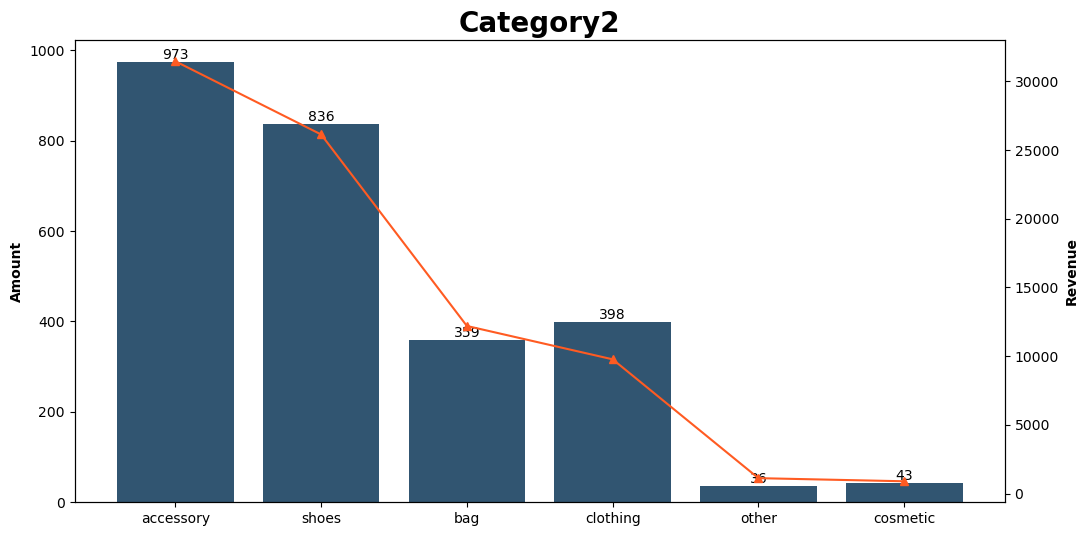

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x)

plt.title('Category2', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

In [ ]:
dataset11 = dataset9.copy()
dataset11['category2'].replace(to_replace= 'cosmetic', value = 'other', inplace = True)

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset9, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date    color   subject  category2     total
0  1.547082e-16  9.242391e-10  0.00001  0.000033   0.071526  0.071569

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset11, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date    color   subject  category2     total
0  1.547082e-16  9.242391e-10  0.00001  0.000033   0.011633  0.011676

In [ ]:
dataset12 = dataset10.copy()
dataset12['category2'].replace(to_replace= 'cosmetic', value = 'other', inplace = True)

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset10, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date     color   subject  category2     total
0  1.513177e-16  1.212022e-09  0.000033  0.000051     0.1718  0.171885

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2']]
_result = get_category_influence(dataset12, 'revenue', plimit= 1)
category.append(_result[1][:5])

df = pd.DataFrame(category[1:], columns = category[0])
df['total'] = df[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)
df.sort_values(['total'], ascending= True).head(10)

name_web          date     color   subject  category2     total
0  1.513177e-16  1.212022e-09  0.000033  0.000051   0.167731  0.167816

#### save_result

In [ ]:
_num = get_num_columns(dataset).columns.to_list()

In [ ]:
dataset11[['date', 'name_web', 'color', 'subject', 'category2'] + _num[1:]].head()

date name_web             color subject category2  month  day  \
0  2023-01-14   amazon             black       u       bag      1   14   
1  2023-01-14    macys       scarlet_red       w  clothing      1   14   
2  2023-01-14    macys       scarlet_red       w  clothing      1   14   
3  2023-01-14    macys  sky_captain_blue       w  clothing      1   14   
4  2023-01-14    macys  sky_captain_blue       w  clothing      1   14   

   amount  purchase_price_unit  sale_price_unit  sale_price  purchase_price  \
0     1.0            1560900.0        1890000.0   1890000.0       1560900.0   
1     2.0             744120.0         890000.0   1780000.0       1488240.0   
2     2.0             744120.0         890000.0   1780000.0       1488240.0   
3     6.0             744120.0         890000.0   5340000.0       4464720.0   
4     2.0             744120.0         890000.0   1780000.0       1488240.0   

    revenue  %revenue_unit  
0  329100.0      17.412698  
1  291760.0      16.391011  
2  291760.0      16.391011  
3  875280.0      16.391011  
4  291760.0      16.391011

In [ ]:
dataset11[['date', 'name_web', 'color', 'subject', 'category2'] + _num]\
.to_csv('Final_Category11.csv', index = False)

In [ ]:
dataset12[['date', 'name_web', 'color', 'subject', 'category2', 'revenue']]\
.to_csv('Final_Category12.csv', index = False)

### numeric data

In [ ]:
data_path = "Final_Category11.csv"
dataset11 = pd.read_csv(data_path)
dataset11.head()

date name_web             color subject category2  year  month  day  \
0  2023-01-14   amazon             black       u       bag  2023      1   14   
1  2023-01-14    macys       scarlet_red       w  clothing  2023      1   14   
2  2023-01-14    macys       scarlet_red       w  clothing  2023      1   14   
3  2023-01-14    macys  sky_captain_blue       w  clothing  2023      1   14   
4  2023-01-14    macys  sky_captain_blue       w  clothing  2023      1   14   

   amount  purchase_price_unit  sale_price_unit  sale_price  purchase_price  \
0     1.0            1560900.0        1890000.0   1890000.0       1560900.0   
1     2.0             744120.0         890000.0   1780000.0       1488240.0   
2     2.0             744120.0         890000.0   1780000.0       1488240.0   
3     6.0             744120.0         890000.0   5340000.0       4464720.0   
4     2.0             744120.0         890000.0   1780000.0       1488240.0   

    revenue  %revenue_unit  
0  329100.0      17.412698  
1  291760.0      16.391011  
2  291760.0      16.391011  
3  875280.0      16.391011  
4  291760.0      16.391011

In [ ]:
def affection_frame (database: pd.DataFrame, target: str):
    _affection = get_strong_week_affection(database, target)
    return pd.DataFrame(sum(list(_affection.values()),[]))

In [ ]:
df_test = affection_frame(dataset[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']], 'revenue')
df_test['dataset'] = 'dataset'
df_test.head()

name      coef        p_value  dataset
0           amount  0.438780   3.881212e-78  dataset
1   purchase_price  0.436852   2.156380e-77  dataset
2  sale_price_unit  0.368900   4.955639e-54  dataset
3       sale_price  0.729331  2.634671e-272  dataset

In [ ]:
df = affection_frame(dataset11[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']], 'revenue')
df['dataset'] = 'dataset11'
df_test = pd.concat([df_test, df])

In [ ]:
df_test.sort_values(['name', 'coef'], ascending= False)

name      coef        p_value    dataset
2  sale_price_unit  0.368900   4.955639e-54    dataset
1  sale_price_unit  0.368378   1.824562e-48  dataset11
2       sale_price  0.738021  4.556196e-253  dataset11
3       sale_price  0.729331  2.634671e-272    dataset
3   purchase_price  0.506444   1.379396e-96  dataset11
1   purchase_price  0.436852   2.156380e-77    dataset
0           amount  0.488109   7.570585e-89  dataset11
0           amount  0.438780   3.881212e-78    dataset

#### revenue

<Axes: >

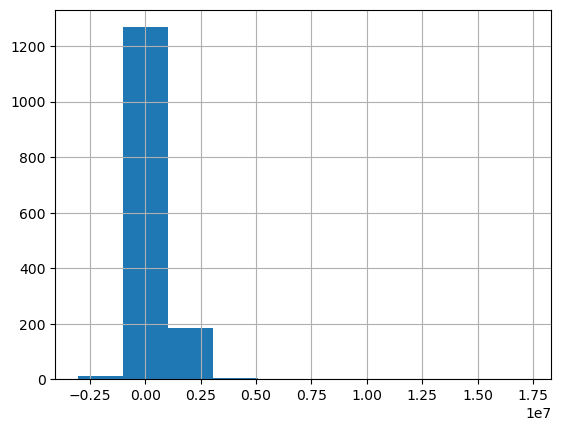

In [ ]:
dataset11.revenue.hist()

In [ ]:
dataset11[dataset11.revenue <= 0].head()

date    name_web               color subject category2  year  month  \
89  2023-03-12  saksoff5th               black       u       bag  2023      3   
90  2023-03-12  saksoff5th               black       u       bag  2023      3   
91  2023-03-12  saksoff5th  beige_yellow_brown       w       bag  2023      3   
93  2023-03-12  saksoff5th  beige_yellow_brown       w       bag  2023      3   
96  2023-03-12  saksoff5th  beige_yellow_brown       w     other  2023      3   

    day  amount  purchase_price_unit  sale_price_unit  sale_price  \
89   12     2.0            2114765.0        1990000.0   3980000.0   
90   12     1.0            2819765.0        2490000.0   2490000.0   
91   12     1.0            3054765.0              0.0         0.0   
93   12     1.0            4652765.0        3990000.0   3990000.0   
96   12     1.0             919770.0              0.0         0.0   

    purchase_price    revenue  %revenue_unit  
89       4229530.0  -249530.0      -6.269598  
90       2819765.0  -329765.0     -13.243574  
91       3054765.0 -3054765.0    -100.000000  
93       4652765.0  -662765.0     -16.610652  
96        919770.0  -919770.0    -100.000000

In [ ]:
df = affection_frame(dataset11[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']][dataset11.revenue> 0], 'revenue')
df['dataset'] = 'dataset11_revenue_positive'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
get_strong_week_affection(dataset11[dataset11.sale_price > 0], 'revenue')

df = affection_frame(dataset11[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']][dataset11.sale_price> 0], 'revenue')
df['dataset'] = 'dataset11_saleprice_positive'
df_test = pd.concat([df_test, df])

c:\Users\ndp17\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
df_test.groupby(['name', 'dataset']).sum().sort_values(['coef'], ascending = False)

coef        p_value
name            dataset                                              
sale_price      dataset11_revenue_positive    0.742017  6.157614e-250
                dataset11_saleprice_positive  0.738729  1.255993e-247
                dataset11                     0.738021  4.556196e-253
                dataset                       0.729331  2.634671e-272
purchase_price  dataset11_revenue_positive    0.525369  3.904489e-102
                dataset11_saleprice_positive  0.519456  6.561007e-100
                dataset11                     0.506444   1.379396e-96
amount          dataset11_saleprice_positive  0.488912   4.908205e-87
                dataset11_revenue_positive    0.488858   1.172554e-86
                dataset11                     0.488109   7.570585e-89
                dataset                       0.438780   3.881212e-78
purchase_price  dataset                       0.436852   2.156380e-77
sale_price_unit dataset                       0.368900   4.955639e-54
                dataset11                     0.368378   1.824562e-48
                dataset11_revenue_positive    0.339567   7.165114e-40
                dataset11_saleprice_positive  0.333824   1.143617e-38

In [ ]:
dataset13 = dataset11[dataset11.revenue >0]

<Axes: >

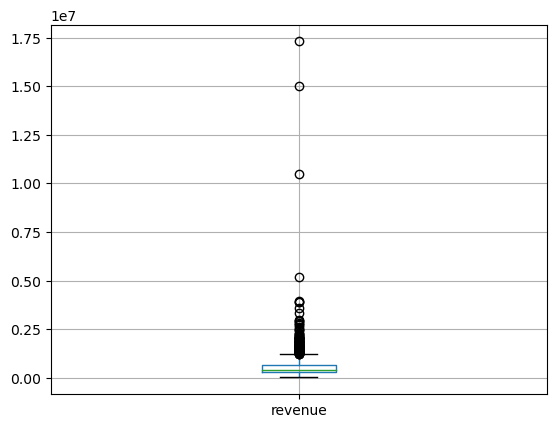

In [ ]:
dataset13.boxplot("revenue")

In [ ]:
dataset11[dataset11.revenue > 5e6]

date name_web               color subject  category2  year  month  \
645   2023-06-30  ashford               black       u  accessory  2023      6   
887   2023-07-25    macys  beige_yellow_brown       w        bag  2023      7   
1264  2023-08-30  ashford               brown       m  accessory  2023      8   
1273  2023-08-31   amazon               black       u  accessory  2023      8   

      day  amount  purchase_price_unit  sale_price_unit  sale_price  \
645    30     2.0            4250197.6        9500000.0  19000000.0   
887    25     2.0            1386000.0        8900000.0  17800000.0   
1264   30     2.0               1760.0        2590000.0   5180000.0   
1273   31     5.0            3437850.0        6900000.0  34500000.0   

      purchase_price     revenue  %revenue_unit  
645        8500395.2  10499604.8      55.261078  
887        2772000.0  15028000.0      84.426966  
1264          3520.0   5176480.0      99.932046  
1273      17189250.0  17310750.0      50.176087

In [ ]:
dataset11[dataset11.revenue > 3e6]

date    name_web               color subject  category2  year  \
293   2023-05-04      amazon                blue       m        bag  2023   
317   2023-05-08  saksoff5th               black       u        bag  2023   
465   2023-06-08       macys               white       m   clothing  2023   
645   2023-06-30     ashford               black       u  accessory  2023   
697   2023-07-01       macys               white       u  accessory  2023   
887   2023-07-25       macys  beige_yellow_brown       w        bag  2023   
1264  2023-08-30     ashford               brown       m  accessory  2023   
1273  2023-08-31      amazon               black       u  accessory  2023   
1284  2023-09-01      adidas               black       u  accessory  2023   

      month  day  amount  purchase_price_unit  sale_price_unit  sale_price  \
293       5    4    10.0            1055780.0        1390000.0  13900000.0   
317       5    8    10.0            1429340.0        1790000.0  17900000.0   
465       6    8     8.0            1102640.0        1590000.0  12720000.0   
645       6   30     2.0            4250197.6        9500000.0  19000000.0   
697       7    1    10.0            1002515.0        1390000.0  13900000.0   
887       7   25     2.0            1386000.0        8900000.0  17800000.0   
1264      8   30     2.0               1760.0        2590000.0   5180000.0   
1273      8   31     5.0            3437850.0        6900000.0  34500000.0   
1284      9    1    10.0             196000.0         590000.0   5900000.0   

      purchase_price     revenue  %revenue_unit  
293       10557800.0   3342200.0      24.044604  
317       14293400.0   3606600.0      20.148603  
465        8821120.0   3898880.0      30.651572  
645        8500395.2  10499604.8      55.261078  
697       10025150.0   3874850.0      27.876619  
887        2772000.0  15028000.0      84.426966  
1264          3520.0   5176480.0      99.932046  
1273      17189250.0  17310750.0      50.176087  
1284       1960000.0   3940000.0      66.779661

In [ ]:
dataset11[dataset11.revenue > 2.5e6]

date    name_web               color subject  category2  year  \
21    2023-01-27  saksoff5th               black       w      shoes  2023   
60    2023-03-06      amazon               black       w        bag  2023   
104   2023-03-13      ssense               black       w        bag  2023   
293   2023-05-04      amazon                blue       m        bag  2023   
317   2023-05-08  saksoff5th               black       u        bag  2023   
356   2023-05-10  saksoff5th                 red       m   clothing  2023   
465   2023-06-08       macys               white       m   clothing  2023   
515   2023-06-13       macys  beige_yellow_brown       m  accessory  2023   
540   2023-06-20       macys               black       m  accessory  2023   
634   2023-06-27      ssense               black       u        bag  2023   
645   2023-06-30     ashford               black       u  accessory  2023   
656   2023-06-30     ashford                 red       u  accessory  2023   
697   2023-07-01       macys               white       u  accessory  2023   
887   2023-07-25       macys  beige_yellow_brown       w        bag  2023   
1264  2023-08-30     ashford               brown       m  accessory  2023   
1273  2023-08-31      amazon               black       u  accessory  2023   
1284  2023-09-01      adidas               black       u  accessory  2023   

      month  day  amount  purchase_price_unit  sale_price_unit  sale_price  \
21        1   27     1.0           3013346.25        5990000.0   5990000.0   
60        3    6     5.0           1328360.00        1890000.0   9450000.0   
104       3   13     1.0            789045.00        3300000.0   3300000.0   
293       5    4    10.0           1055780.00        1390000.0  13900000.0   
317       5    8    10.0           1429340.00        1790000.0  17900000.0   
356       5   10     7.0            329835.00         750000.0   5250000.0   
465       6    8     8.0           1102640.00        1590000.0  12720000.0   
515       6   13    10.0            471660.00         750000.0   7500000.0   
540       6   20     5.0           1072500.00        1590000.0   7950000.0   
634       6   27     5.0           2046000.00        2590000.0  12950000.0   
645       6   30     2.0           4250197.60        9500000.0  19000000.0   
656       6   30     5.0           4010999.44        4590000.0  22950000.0   
697       7    1    10.0           1002515.00        1390000.0  13900000.0   
887       7   25     2.0           1386000.00        8900000.0  17800000.0   
1264      8   30     2.0              1760.00        2590000.0   5180000.0   
1273      8   31     5.0           3437850.00        6900000.0  34500000.0   
1284      9    1    10.0            196000.00         590000.0   5900000.0   

      purchase_price      revenue  %revenue_unit  
21        3013346.25   2976653.75      49.693719  
60        6641800.00   2808200.00      29.716402  
104        789045.00   2510955.00      76.089545  
293      10557800.00   3342200.00      24.044604  
317      14293400.00   3606600.00      20.148603  
356       2308845.00   2941155.00      56.022000  
465       8821120.00   3898880.00      30.651572  
515       4716600.00   2783400.00      37.112000  
540       5362500.00   2587500.00      32.547170  
634      10230000.00   2720000.00      21.003861  
645       8500395.20  10499604.80      55.261078  
656      20054997.20   2895002.80      12.614391  
697      10025150.00   3874850.00      27.876619  
887       2772000.00  15028000.00      84.426966  
1264         3520.00   5176480.00      99.932046  
1273     17189250.00  17310750.00      50.176087  
1284      1960000.00   3940000.00      66.779661

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [dataset13.revenue < 5e6],
                     'revenue')
df['dataset'] = 'dataset13_revenue<5e6'
df_test = pd.concat([df_test, df])

In [ ]:
dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [dataset13.revenue < 5e6].head()

amount  sale_price  purchase_price  sale_price_unit   revenue
0     1.0   1890000.0       1560900.0        1890000.0  329100.0
1     2.0   1780000.0       1488240.0         890000.0  291760.0
2     2.0   1780000.0       1488240.0         890000.0  291760.0
3     6.0   5340000.0       4464720.0         890000.0  875280.0
4     2.0   1780000.0       1488240.0         890000.0  291760.0

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [dataset13.revenue < 3e6],
                     'revenue')
df['dataset'] = 'dataset13_revenue<3e6'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [dataset13.revenue < 2.5e6],
                     'revenue')
df['dataset'] = 'dataset13_revenue<2.5e6'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset11[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [dataset11.revenue < 5e6],
                     'revenue')
df['dataset'] = 'dataset11_revenue<5e6'
df_test = pd.concat([df_test, df])

In [ ]:
df_test.groupby(['name', 'dataset']).sum().sort_values(['coef'], ascending = False)

coef        p_value
name            dataset                                              
amount          dataset13_revenue<5e6         0.775281  4.794441e-286
sale_price      dataset13_revenue<5e6         0.772288  1.766633e-282
amount          dataset13_revenue<2.5e6       0.759755  1.092853e-265
sale_price      dataset13_revenue<3e6         0.756960  4.108740e-264
                dataset13_revenue<2.5e6       0.754826  2.495083e-260
amount          dataset13_revenue<3e6         0.747976  1.622627e-254
sale_price      dataset11_revenue_positive    0.742017  6.157614e-250
                dataset11_saleprice_positive  0.738729  1.255993e-247
                dataset11                     0.738021  4.556196e-253
                dataset11_revenue<5e6         0.735534  7.799207e-250
                dataset                       0.729331  2.634671e-272
amount          dataset11_revenue<5e6         0.714620  1.760454e-229
purchase_price  dataset13_revenue<5e6         0.660971  1.516202e-179
                dataset13_revenue<2.5e6       0.646234  1.274754e-167
                dataset13_revenue<3e6         0.645631  3.775671e-168
                dataset11_revenue<5e6         0.590261  2.385130e-138
                dataset11_revenue_positive    0.525369  3.904489e-102
                dataset11_saleprice_positive  0.519456  6.561007e-100
                dataset11                     0.506444   1.379396e-96
amount          dataset11_saleprice_positive  0.488912   4.908205e-87
                dataset11_revenue_positive    0.488858   1.172554e-86
                dataset11                     0.488109   7.570585e-89
                dataset                       0.438780   3.881212e-78
purchase_price  dataset                       0.436852   2.156380e-77
sale_price_unit dataset                       0.368900   4.955639e-54
                dataset11                     0.368378   1.824562e-48
                dataset11_revenue_positive    0.339567   7.165114e-40
                dataset11_saleprice_positive  0.333824   1.143617e-38

In [ ]:
df_test.groupby(['dataset']).sum().sort_values(['coef'], ascending = False)[['coef', 'p_value']]

coef        p_value
dataset                                              
dataset13_revenue<5e6         2.208539  1.516202e-179
dataset13_revenue<2.5e6       2.160815  1.274754e-167
dataset13_revenue<3e6         2.150566  3.775671e-168
dataset11                     2.100952   1.824562e-48
dataset11_revenue_positive    2.095811   7.165114e-40
dataset11_saleprice_positive  2.080921   1.143617e-38
dataset11_revenue<5e6         2.040415  2.385130e-138
dataset                       1.973862   4.955639e-54

In [ ]:
dataset14 = dataset13[dataset13.revenue <5e6]

#### amount

C:\Users\ndp17\AppData\Local\Temp\ipykernel_10968\451302932.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


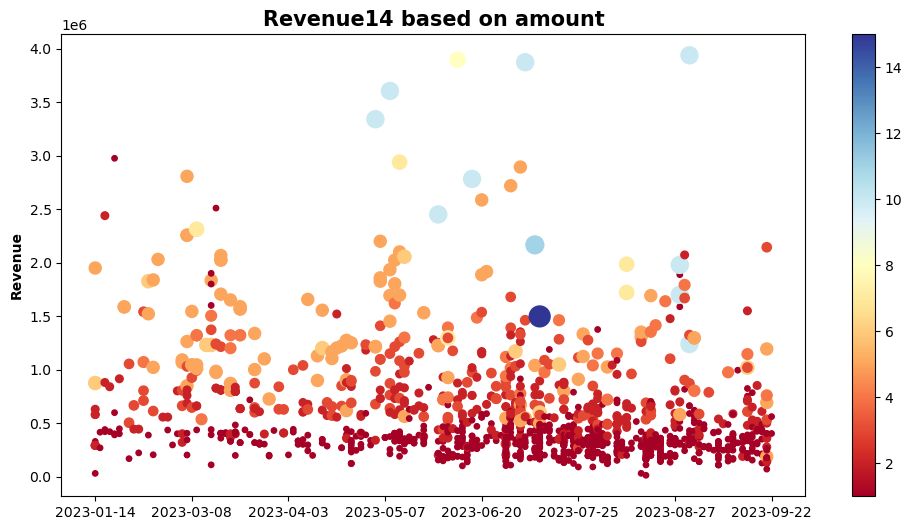

In [ ]:
import matplotlib.ticker as ticker
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize = (12,6))
sc = ax.scatter(dataset14.date, dataset14.revenue,
                c = dataset14.amount, cmap = cm,
                s = dataset14.amount*15,
                label='revenue')
#ax.plot(dataset.amount + 1e7, color='red', label='revenue')
#ax.plot(day_dataset.index, np.zeros(150,), color = 'r')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue14 based on amount', fontsize = 15, fontweight = 'bold')

plt.colorbar(sc)
plt.show()

<Axes: xlabel='amount', ylabel='revenue'>

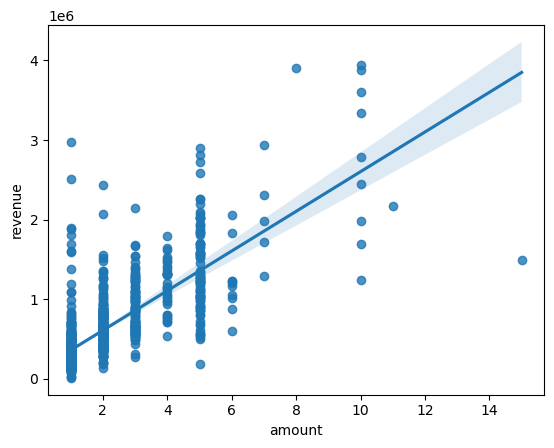

In [ ]:
sns.regplot(x = 'amount', y = 'revenue', data= dataset14)

In [ ]:
dataset11.sort_values('revenue', ascending= False)[['revenue', 'amount']].head()

revenue  amount
1273  17310750.0     5.0
887   15028000.0     2.0
645   10499604.8     2.0
1264   5176480.0     2.0
1284   3940000.0    10.0

In [ ]:
dataset13.sort_values('revenue', ascending= False)[['revenue', 'amount']].head()

revenue  amount
1273  17310750.0     5.0
887   15028000.0     2.0
645   10499604.8     2.0
1264   5176480.0     2.0
1284   3940000.0    10.0

In [ ]:
dataset14.sort_values('revenue', ascending= False)[['revenue', 'amount']].head()

revenue  amount
1284  3940000.0    10.0
465   3898880.0     8.0
697   3874850.0    10.0
317   3606600.0    10.0
293   3342200.0    10.0

<Axes: xlabel='amount', ylabel='revenue'>

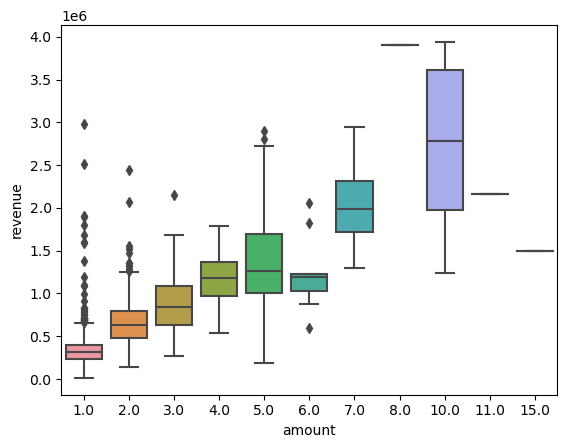

In [ ]:
sns.boxplot(x = 'amount', y = 'revenue', data= dataset14)

In [ ]:
dataset14[(dataset14.amount > 10) | (dataset14.amount == 8.0)]

date name_web      color subject  category2  year  month  day  \
465  2023-06-08    macys      white       m   clothing  2023      6    8   
721  2023-07-06   ssense  navy_blue       w        bag  2023      7    6   
747  2023-07-07    macys        red       w  accessory  2023      7    7   

     amount  purchase_price_unit  sale_price_unit  sale_price  purchase_price  \
465     8.0            1102640.0        1590000.0  12720000.0       8821120.0   
721    11.0             693000.0         890000.0   9790000.0       7623000.0   
747    15.0             190125.0         290000.0   4350000.0       2851875.0   

       revenue  %revenue_unit  
465  3898880.0      30.651572  
721  2167000.0      22.134831  
747  1498125.0      34.439655

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset13.amount <= 10) & (dataset13.amount != 8.0)],
                     'revenue')
df['dataset'] = 'dataset13_except_amount_outlier'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset13.amount != 8.0)],
                     'revenue')
df['dataset'] = 'dataset13_except_amount8'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset13[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset13.amount <= 10)],
                     'revenue')
df['dataset'] = 'dataset13_except_amount>10'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset14[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset14.amount <= 10) & (dataset14.amount != 8.0)],
                     'revenue')
df['dataset'] = 'dataset14_except_amount_outlier'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset14[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset14.amount <= 10)],
                     'revenue')
df['dataset'] = 'dataset14_except_amount>10'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset14[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset14.amount != 8.0)],
                     'revenue')
df['dataset'] = 'dataset14_except_amount8'
df_test = pd.concat([df_test, df])

In [ ]:
df_test[df_test.apply(lambda row: row.astype(str).str.contains('_except_amount').any(), axis=1)]\
.groupby(['name', 'dataset']).sum().sort_values(['coef'], ascending = False)

coef        p_value
name            dataset                                                 
amount          dataset14_except_amount>10       0.785633  2.111307e-298
                dataset14_except_amount_outlier  0.782930  8.492308e-295
                dataset14_except_amount8         0.772820  6.531387e-283
sale_price      dataset14_except_amount>10       0.770502  5.498410e-280
                dataset14_except_amount8         0.768546  6.660089e-278
                dataset14_except_amount_outlier  0.766681  2.289715e-275
                dataset13_except_amount>10       0.741112  1.145893e-248
                dataset13_except_amount8         0.738874  1.422135e-246
                dataset13_except_amount_outlier  0.737939  2.724084e-245
purchase_price  dataset14_except_amount>10       0.658685  1.200434e-177
                dataset14_except_amount8         0.657250  9.639462e-177
                dataset14_except_amount_outlier  0.654889  8.084720e-175
                dataset13_except_amount>10       0.523482  3.785345e-101
                dataset13_except_amount8         0.520429  7.353762e-100
                dataset13_except_amount_outlier  0.518489   7.220994e-99
amount          dataset13_except_amount>10       0.495210   4.286235e-89
                dataset13_except_amount_outlier  0.488773   1.911409e-86
                dataset13_except_amount8         0.482639   3.812600e-84
sale_price_unit dataset13_except_amount_outlier  0.343426   1.020208e-40
                dataset13_except_amount>10       0.341824   2.332928e-40
                dataset13_except_amount8         0.341144   3.193090e-40

In [ ]:
df_test[df_test.apply(lambda row: row.astype(str).str.contains('_except_amount').any(), axis=1)]\
.groupby(['dataset']).sum().sort_values(['coef'], ascending = False)[['coef', 'p_value']]

coef        p_value
dataset                                                 
dataset14_except_amount>10       2.214820  1.200434e-177
dataset14_except_amount_outlier  2.204501  8.084720e-175
dataset14_except_amount8         2.198615  9.639462e-177
dataset13_except_amount>10       2.101628   2.332928e-40
dataset13_except_amount_outlier  2.088626   1.020208e-40
dataset13_except_amount8         2.083085   3.193090e-40

In [ ]:
dataset15 = dataset14[dataset14.amount <= 10]
dataset16 = dataset15[dataset15.amount != 8]
dataset17 = dataset13[dataset13.amount <= 10]

<Axes: xlabel='amount', ylabel='revenue'>

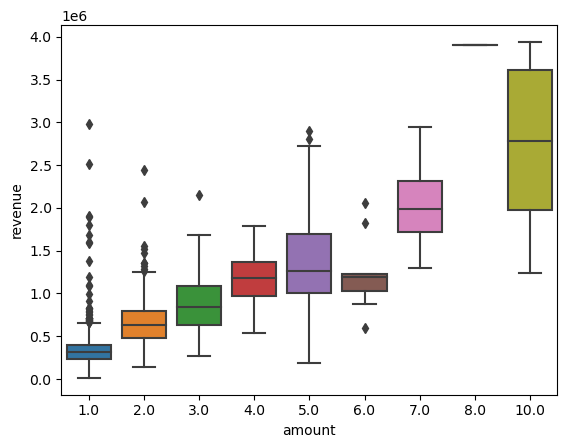

In [ ]:
sns.boxplot(x = 'amount', y = 'revenue', data= dataset15)

<Axes: xlabel='amount', ylabel='revenue'>

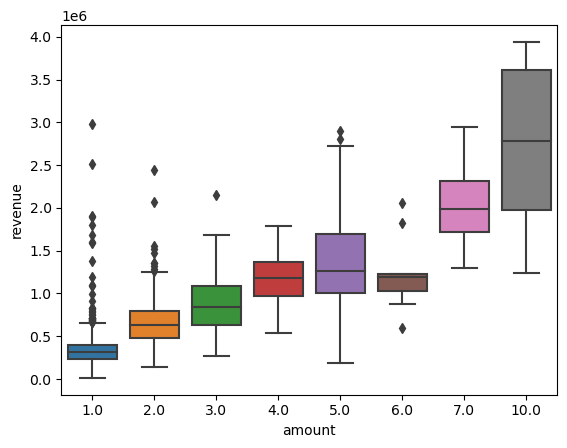

In [ ]:
sns.boxplot(x = 'amount', y = 'revenue', data= dataset16)

C:\Users\ndp17\AppData\Local\Temp\ipykernel_10968\387468950.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


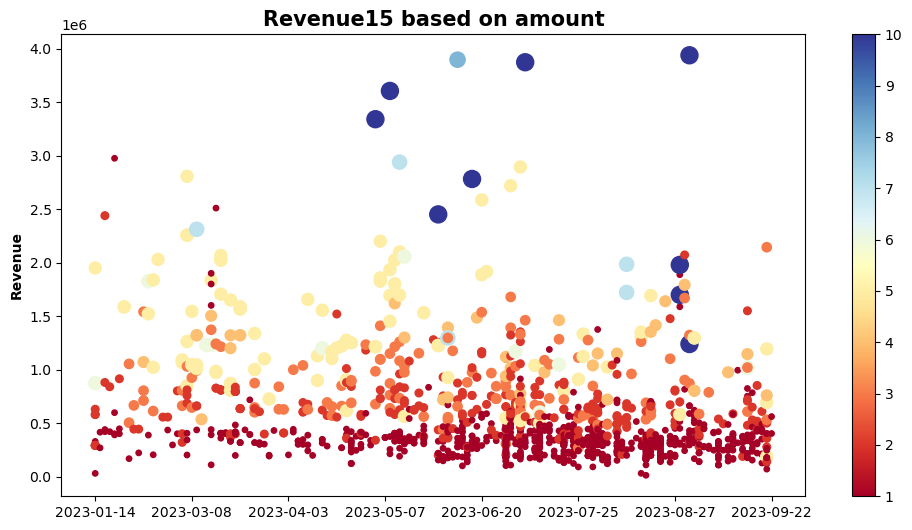

In [ ]:
import matplotlib.ticker as ticker
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize = (12,6))
sc = ax.scatter(dataset15.date, dataset15.revenue,
                c = dataset15.amount, cmap = cm,
                s = dataset15.amount*15,
                label='revenue')
#ax.plot(dataset.amount + 1e7, color='red', label='revenue')
#ax.plot(day_dataset.index, np.zeros(150,), color = 'r')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue15 based on amount', fontsize = 15, fontweight = 'bold')

plt.colorbar(sc)
plt.show()

#### Sale_price_unit

C:\Users\ndp17\AppData\Local\Temp\ipykernel_10968\2566908240.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


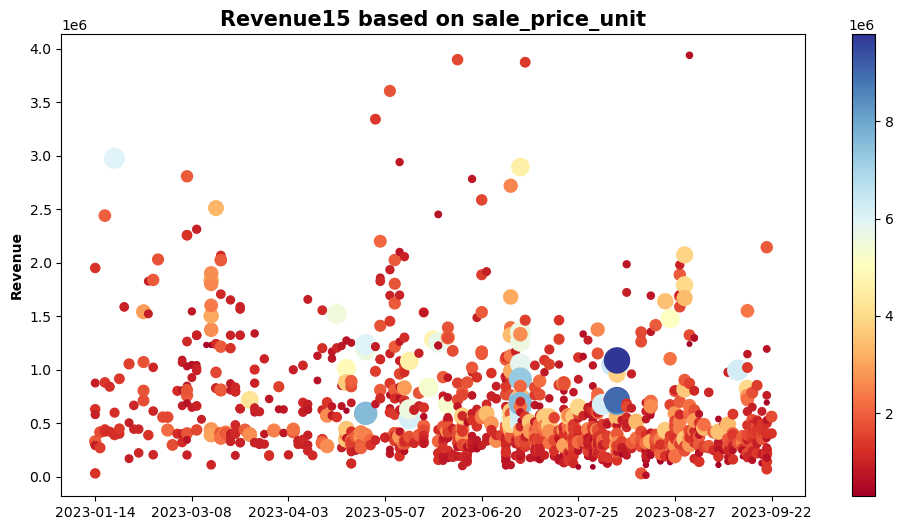

In [ ]:
import matplotlib.ticker as ticker
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize = (12,6))
sc = ax.scatter(dataset15.date, dataset15.revenue,
                c = dataset15.sale_price_unit, cmap = cm,
                s = dataset15.sale_price_unit/30000,
                label='revenue')
#ax.plot(dataset.amount + 1e7, color='red', label='revenue')
#ax.plot(day_dataset.index, np.zeros(150,), color = 'r')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue15 based on sale_price_unit', fontsize = 15, fontweight = 'bold')

plt.colorbar(sc)
plt.show()

<Axes: xlabel='sale_price_unit', ylabel='revenue'>

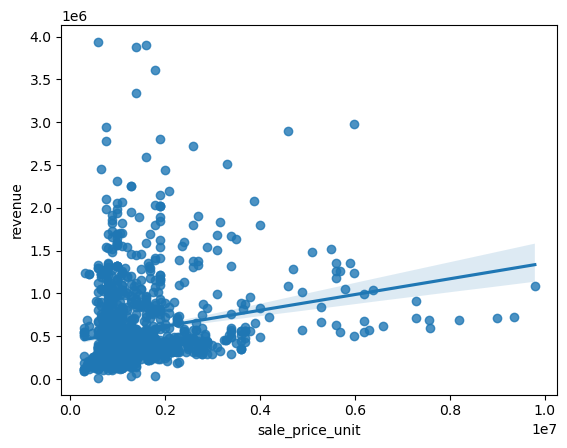

In [ ]:
sns.regplot(x = 'sale_price_unit', y = 'revenue', data= dataset15)

C:\Users\ndp17\AppData\Local\Temp\ipykernel_10968\3772889177.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


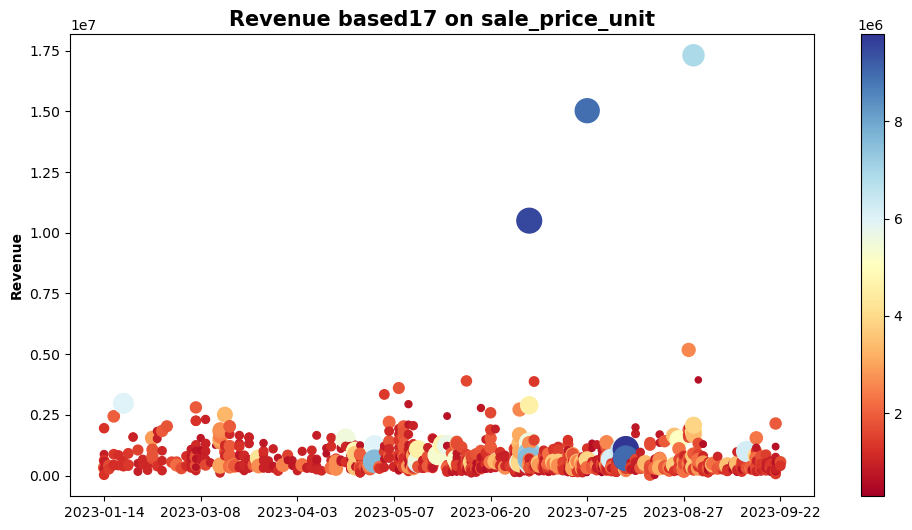

In [ ]:
import matplotlib.ticker as ticker
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize = (12,6))
sc = ax.scatter(dataset17.date, dataset17.revenue,
                c = dataset17.sale_price_unit, cmap = cm,
                s = dataset17.sale_price_unit/30000,
                label='revenue')
#ax.plot(dataset.amount + 1e7, color='red', label='revenue')
#ax.plot(day_dataset.index, np.zeros(150,), color = 'r')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue based17 on sale_price_unit', fontsize = 15, fontweight = 'bold')

plt.colorbar(sc)
plt.show()

<Axes: xlabel='sale_price_unit', ylabel='revenue'>

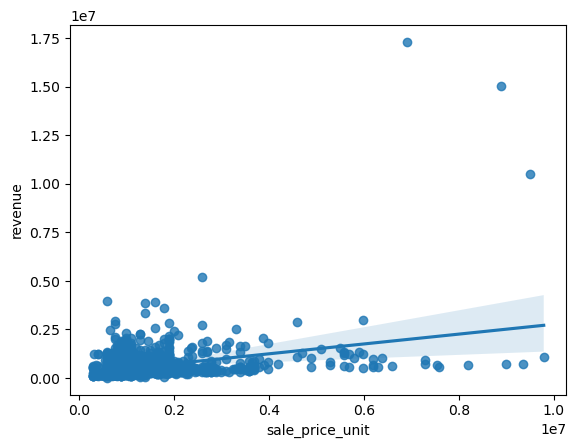

In [ ]:
sns.regplot(x = 'sale_price_unit', y = 'revenue', data= dataset17)

 Nhận xét: Số lượng và giá bán của một sản phẩm không tương quan riêng lẻ với doanh thu, chỉ khi kết hợp chúng mới cho ra lợi nhuận cao nhất.

<Axes: >

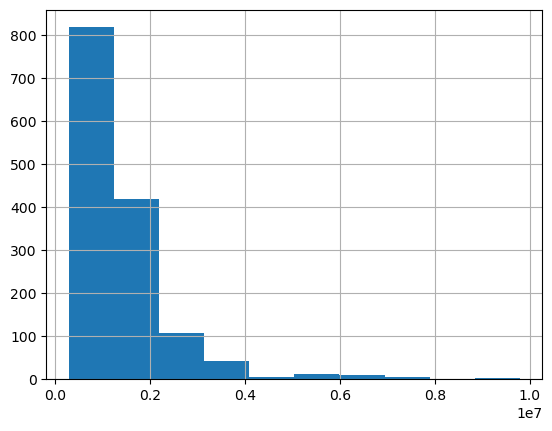

In [ ]:
dataset15.sale_price_unit.hist()

<Axes: >

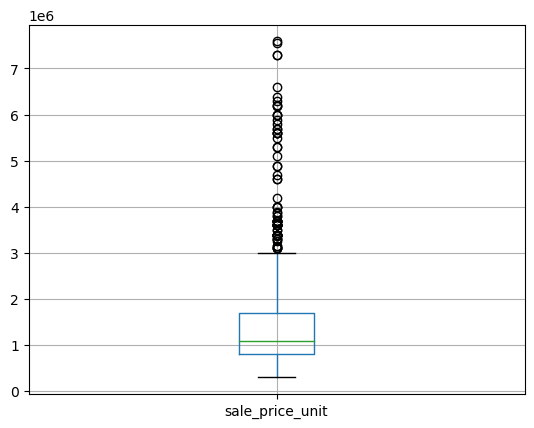

In [ ]:
dataset15[dataset15.sale_price_unit <8e6].boxplot("sale_price_unit")

In [ ]:
df_test_sale_price_unit = pd.DataFrame()

In [ ]:
for i in range(4, 11):
    df = affection_frame(dataset16[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [dataset16.sale_price_unit <= i*1e6],
                                    'revenue')
    df['dataset'] = f'dataset16_sale_price_unit<{i}e6'
    df_test_sale_price_unit = pd.concat([df_test_sale_price_unit, df])

In [ ]:
for i in range(4, 11):
    df = affection_frame(dataset15[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [dataset15.sale_price_unit <= i*1e6],
                                    'revenue')
    df['dataset'] = f'dataset15_sale_price_unit<{i}e6'
    df_test_sale_price_unit = pd.concat([df_test_sale_price_unit, df])

In [ ]:
for i in range(4, 11):
    df = affection_frame(dataset16[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [(dataset16.sale_price_unit <= i*1e6) | (dataset16.amount != 1)],
                                    'revenue')
    df['dataset'] = f'dataset16_sale_price_unit1<{i}e6'
    df_test_sale_price_unit = pd.concat([df_test_sale_price_unit, df])

In [ ]:
for i in range(4, 11):
    df = affection_frame(dataset15[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [(dataset15.sale_price_unit <= i*1e6) | (dataset16.amount != 1)],
                                    'revenue')
    df['dataset'] = f'dataset15_sale_price_unit1<{i}e6'
    df_test_sale_price_unit = pd.concat([df_test_sale_price_unit, df])

In [ ]:
df_test_sale_price_unit['dataset'] = df_test_sale_price_unit['dataset'].str.replace('dataset', '').str.replace('_sale_price_unit', '').str.replace('e6', '')

<Axes: xlabel='dataset', ylabel='coef'>

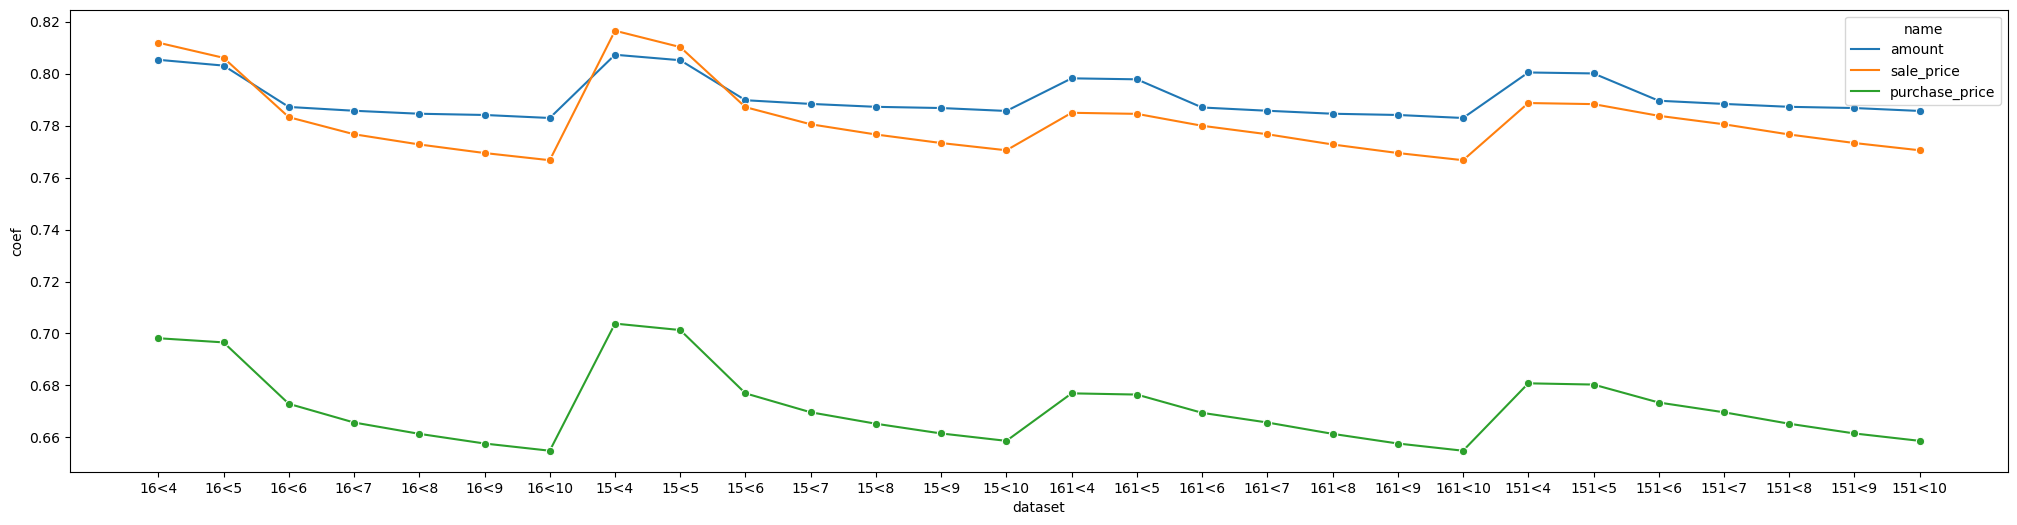

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_sale_price_unit,
             x = "dataset",
             y = "coef",
             hue = "name",
             marker="o", ax=ax)

<Axes: xlabel='dataset', ylabel='p_value'>

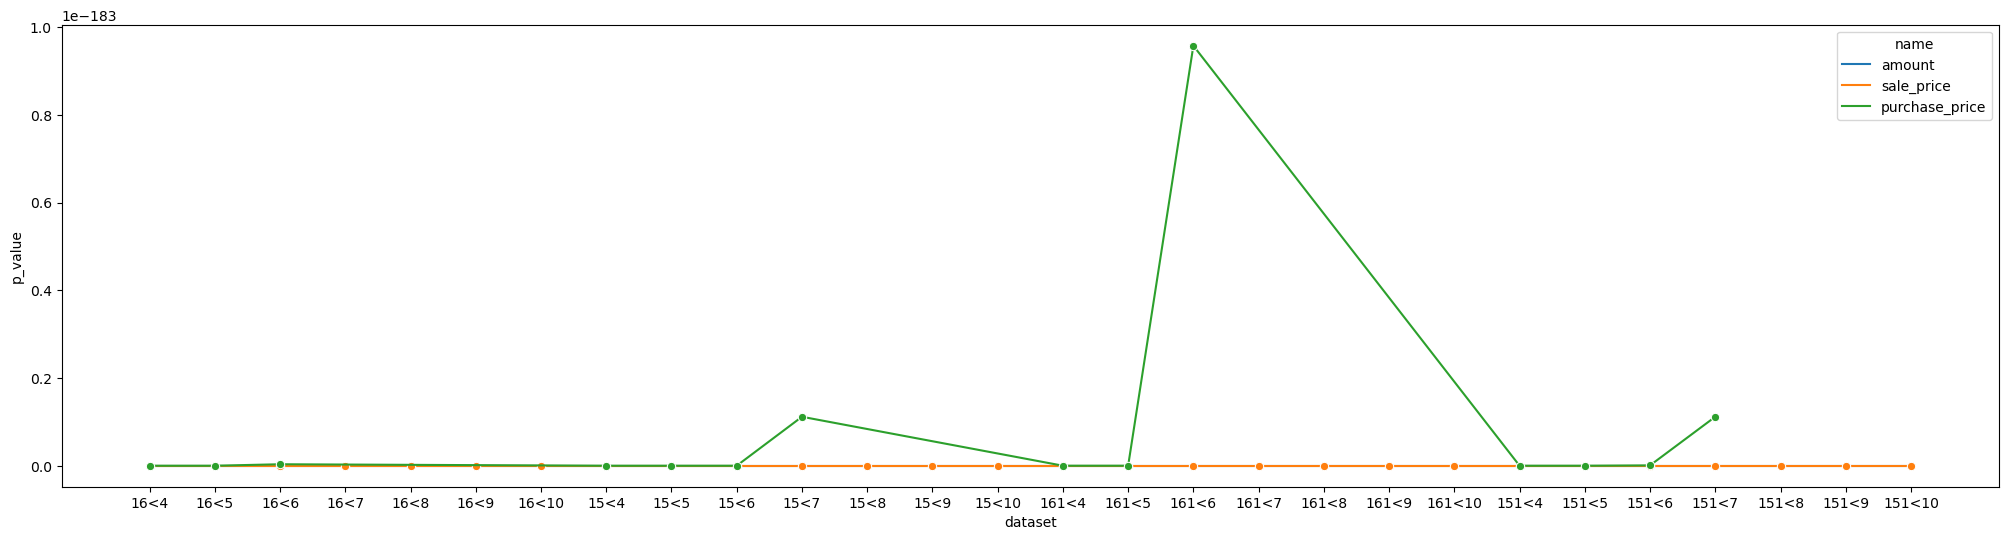

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_sale_price_unit[df_test_sale_price_unit.p_value < 0.2e-181],
             x = "dataset",
             y = "p_value",
             hue = "name",
             marker="o", ax=ax)

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset15[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset15.sale_price_unit <= 4*1e6)],
                     'revenue')
df['dataset'] = 'dataset15_sale_unit<4e6'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset15[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset15.sale_price_unit <= 8*1e6)],
                     'revenue')
df['dataset'] = 'dataset15_sale_unit<8e6'
df_test = pd.concat([df_test, df])

In [ ]:
df_test.groupby(['dataset']).sum().sort_values(['coef'], ascending = False)[['coef', 'p_value']].head()

coef        p_value
dataset                                                 
dataset15_sale_unit<4e6          2.327581  6.380997e-208
dataset15_sale_unit<8e6          2.229068  6.268633e-182
dataset14_except_amount>10       2.214820  1.200434e-177
dataset13_revenue<5e6            2.208539  1.516202e-179
dataset14_except_amount_outlier  2.204501  8.084720e-175

In [ ]:
dataset18 = dataset15[(dataset15.sale_price_unit <= 4*1e6)]
dataset19 = dataset15[(dataset15.sale_price_unit <= 8*1e6)]

<Axes: xlabel='sale_price_unit', ylabel='revenue'>

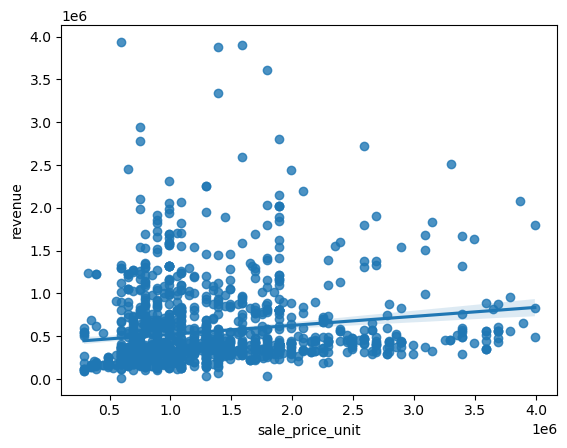

In [ ]:
sns.regplot(x = 'sale_price_unit', y = 'revenue', data= dataset18)

<Axes: xlabel='sale_price_unit', ylabel='revenue'>

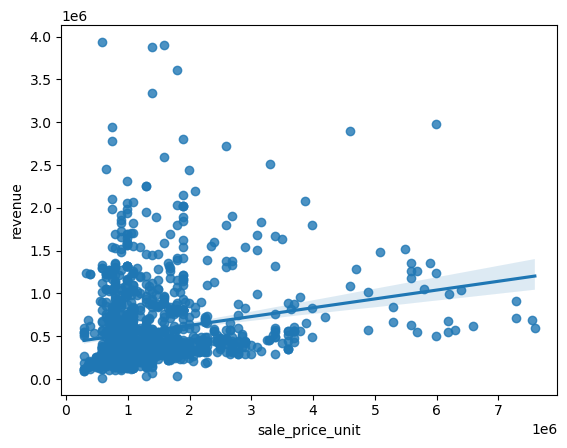

In [ ]:
sns.regplot(x = 'sale_price_unit', y = 'revenue', data= dataset19)

#### Purchase price

C:\Users\ndp17\AppData\Local\Temp\ipykernel_10968\561735720.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


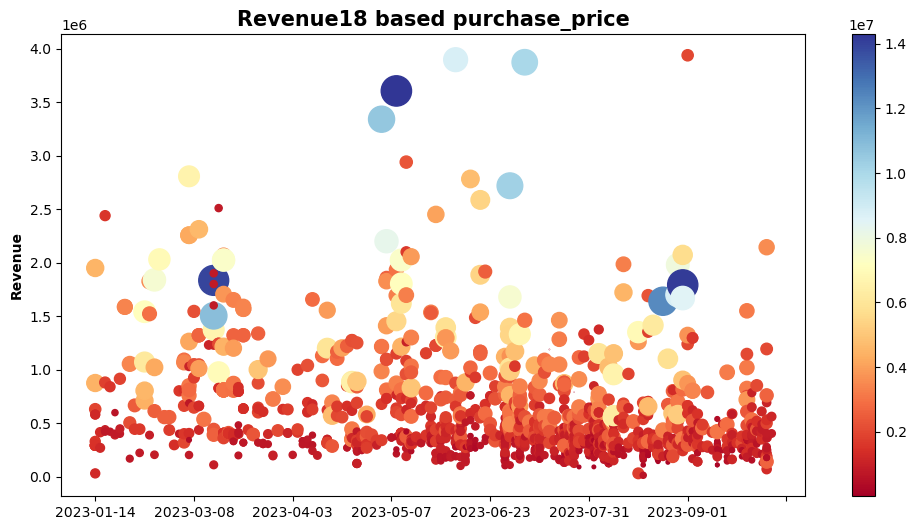

In [ ]:
import matplotlib.ticker as ticker
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize = (12,6))
sc = ax.scatter(dataset18.date, dataset18.revenue,
                c = dataset18.purchase_price, cmap = cm,
                s = dataset18.purchase_price/30000,
                label='revenue')
#ax.plot(dataset.amount + 1e7, color='red', label='revenue')
#ax.plot(day_dataset.index, np.zeros(150,), color = 'r')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue18 based purchase_price', fontsize = 15, fontweight = 'bold')

plt.colorbar(sc)
plt.show()

<Axes: xlabel='purchase_price', ylabel='revenue'>

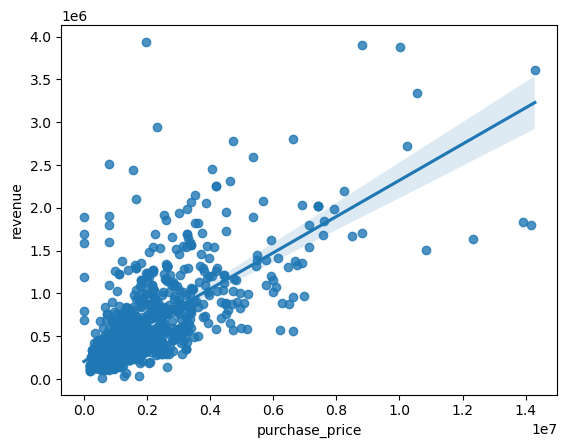

In [ ]:
sns.regplot(x = 'purchase_price', y = 'revenue', data= dataset18)

<Axes: >

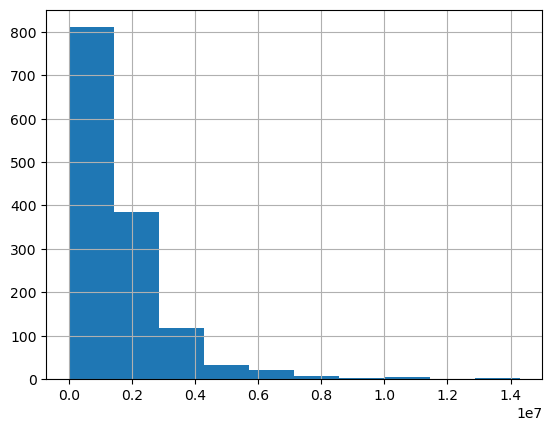

In [ ]:
dataset18.purchase_price.hist()

<Axes: >

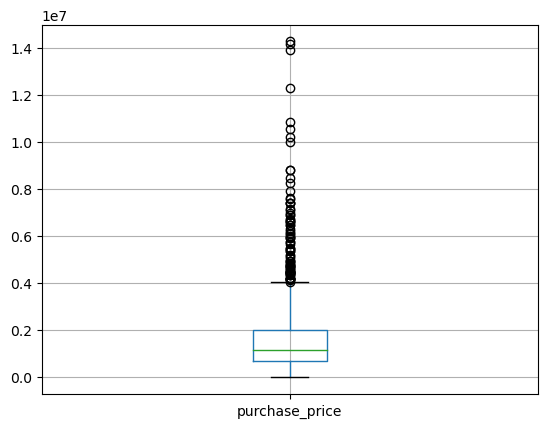

In [ ]:
dataset18.boxplot("purchase_price")

In [ ]:
len(dataset18[dataset18.purchase_price >= 0.4e7])

82

In [ ]:
df_test_purchase_price = pd.DataFrame()

In [ ]:
for i in range(4, 15):
    df = affection_frame(dataset18[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [dataset18.purchase_price <= i*1e6],
                                    'revenue')
    df['dataset'] = f'18<{i}e6'
    df_test_purchase_price = pd.concat([df_test_purchase_price, df])

<Axes: xlabel='dataset', ylabel='coef'>

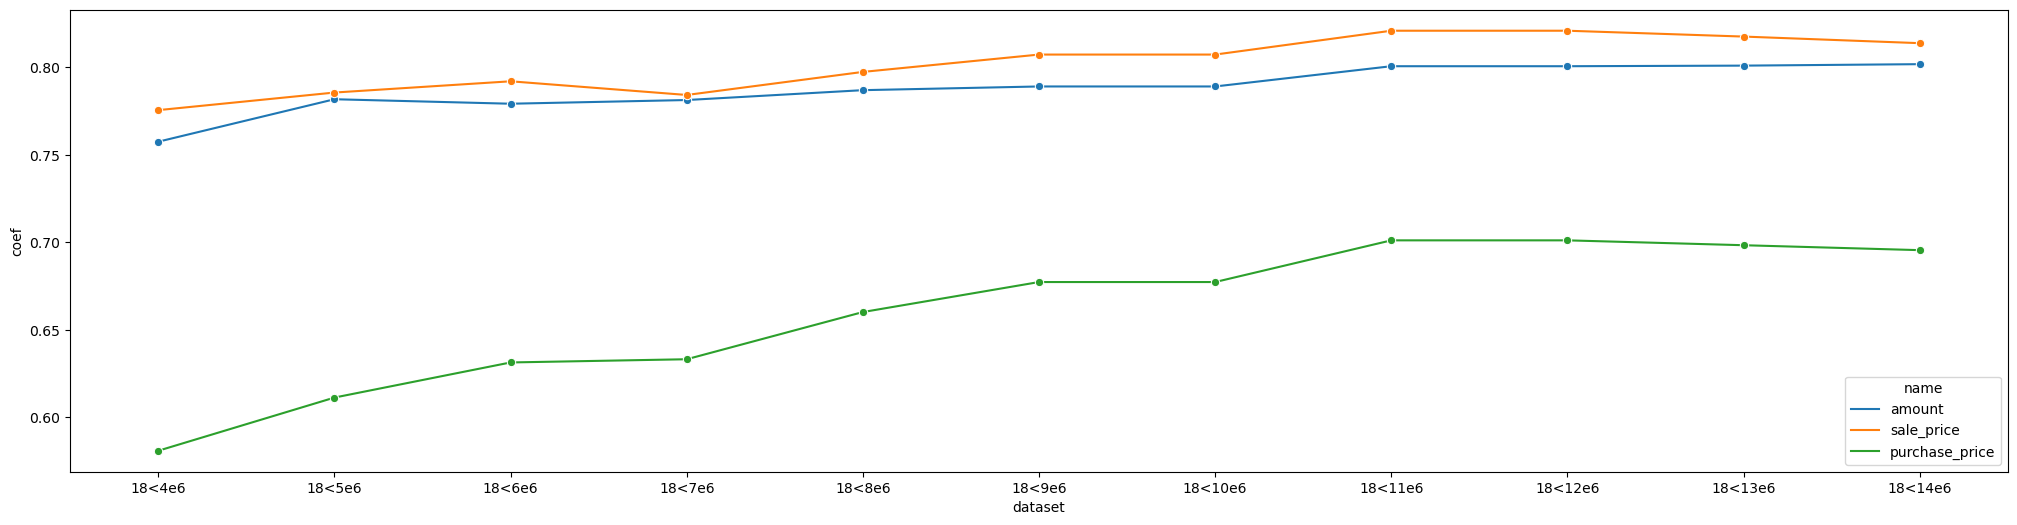

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_purchase_price,
             x = "dataset",
             y = "coef",
             hue = "name",
             marker="o", ax=ax)

<Axes: xlabel='dataset', ylabel='p_value'>

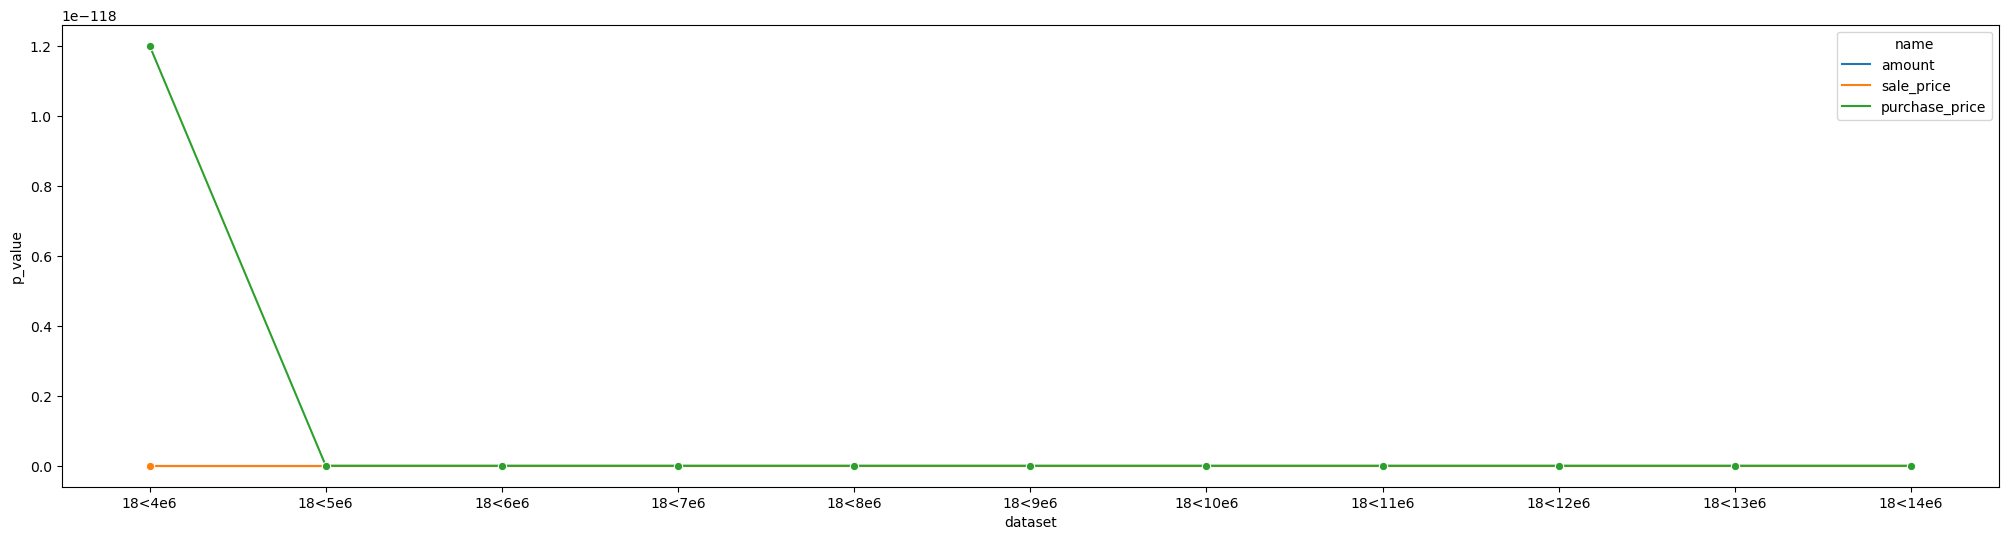

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_purchase_price,
             x = "dataset",
             y = "p_value",
             hue = "name",
             marker="o", ax=ax)

In [ ]:
for i in range(4, 15):
    df = affection_frame(dataset19[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [dataset19.purchase_price <= i*1e6],
                                    'revenue')
    df['dataset'] = f'19<{i}e6'
    df_test_purchase_price = pd.concat([df_test_purchase_price, df])

<Axes: xlabel='dataset', ylabel='coef'>

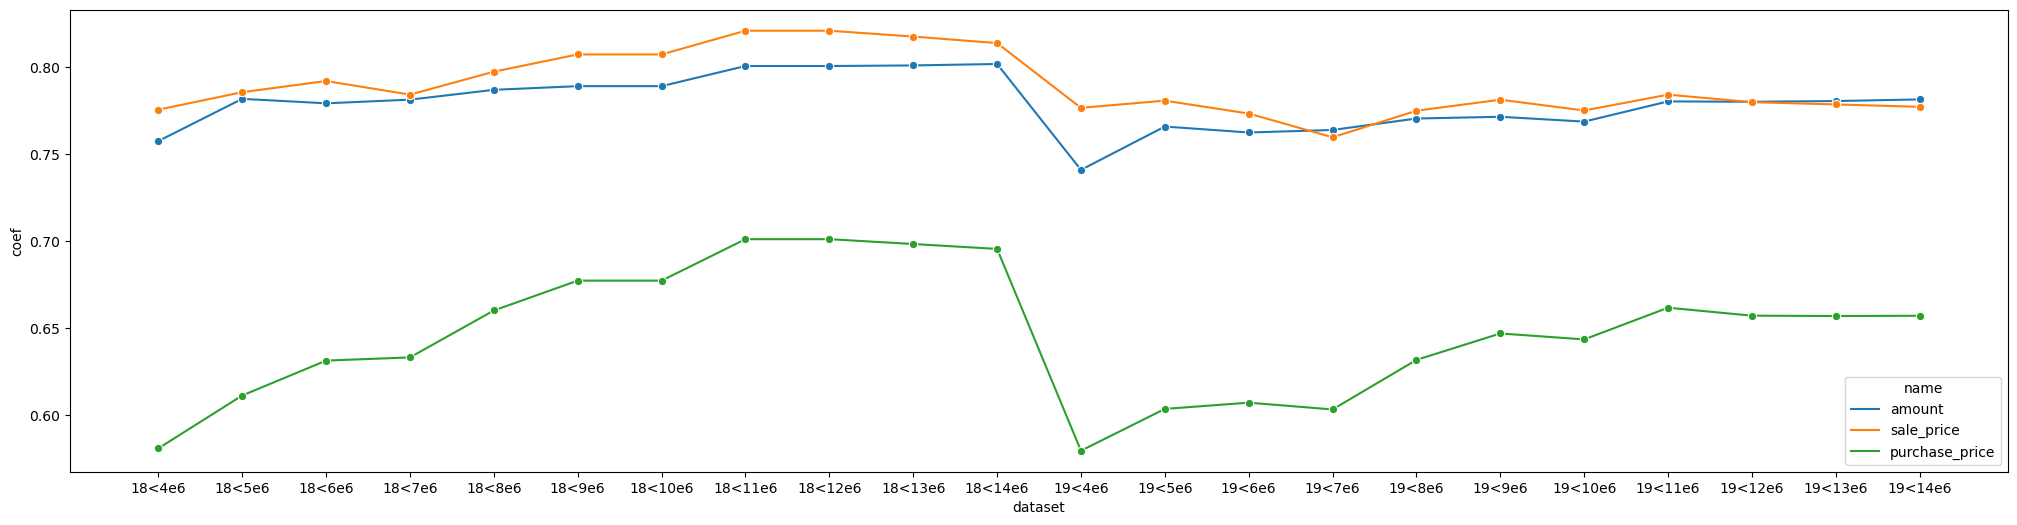

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_purchase_price,
             x = "dataset",
             y = "coef",
             hue = "name",
             marker="o", ax=ax)

In [ ]:
df_test_purchase_price.groupby(['dataset']).sum().sort_values(['coef'], ascending = False)[['coef', 'p_value']].head()

coef        p_value
dataset                         
18<12e6  2.322797  3.969768e-205
18<11e6  2.322797  3.969768e-205
18<13e6  2.317009  5.557246e-203
18<14e6  2.311261  7.811154e-201
18<10e6  2.273780  8.342243e-186

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset18[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset18.purchase_price <= 12e6)],
                     'revenue')
df['dataset'] = 'dataset18_purchase<12e6'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset18[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset18.purchase_price <= 11e6)],
                     'revenue')
df['dataset'] = 'dataset18_purchase<11e6'
df_test = pd.concat([df_test, df])

In [ ]:
df_test.groupby(['dataset']).sum().sort_values(['coef'], ascending = False)[['coef', 'p_value']].head()

coef        p_value
dataset                                            
dataset15_sale_unit<4e6     2.327581  6.380997e-208
dataset18_purchase<12e6     2.322797  3.969768e-205
dataset18_purchase<11e6     2.322797  3.969768e-205
dataset15_sale_unit<8e6     2.229068  6.268633e-182
dataset14_except_amount>10  2.214820  1.200434e-177

In [ ]:
df_test.sort_values(['name', 'coef'], ascending = False)

name      coef        p_value                          dataset
2  sale_price_unit  0.368900   4.955639e-54                          dataset
1  sale_price_unit  0.368378   1.824562e-48                        dataset11
1  sale_price_unit  0.343426   1.020208e-40  dataset13_except_amount_outlier
1  sale_price_unit  0.341824   2.332928e-40       dataset13_except_amount>10
1  sale_price_unit  0.341144   3.193090e-40         dataset13_except_amount8
1  sale_price_unit  0.339567   7.165114e-40       dataset11_revenue_positive
1  sale_price_unit  0.333824   1.143617e-38     dataset11_saleprice_positive
1       sale_price  0.820957   0.000000e+00          dataset18_purchase<12e6
1       sale_price  0.820957   0.000000e+00          dataset18_purchase<11e6
1       sale_price  0.816509   0.000000e+00          dataset15_sale_unit<4e6
1       sale_price  0.776575  2.117551e-286          dataset15_sale_unit<8e6
1       sale_price  0.772288  1.766633e-282            dataset13_revenue<5e6
1       sale_price  0.770502  5.498410e-280       dataset14_except_amount>10
1       sale_price  0.768546  6.660089e-278         dataset14_except_amount8
1       sale_price  0.766681  2.289715e-275  dataset14_except_amount_outlier
1       sale_price  0.756960  4.108740e-264            dataset13_revenue<3e6
1       sale_price  0.754826  2.495083e-260          dataset13_revenue<2.5e6
2       sale_price  0.742017  6.157614e-250       dataset11_revenue_positive
2       sale_price  0.741112  1.145893e-248       dataset13_except_amount>10
2       sale_price  0.738874  1.422135e-246         dataset13_except_amount8
2       sale_price  0.738729  1.255993e-247     dataset11_saleprice_positive
2       sale_price  0.738021  4.556196e-253                        dataset11
2       sale_price  0.737939  2.724084e-245  dataset13_except_amount_outlier
1       sale_price  0.735534  7.799207e-250            dataset11_revenue<5e6
3       sale_price  0.729331  2.634671e-272                          dataset
2   purchase_price  0.703810  6.380997e-208          dataset15_sale_unit<4e6
2   purchase_price  0.701168  3.969768e-205          dataset18_purchase<12e6
2   purchase_price  0.701168  3.969768e-205          dataset18_purchase<11e6
2   purchase_price  0.665271  6.268633e-182          dataset15_sale_unit<8e6
2   purchase_price  0.660971  1.516202e-179            dataset13_revenue<5e6
2   purchase_price  0.658685  1.200434e-177       dataset14_except_amount>10
2   purchase_price  0.657250  9.639462e-177         dataset14_except_amount8
2   purchase_price  0.654889  8.084720e-175  dataset14_except_amount_outlier
2   purchase_price  0.646234  1.274754e-167          dataset13_revenue<2.5e6
2   purchase_price  0.645631  3.775671e-168            dataset13_revenue<3e6
2   purchase_price  0.590261  2.385130e-138            dataset11_revenue<5e6
3   purchase_price  0.525369  3.904489e-102       dataset11_revenue_positive
3   purchase_price  0.523482  3.785345e-101       dataset13_except_amount>10
3   purchase_price  0.520429  7.353762e-100         dataset13_except_amount8
3   purchase_price  0.519456  6.561007e-100     dataset11_saleprice_positive
3   purchase_price  0.518489   7.220994e-99  dataset13_except_amount_outlier
3   purchase_price  0.506444   1.379396e-96                        dataset11
1   purchase_price  0.436852   2.156380e-77                          dataset
0           amount  0.807262  1.781205e-319          dataset15_sale_unit<4e6
0           amount  0.800673  1.435285e-309          dataset18_purchase<12e6
0           amount  0.800673  1.435285e-309          dataset18_purchase<11e6
0           amount  0.787222  1.395677e-299          dataset15_sale_unit<8e6
0           amount  0.785633  2.111307e-298       dataset14_except_amount>10
0           amount  0.782930  8.492308e-295  dataset14_except_amount_outlier
0           amount  0.775281  4.794441e-286            dataset13_revenue<5e6
0           amount  0.772820  6.531387e-283         dataset14_except_amount8
0         

In [ ]:
dataset20 = dataset18[(dataset18.purchase_price <= 12e6)]

#### Sale price

C:\Users\ndp17\AppData\Local\Temp\ipykernel_10968\1810535111.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


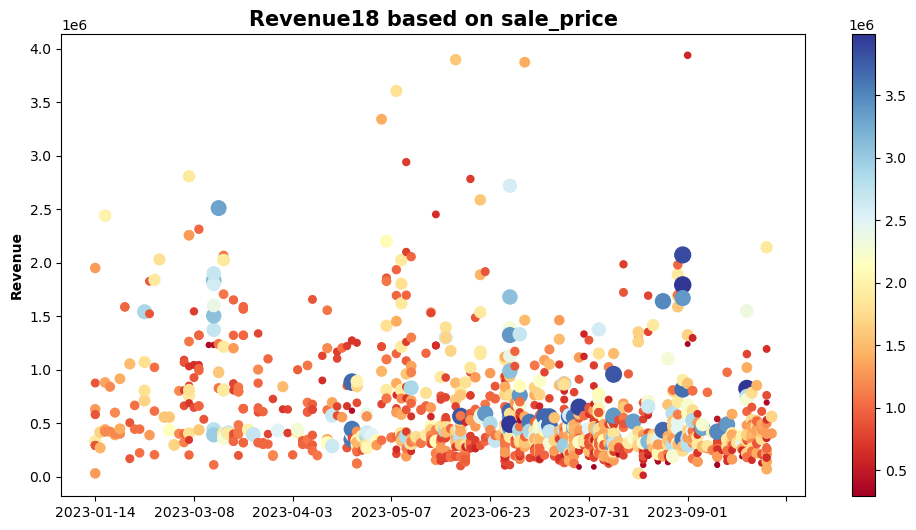

In [ ]:
import matplotlib.ticker as ticker
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize = (12,6))
sc = ax.scatter(dataset18.date, dataset18.revenue,
                c = dataset18.sale_price_unit, cmap = cm,
                s = dataset18.sale_price_unit/30000,
                label='revenue')
#ax.plot(dataset.amount + 1e7, color='red', label='revenue')
#ax.plot(day_dataset.index, np.zeros(150,), color = 'r')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue18 based on sale_price', fontsize = 15, fontweight = 'bold')

plt.colorbar(sc)
plt.show()

<Axes: xlabel='sale_price', ylabel='revenue'>

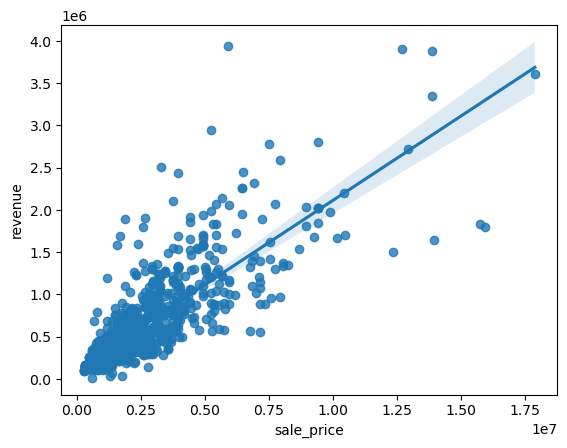

In [ ]:
sns.regplot(x = 'sale_price', y = 'revenue', data= dataset18)

<Axes: >

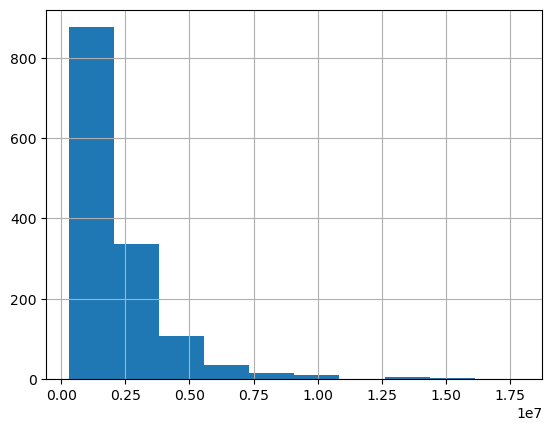

In [ ]:
dataset18.sale_price.hist()

<Axes: xlabel='sale_price', ylabel='revenue'>

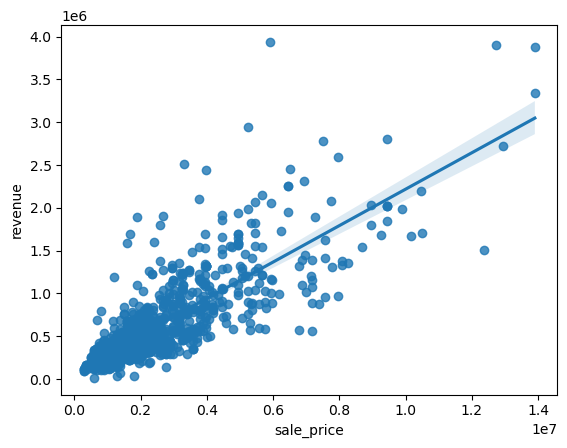

In [ ]:
sns.regplot(x = 'sale_price', y = 'revenue', data= dataset20)

In [ ]:
df_test_sale_price = pd.DataFrame()

In [ ]:
for i in range(74, 175, 10):
    df = affection_frame(dataset18[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [dataset18.sale_price <= i*1e5],
                                    'revenue')
    df['dataset'] = f'18<{i}e6'
    df_test_sale_price = pd.concat([df_test_sale_price, df])

<Axes: xlabel='dataset', ylabel='coef'>

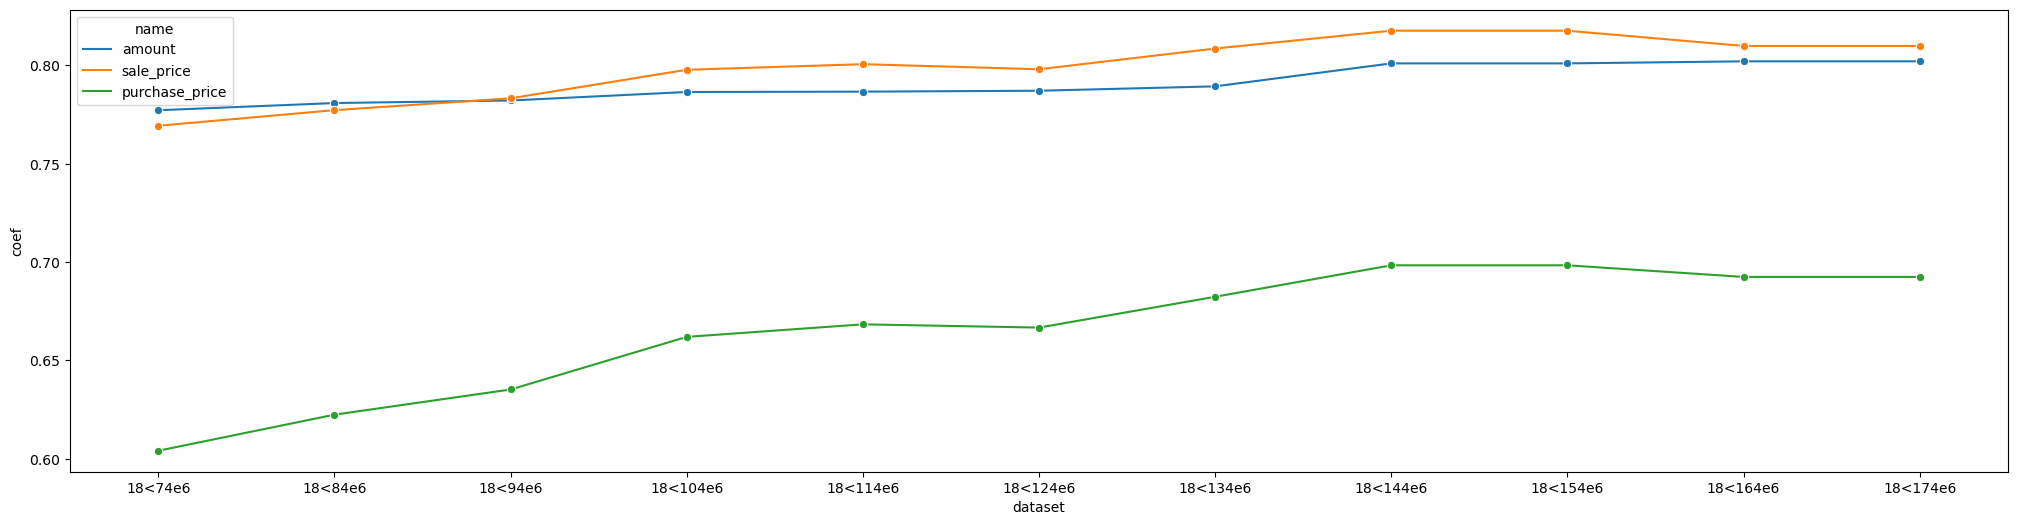

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_sale_price,
             x = "dataset",
             y = "coef",
             hue = "name",
             marker="o", ax=ax)

In [ ]:
df_test_sale_price = pd.DataFrame()
for i in range(74, 175, 10):
    df = affection_frame(dataset20[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                                    [dataset20.sale_price <= i*1e5],
                                    'revenue')
    df['dataset'] = f'20<{i}e6'
    df_test_sale_price = pd.concat([df_test_sale_price, df])

<Axes: xlabel='dataset', ylabel='coef'>

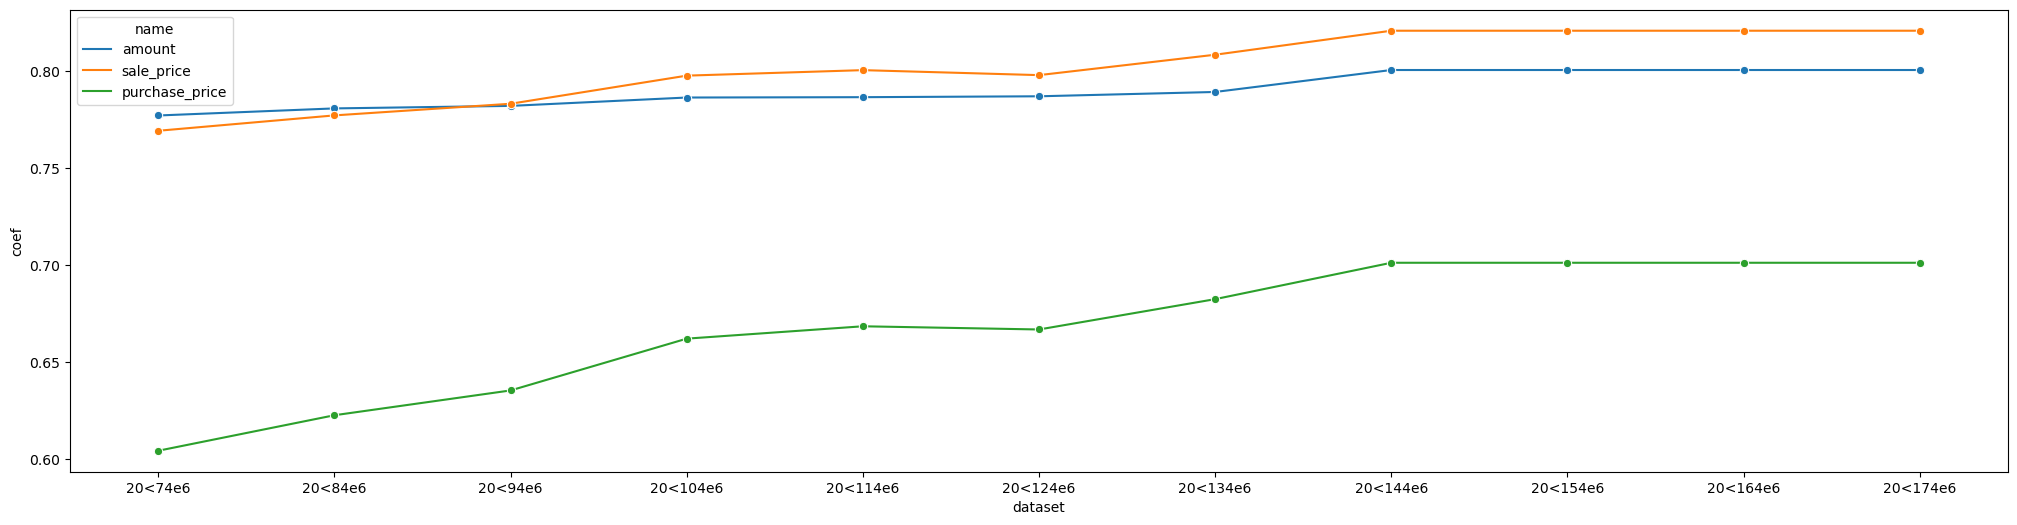

In [ ]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(df_test_sale_price,
             x = "dataset",
             y = "coef",
             hue = "name",
             marker="o", ax=ax)

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset18[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset18.sale_price <= 144e5)],
                     'revenue')
df['dataset'] = 'dataset18_sale<144e5'
df_test = pd.concat([df_test, df])

In [ ]:
# check affection of the numeric attribute for the revenue
df = affection_frame(dataset20[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']]\
                     [(dataset20.sale_price <= 144e5)],
                     'revenue')
df['dataset'] = 'dataset20_sale<144e5'
df_test = pd.concat([df_test, df])

In [ ]:
df_test.groupby(['dataset']).sum().sort_values(['coef'], ascending = False)[['coef', 'p_value']].head()

coef        p_value
dataset                                         
dataset15_sale_unit<4e6  2.327581  6.380997e-208
dataset20_sale<144e5     2.322797  3.969768e-205
dataset18_purchase<12e6  2.322797  3.969768e-205
dataset18_purchase<11e6  2.322797  3.969768e-205
dataset18_sale<144e5     2.317009  5.557246e-203

In [ ]:
dataset21 = dataset20[(dataset20.sale_price <= 144e5)]

#### save result

In [ ]:
category = [['name_web', 'date', 'color', 'subject', 'category2', 'name']]
datasets = {'dataset': dataset,
            'dataset11': dataset11,
            'dataset18': dataset18,
            'dataset20': dataset20}
df_category_influence = pd.DataFrame()

for _name, _dataset in datasets.items():
    _result = get_category_influence(_dataset, 'revenue', plimit= 1)
    category.append(_result[1][:5] + [_name])
    df = pd.DataFrame([category[-1]], columns = category[0])
    df_category_influence = pd.concat([df_category_influence, df])
df_category_influence['total'] = df_category_influence[['name_web', 'date', 'color', 'subject', 'category2']].sum(axis= 1)

In [ ]:
df_category_influence.sort_values(['total'], ascending= True).head(10)

name_web      date     color   subject  category2       name     total
0  7.871946e-38  0.000003  0.000084  0.011012   0.698519  dataset18  0.709618
0  1.156952e-36  0.000008  0.000248  0.007580   0.748942  dataset20  0.756778
0  1.422812e-08  0.001007  0.002341  0.018042   0.967443  dataset11  0.988832
0  1.223880e-02  0.037276  0.460561  0.676150   0.883084    dataset  2.069310

In [ ]:
datasets = {'dataset': dataset,
            'dataset11': dataset11,
            'dataset18': dataset18,
            'dataset20': dataset20}
df_numeric_influence = pd.DataFrame()

for _name, _dataset in datasets.items():
    df = affection_frame(_dataset[['amount', 'sale_price', 'purchase_price', 'sale_price_unit', 'revenue']],
                     'revenue')
    df['dataset'] = _name
    df_numeric_influence = pd.concat([df_numeric_influence, df])


In [ ]:
df_numeric_influence.groupby(['dataset']).sum()[['coef', 'p_value']].sort_values(['coef'], ascending = False)

coef        p_value
dataset                           
dataset18  2.327581  6.380997e-208
dataset20  2.322797  3.969768e-205
dataset11  2.100952   1.824562e-48
dataset    1.973862   4.955639e-54

In [ ]:
dataset18.to_csv('Final_dataset18.csv', index = False)

### Daily

In [ ]:
data_path = "Final_dataset18.csv"
dataset18 = pd.read_csv(data_path)

In [ ]:
dataset18.head()

date name_web             color subject category2  year  month  day  \
0  2023-01-14   amazon             black       u       bag  2023      1   14   
1  2023-01-14    macys       scarlet_red       w  clothing  2023      1   14   
2  2023-01-14    macys       scarlet_red       w  clothing  2023      1   14   
3  2023-01-14    macys  sky_captain_blue       w  clothing  2023      1   14   
4  2023-01-14    macys  sky_captain_blue       w  clothing  2023      1   14   

   amount  purchase_price_unit  sale_price_unit  sale_price  purchase_price  \
0     1.0            1560900.0        1890000.0   1890000.0       1560900.0   
1     2.0             744120.0         890000.0   1780000.0       1488240.0   
2     2.0             744120.0         890000.0   1780000.0       1488240.0   
3     6.0             744120.0         890000.0   5340000.0       4464720.0   
4     2.0             744120.0         890000.0   1780000.0       1488240.0   

    revenue  %revenue_unit  
0  329100.0      17.412698  
1  291760.0      16.391011  
2  291760.0      16.391011  
3  875280.0      16.391011  
4  291760.0      16.391011

In [ ]:
num_df = dataset18[['date', 'year', 'month', 'day']].groupby('date').agg(pd.Series.mode)
num_df = pd.concat([num_df,
                    dataset18[['date', 'amount', 'purchase_price', 'sale_price', 'revenue']].groupby('date').sum()
                    ],
                    axis = 1)
num_df['%revenue'] = num_df['revenue']/num_df['purchase_price']*100
num_df.head()

year  month  day  amount  purchase_price  sale_price     revenue  \
date                                                                           
2023-01-14  2023      1   14    27.0     22086600.00  28230000.0  6143400.00   
2023-01-15  2023      1   15     2.0      2455770.00   3140000.0   684230.00   
2023-01-25  2023      1   25     6.0      5038800.00   9220000.0  4181200.00   
2023-01-26  2023      1   26     3.0      2309400.00   3570000.0  1260600.00   
2023-01-27  2023      1   27     3.0      2380628.75   3770000.0  1389371.25   

             %revenue  
date                   
2023-01-14  27.815055  
2023-01-15  27.862137  
2023-01-25  82.980075  
2023-01-26  54.585607  
2023-01-27  58.361525

In [ ]:
obj_df = dataset18['date']
obj = get_obj_columns(dataset18).columns[1:]
for column in obj:
    dummies = pd.get_dummies(dataset18[column], dtype = float, prefix= 'amount')
    dummies.values[dummies != 0] = dataset18.amount.values
    obj_df = pd.concat([obj_df, dummies], axis = 1)

obj_df = obj_df.groupby('date').sum()
obj_df.head()

amount_adidas  amount_amazon  amount_ashford  amount_macys  \
date                                                                     
2023-01-14            0.0            1.0             0.0          14.0   
2023-01-15            0.0            0.0             0.0           1.0   
2023-01-25            0.0            0.0             0.0           0.0   
2023-01-26            0.0            0.0             0.0           0.0   
2023-01-27            0.0            0.0             0.0           0.0   

            amount_saksoff5th  amount_ssense  amount_beige_yellow_brown  \
date                                                                      
2023-01-14               12.0            0.0                        0.0   
2023-01-15                1.0            0.0                        0.0   
2023-01-25                6.0            0.0                        0.0   
2023-01-26                3.0            0.0                        0.0   
2023-01-27                3.0            0.0                        0.0   

            amount_black  amount_blue  amount_brown  amount_camel_brown  \
date                                                                      
2023-01-14          13.0          0.0           0.0                 0.0   
2023-01-15           2.0          0.0           0.0                 0.0   
2023-01-25           5.0          0.0           0.0                 0.0   
2023-01-26           3.0          0.0           0.0                 0.0   
2023-01-27           2.0          0.0           0.0                 0.0   

            amount_colorful  amount_cream_yellow  amount_gold_yellow  \
date                                                                   
2023-01-14              0.0                  0.0                 0.0   
2023-01-15              0.0                  0.0                 0.0   
2023-01-25              0.0                  0.0                 0.0   
2023-01-26              0.0                  0.0                 0.0   
2023-01-27              0.0                  0.0                 0.0   

            amount_gray  amount_green  amount_gunmetal_gray  \
date                                                          
2023-01-14          0.0           0.0                   0.0   
2023-01-15          0.0           0.0                   0.0   
2023-01-25          0.0           0.0                   0.0   
2023-01-26          0.0           0.0                   0.0   
2023-01-27          1.0           0.0                   0.0   

            amount_khaki_yellow  amount_navy_blue  amount_nude_white  \
date                                                                   
2023-01-14                  0.0               0.0                0.0   
2023-01-15                  0.0               0.0                0.0   
2023-01-25                  0.0               0.0                0.0   
2023-01-26                  0.0               0.0                0.0   
2023-01-27                  0.0               0.0                0.0   

            amount_pink  amount_red  amount_scarlet_red  amount_silver_gray  \
date                                                                          
2023-01-14          0.0         0.0                 4.0                 0.0   
2023-01-15          0.0         0.0                 0.0                 0.0   
2023-01-25          0.0         0.0                 0.0                 0.0   
2023-01-26          0.0         0.0                 0.0                 0.0   
2023-01-27          0.0         0.0                 0.0                 0.0   

            amount_sky_blue  amount_sky_captain_blue  amount_vanilla_white  \
date                                                                         
2023-01-14              0.0                     10.0                   0.0   
2023-01-15              0.0                      0.0                   0.0   
2023-01-25              0.0                      0.0                   0.0   
2023-01-26              0.0                  

In [ ]:
day_dataset = pd.concat([num_df, obj_df],
                        axis = 1)
day_dataset.head()

year  month  day  amount  purchase_price  sale_price     revenue  \
date                                                                           
2023-01-14  2023      1   14    27.0     22086600.00  28230000.0  6143400.00   
2023-01-15  2023      1   15     2.0      2455770.00   3140000.0   684230.00   
2023-01-25  2023      1   25     6.0      5038800.00   9220000.0  4181200.00   
2023-01-26  2023      1   26     3.0      2309400.00   3570000.0  1260600.00   
2023-01-27  2023      1   27     3.0      2380628.75   3770000.0  1389371.25   

             %revenue  amount_adidas  amount_amazon  amount_ashford  \
date                                                                  
2023-01-14  27.815055            0.0            1.0             0.0   
2023-01-15  27.862137            0.0            0.0             0.0   
2023-01-25  82.980075            0.0            0.0             0.0   
2023-01-26  54.585607            0.0            0.0             0.0   
2023-01-27  58.361525            0.0            0.0             0.0   

            amount_macys  amount_saksoff5th  amount_ssense  \
date                                                         
2023-01-14          14.0               12.0            0.0   
2023-01-15           1.0                1.0            0.0   
2023-01-25           0.0                6.0            0.0   
2023-01-26           0.0                3.0            0.0   
2023-01-27           0.0                3.0            0.0   

            amount_beige_yellow_brown  amount_black  amount_blue  \
date                                                               
2023-01-14                        0.0          13.0          0.0   
2023-01-15                        0.0           2.0          0.0   
2023-01-25                        0.0           5.0          0.0   
2023-01-26                        0.0           3.0          0.0   
2023-01-27                        0.0           2.0          0.0   

            amount_brown  amount_camel_brown  amount_colorful  \
date                                                            
2023-01-14           0.0                 0.0              0.0   
2023-01-15           0.0                 0.0              0.0   
2023-01-25           0.0                 0.0              0.0   
2023-01-26           0.0                 0.0              0.0   
2023-01-27           0.0                 0.0              0.0   

            amount_cream_yellow  amount_gold_yellow  amount_gray  \
date                                                               
2023-01-14                  0.0                 0.0          0.0   
2023-01-15                  0.0                 0.0          0.0   
2023-01-25                  0.0                 0.0          0.0   
2023-01-26                  0.0                 0.0          0.0   
2023-01-27                  0.0                 0.0          1.0   

            amount_green  amount_gunmetal_gray  amount_khaki_yellow  \
date                                                                  
2023-01-14           0.0                   0.0                  0.0   
2023-01-15           0.0                   0.0                  0.0   
2023-01-25           0.0                   0.0                  0.0   
2023-01-26           0.0                   0.0                  0.0   
2023-01-27           0.0                   0.0                  0.0   

            amount_navy_blue  amount_nude_white  amount_pink  amount_red  \
date                                                                       
2023-01-14               0.0                0.0          0.0         0.0   
2023-01-15               0.0                0.0          0.0         0.0   
2023-01-25               0.0                0.0          0.0         0.0   
2023-01-26               0.0                0.0          0.0         0.0   
2023-01-27               0.0                0.0          0.0         0.0   

            amount_scarlet_red  amount_silver_gray  amount_sky_blue  \
date  

In [ ]:
day_dataset.to_csv('Final_daily_data.csv', index = False)

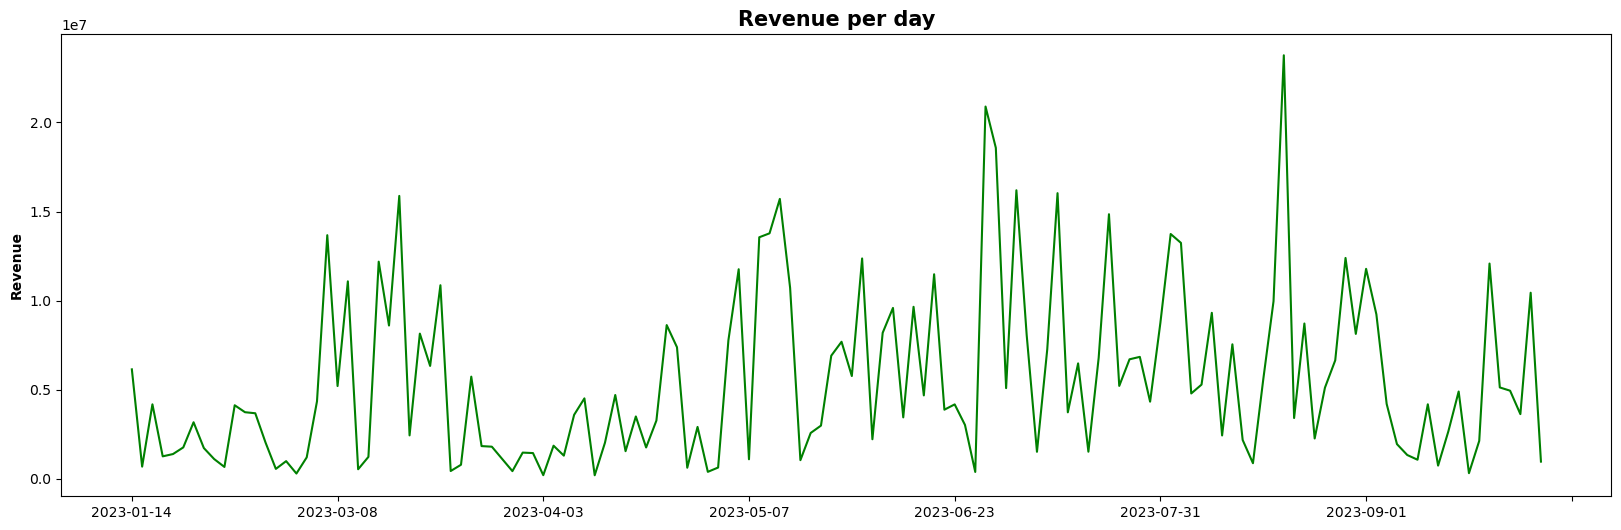

In [ ]:

import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(day_dataset.revenue, color='green', label='revenue')

max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per day', fontsize = 15, fontweight = 'bold')


plt.show()

In [ ]:
daily_affection = get_strong_week_affection(database= day_dataset, target_column= 'revenue')

c:\Users\ndp17\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
daily_affection['strong_affection']

[{'name': 'amount',
  'coef': 0.9550765512519332,
  'p_value': 1.0503591634742407e-73},
 {'name': 'purchase_price',
  'coef': 0.9089295888932899,
  'p_value': 1.6089862193175545e-53},
 {'name': 'sale_price',
  'coef': 0.9472569527789241,
  'p_value': 4.4214190858504786e-69},
 {'name': 'amount_w',
  'coef': 0.8551400029271478,
  'p_value': 1.2453661208558114e-40}]

In [ ]:
daily_affection['median_affection']

[{'name': 'amount_macys',
  'coef': 0.6202901775117202,
  'p_value': 4.919443424222419e-16},
 {'name': 'amount_black',
  'coef': 0.7250381404061004,
  'p_value': 8.791335277003482e-24},
 {'name': 'amount_white',
  'coef': 0.5065379243026793,
  'p_value': 2.317249185709448e-10},
 {'name': 'amount_m',
  'coef': 0.5307299673866048,
  'p_value': 2.1461712639803565e-11},
 {'name': 'amount_shoes',
  'coef': 0.6979416168918314,
  'p_value': 1.8545034743679404e-21}]

In [ ]:
pd.DataFrame(sum(list(daily_affection.values()),[])).sort_values(['coef'], ascending = False).head(10)

name      coef       p_value
0            amount  0.955077  1.050359e-73
2        sale_price  0.947257  4.421419e-69
1    purchase_price  0.908930  1.608986e-53
3          amount_w  0.855140  1.245366e-40
17     amount_black  0.725038  8.791335e-24
20     amount_shoes  0.697942  1.854503e-21
16     amount_macys  0.620290  4.919443e-16
19         amount_m  0.530730  2.146171e-11
18     amount_white  0.506538  2.317249e-10
15  amount_clothing  0.498558  4.880174e-10

In [ ]:
day_dataset.revenue.max()/day_dataset.amount_w.max()

457142.98076923075

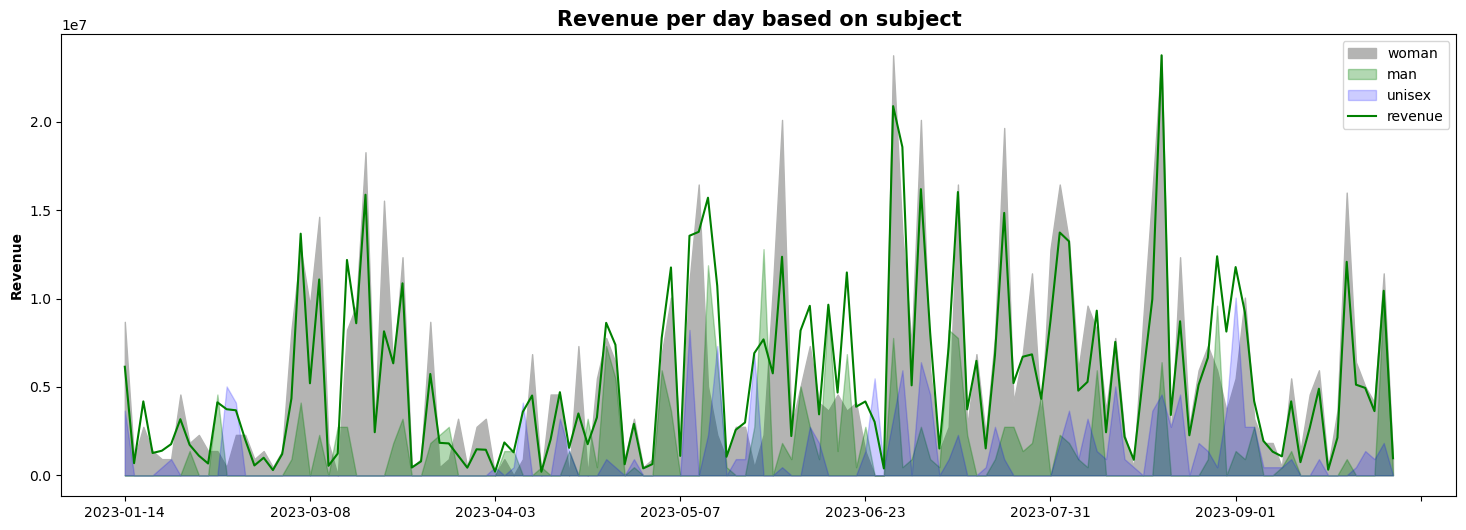

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (18,6))
_max = day_dataset.revenue.max()/day_dataset.amount_w.max()
ax.fill_between(day_dataset.index, day_dataset.amount_w*_max, color=(180/255, 180/255, 179/255), label = 'woman')
ax.fill_between(day_dataset.index, day_dataset.amount_m*_max, color='g', alpha=0.3, label = 'man')
ax.fill_between(day_dataset.index, day_dataset.amount_u*_max, color='b', alpha=0.2, label = 'unisex')

ax.plot(day_dataset.revenue, color='green', label='revenue')
max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per day based on subject', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

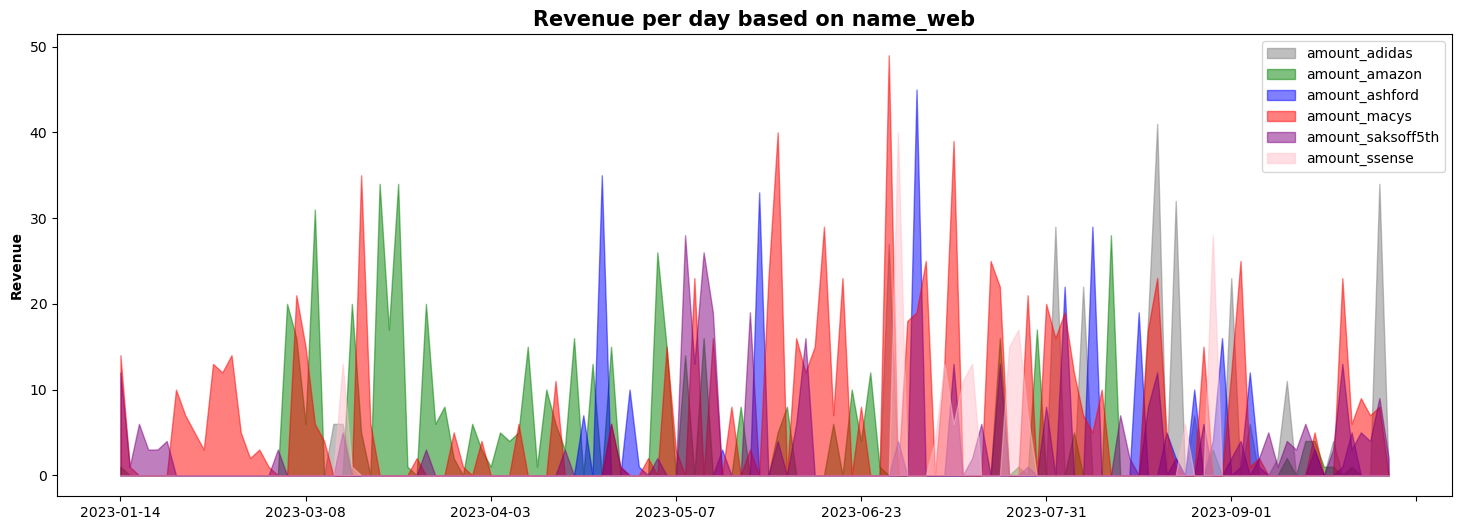

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (18,6))
color = ['gray', 'green', 'blue', 'red', 'purple', 'pink']

for i in range(8, 14):
    ax.fill_between(day_dataset.index, day_dataset.iloc[:,i], color=color[i-8], alpha=0.5, label = day_dataset.columns[i])



max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per day based on name_web', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

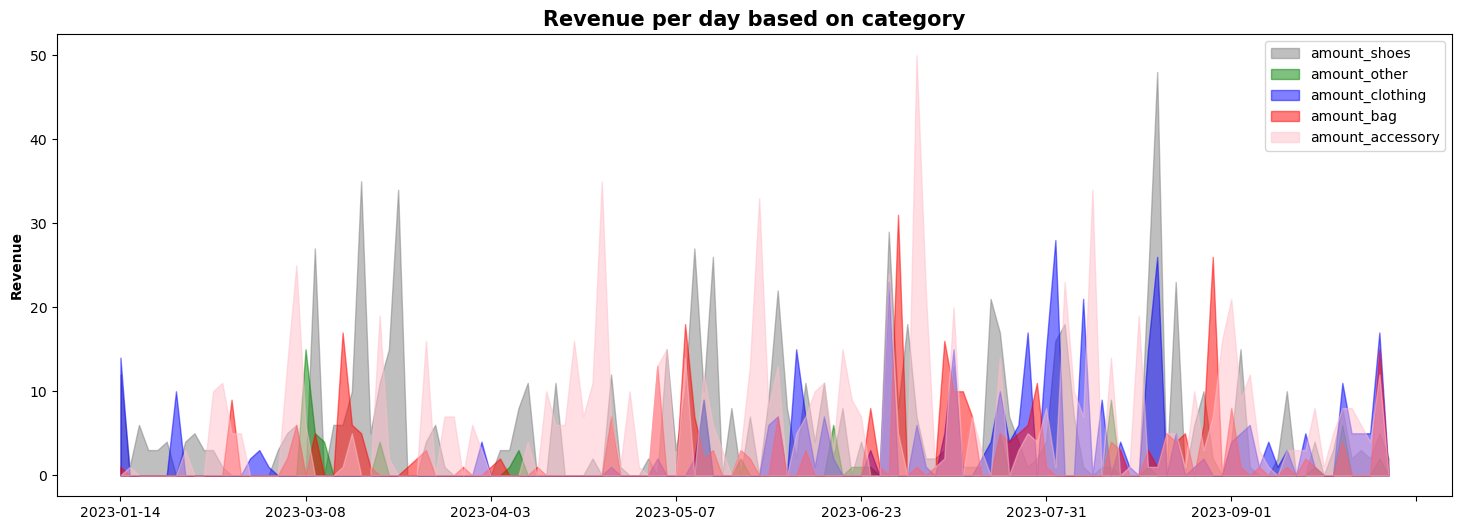

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (18,6))
color = ['gray', 'green', 'blue', 'red', 'pink']

for i in range(1, 6):
    ax.fill_between(day_dataset.index, day_dataset.iloc[:,-1*i], color=color[i-1], alpha=0.5, label = day_dataset.columns[-1*i])


max_xticks = 9
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per day based on category', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

### Monthly

In [ ]:
month_dataset = day_dataset.groupby(['month']).sum().iloc[:,2:]
month_dataset

amount  purchase_price   sale_price       revenue    %revenue  \
month                                                                  
1        55.0    4.459413e+07   63190000.0  1.859587e+07  347.810374   
2        68.0    7.527460e+07   95400000.0  2.012540e+07  320.226334   
3       349.0    3.018162e+08  414500000.0  1.126838e+08  770.740947   
4       194.0    1.732256e+08  224560000.0  5.133438e+07  609.280664   
5       292.0    2.508110e+08  347050000.0  9.623898e+07  503.347469   
6       447.0    4.334006e+08  573029000.0  1.396284e+08  623.278610   
7       328.0    3.063794e+08  404490000.0  9.811061e+07  444.046014   
8       493.0    4.615997e+08  607009000.0  1.454093e+08  601.220177   
9       283.0    2.292156e+08  310919000.0  8.170339e+07  649.929268   

       amount_adidas  amount_amazon  amount_ashford  amount_macys  \
month                                                               
1                0.0            1.0             0.0          25.0   
2                0.0            0.0             0.0          65.0   
3               12.0          220.0             0.0          95.0   
4                0.0          103.0            53.0          28.0   
5                0.0           79.0            36.0          70.0   
6               27.0           46.0            49.0         259.0   
7                0.0           34.0             8.0         165.0   
8              149.0           36.0           107.0         130.0   
9               80.0           13.0            23.0          98.0   

       amount_saksoff5th  amount_ssense  amount_beige_yellow_brown  \
month                                                                
1                   29.0            0.0                        0.0   
2                    3.0            0.0                       12.0   
3                    8.0           14.0                        0.0   
4                   10.0            0.0                        5.0   
5                  107.0            0.0                        0.0   
6                   26.0           40.0                       30.0   
7                   35.0           86.0                       20.0   
8                   37.0           34.0                       17.0   
9                   69.0            0.0                       12.0   

       amount_black  amount_blue  amount_brown  amount_camel_brown  \
month                                                                
1              29.0          0.0           0.0                 0.0   
2              24.0          7.0           0.0                 0.0   
3             145.0          0.0          15.0                 0.0   
4              61.0          2.0           4.0                 0.0   
5             111.0         35.0           8.0                 0.0   
6             139.0         10.0          10.0                11.0   
7             113.0         10.0          13.0                 1.0   
8             211.0         14.0          39.0                 0.0   
9             116.0         15.0           7.0                 0.0   

       amount_colorful  amount_cream_yellow  amount_gold_yellow  amount_gray  \
month                                                                          
1                  0.0                  0.0                 0.0          1.0   
2                  0.0                  0.0                11.0          0.0   
3                 24.0                  0.0                20.0          0.0   
4                 11.0                  0.0                43.0          2.0   
5                  0.0                  0.0                16.0         10.0   
6                  7.0                  1.0                34.0          0.0   
7                  2.0                  0.0                 8.0          2.0   
8                 44.0                  0.0                21.0         12.0   
9                 11.0                  0.0                17.0          1.0   

       amount_green  amount_gun

In [ ]:
month_dataset.to_csv('Final_monthly_data.csv', index = False)

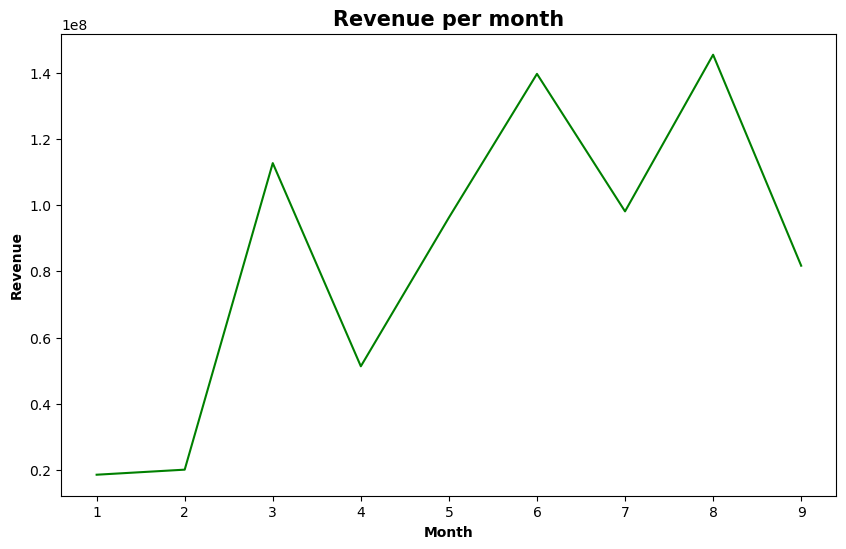

In [ ]:

import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(month_dataset.revenue, color='green', label='revenue')


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per month', fontsize = 15, fontweight = 'bold')
plt.xlabel('Month', fontweight = 'bold')

plt.show()

In [ ]:
monthly_affection = get_strong_week_affection(database= month_dataset, target_column= 'revenue')

In [ ]:
monthly_affection['strong_affection']

[{'name': 'amount',
  'coef': 0.9938172397706144,
  'p_value': 6.082218435566557e-08},
 {'name': 'purchase_price',
  'coef': 0.9855301201184004,
  'p_value': 1.1831471418340246e-06},
 {'name': 'sale_price',
  'coef': 0.9917648440561811,
  'p_value': 1.6554122451082652e-07},
 {'name': 'amount_black',
  'coef': 0.9545424369623907,
  'p_value': 6.306770387947059e-05},
 {'name': 'amount_m',
  'coef': 0.807861259991639,
  'p_value': 0.008436224360547686},
 {'name': 'amount_w',
  'coef': 0.9536610873196153,
  'p_value': 6.739343360644874e-05},
 {'name': 'amount_accessory',
  'coef': 0.8631434623833929,
  'p_value': 0.0027240859125886624},
 {'name': 'amount_bag',
  'coef': 0.8471386196037936,
  'p_value': 0.003946461146349922},
 {'name': 'amount_shoes',
  'coef': 0.9160307196906238,
  'p_value': 0.0005199488324048354}]

In [ ]:
monthly_affection['median_affection']

[{'name': '%revenue',
  'coef': 0.6715969432601012,
  'p_value': 0.04759071184692562},
 {'name': 'amount_macys',
  'coef': 0.748349907715991,
  'p_value': 0.02037072429527558},
 {'name': 'amount_brown',
  'coef': 0.7762215970766239,
  'p_value': 0.01391340537012707},
 {'name': 'amount_white',
  'coef': 0.7956847005063525,
  'p_value': 0.010328033032954658},
 {'name': 'amount_yellow',
  'coef': 0.7145848250977853,
  'p_value': 0.03052315333520368}]

In [ ]:
monthly_affection['week_affection']

[]

In [ ]:
pd.DataFrame(sum(list(monthly_affection.values()),[])).sort_values(['coef'], ascending = False).head(10)

name      coef       p_value
0             amount  0.993817  6.082218e-08
2         sale_price  0.991765  1.655412e-07
1     purchase_price  0.985530  1.183147e-06
3       amount_black  0.954542  6.306770e-05
5           amount_w  0.953661  6.739343e-05
8       amount_shoes  0.916031  5.199488e-04
6   amount_accessory  0.863143  2.724086e-03
7         amount_bag  0.847139  3.946461e-03
4           amount_m  0.807861  8.436224e-03
12      amount_white  0.795685  1.032803e-02

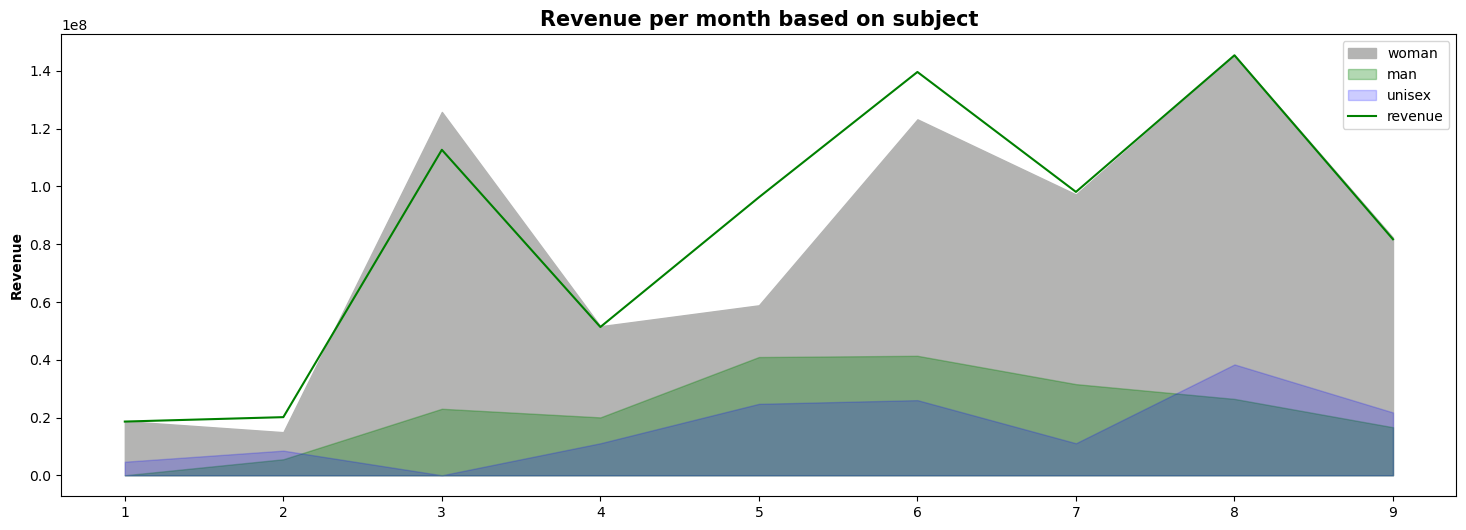

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (18,6))
_max = month_dataset.revenue.max()/month_dataset.amount_w.max()
ax.fill_between(month_dataset.index, month_dataset.amount_w*_max, color=(180/255, 180/255, 179/255), label = 'woman')
ax.fill_between(month_dataset.index, month_dataset.amount_m*_max, color='g', alpha=0.3, label = 'man')
ax.fill_between(month_dataset.index, month_dataset.amount_u*_max, color='b', alpha=0.2, label = 'unisex')

ax.plot(month_dataset.revenue, color='green', label='revenue')

ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per month based on subject', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

In [ ]:
month_dataset.columns

Index(['amount', 'purchase_price', 'sale_price', 'revenue', '%revenue',
       'amount_adidas', 'amount_amazon', 'amount_ashford', 'amount_macys',
       'amount_saksoff5th', 'amount_ssense', 'amount_beige_yellow_brown',
       'amount_black', 'amount_blue', 'amount_brown', 'amount_camel_brown',
       'amount_colorful', 'amount_cream_yellow', 'amount_gold_yellow',
       'amount_gray', 'amount_green', 'amount_gunmetal_gray',
       'amount_khaki_yellow', 'amount_navy_blue', 'amount_nude_white',
       'amount_pink', 'amount_red', 'amount_scarlet_red', 'amount_silver_gray',
       'amount_sky_blue', 'amount_sky_captain_blue', 'amount_vanilla_white',
       'amount_violet', 'amount_violet_blue', 'amount_white', 'amount_yellow',
       'amount_m', 'amount_u', 'amount_w', 'amount_accessory', 'amount_bag',
       'amount_clothing', 'amount_other', 'amount_shoes'],
      dtype='object')

In [ ]:
day_dataset.columns

Index(['year', 'month', 'day', 'amount', 'purchase_price', 'sale_price',
       'revenue', '%revenue', 'amount_adidas', 'amount_amazon',
       'amount_ashford', 'amount_macys', 'amount_saksoff5th', 'amount_ssense',
       'amount_beige_yellow_brown', 'amount_black', 'amount_blue',
       'amount_brown', 'amount_camel_brown', 'amount_colorful',
       'amount_cream_yellow', 'amount_gold_yellow', 'amount_gray',
       'amount_green', 'amount_gunmetal_gray', 'amount_khaki_yellow',
       'amount_navy_blue', 'amount_nude_white', 'amount_pink', 'amount_red',
       'amount_scarlet_red', 'amount_silver_gray', 'amount_sky_blue',
       'amount_sky_captain_blue', 'amount_vanilla_white', 'amount_violet',
       'amount_violet_blue', 'amount_white', 'amount_yellow', 'amount_m',
       'amount_u', 'amount_w', 'amount_accessory', 'amount_bag',
       'amount_clothing', 'amount_other', 'amount_shoes'],
      dtype='object')

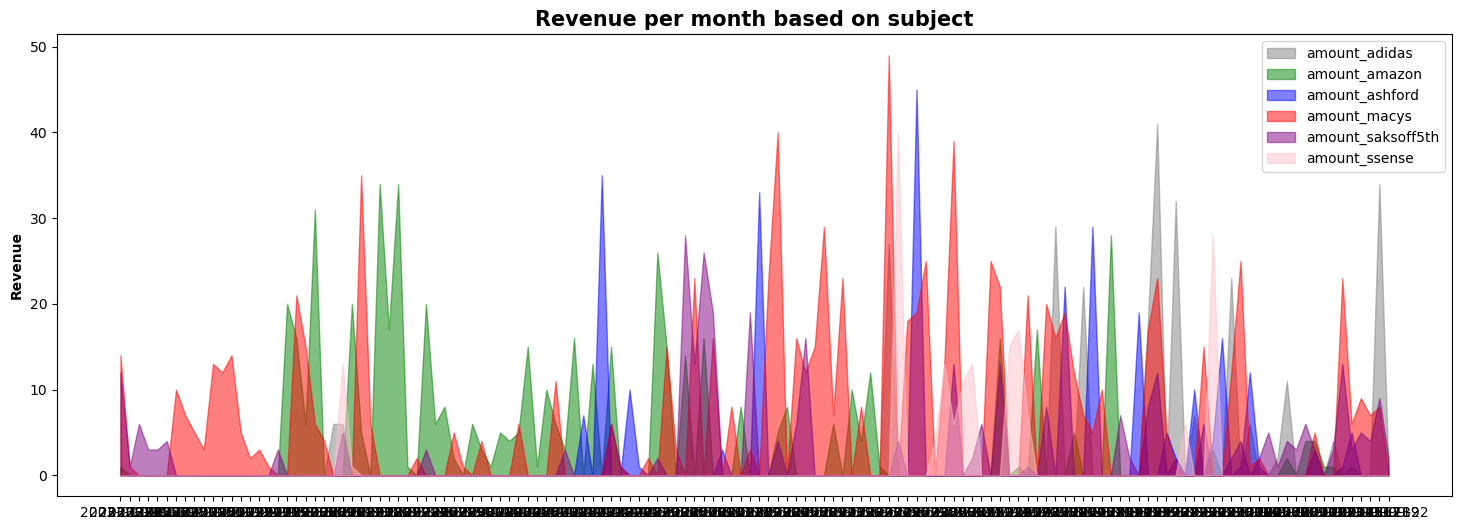

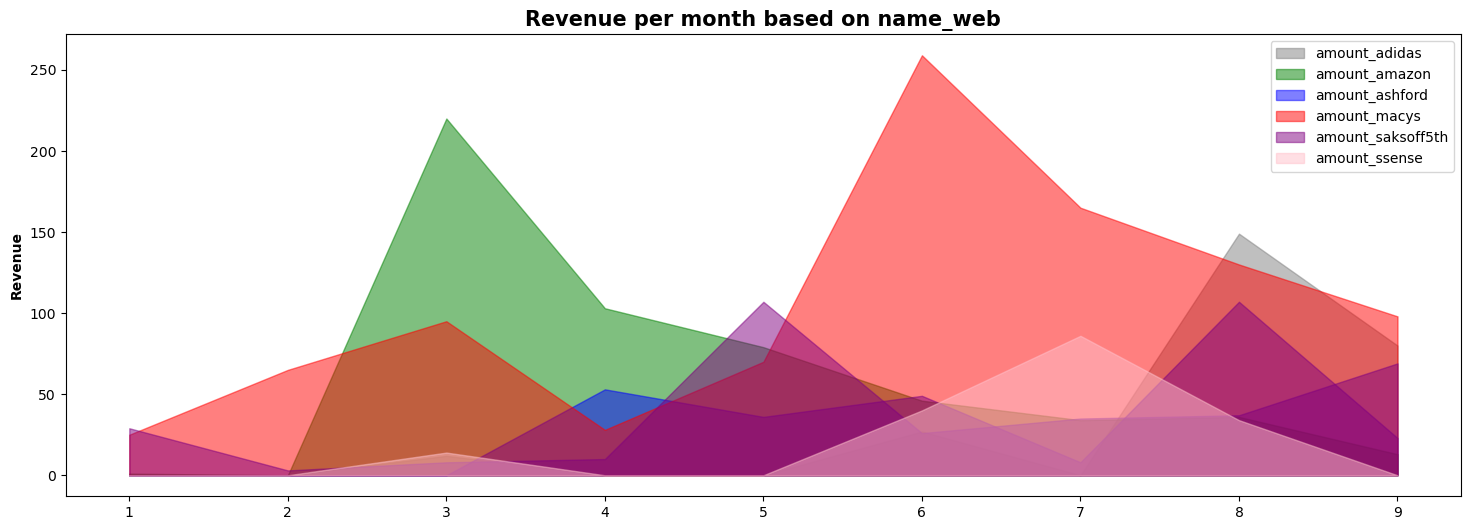

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (18,6))
_max = month_dataset.revenue.max()/month_dataset.amount_macys.max()
color = ['gray', 'green', 'blue', 'red', 'purple', 'pink']

for i in range(5, 11):
    ax.fill_between(month_dataset.index, month_dataset.iloc[:,i], color=color[i-5], alpha=0.5, label = month_dataset.columns[i])


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per month based on name_web', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

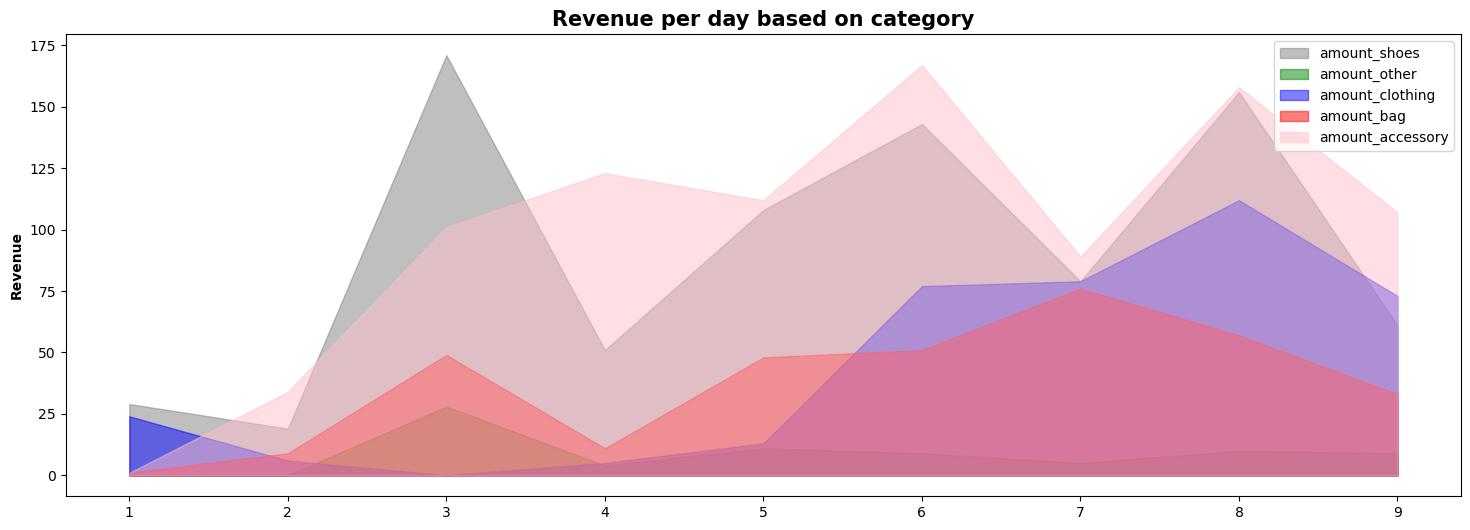

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize = (18,6))
color = ['gray', 'green', 'blue', 'red', 'pink']

for i in range(1, 6):
    ax.fill_between(month_dataset.index, month_dataset.iloc[:,-1*i], color=color[i-1], alpha=0.5, label = month_dataset.columns[-1*i])


ax.set_ylabel('Revenue', fontweight = 'bold')
plt.title('Revenue per day based on category', fontsize = 15, fontweight = 'bold')

plt.legend()
plt.show()

## Review the monthly sales


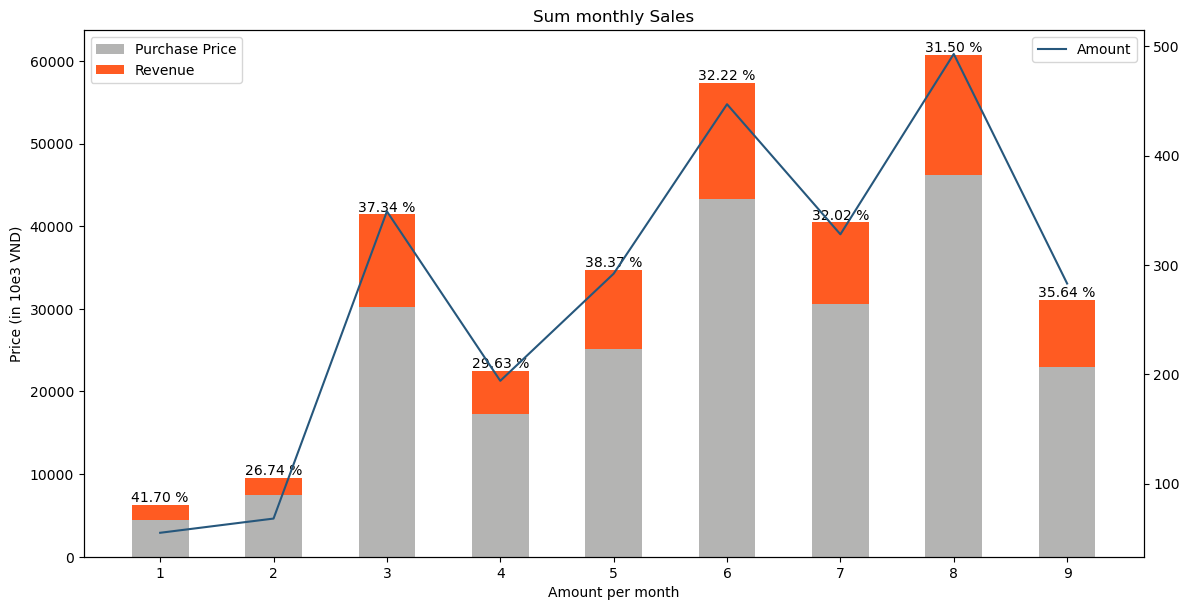

In [ ]:
sale_month = dataset18.groupby('month').sum()

n_cols, n_rows = 1, 1
fif, ax = plt.subplots(n_rows, n_cols, figsize=(12*n_rows, 6*n_cols))
ax2 = ax.twinx()

month = sale_month.index.values
ax.bar(month, sale_month['purchase_price']/10e3, width=0.5, color=(180/255, 180/255, 179/255), label = 'Purchase Price')
ax.bar(month, sale_month['revenue']/10e3, width=0.5, color=(255/255, 91/255, 34/255), bottom = sale_month['purchase_price']/10e3, label = 'Revenue')

ax.bar_label(ax.containers[1], labels=[f'{e:.2f} %' for e in 100*sale_month['revenue']/sale_month['purchase_price']])

ax2.plot(month, sale_month['amount'], color=(38/255, 87/255, 124/255), label = 'Amount')


ax.set_xlabel('Month')
ax.set_ylabel('Price (in 10e3 VND)')
ax.set_xlabel('Amount per month')

ax.set_xticks(month)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.title('Sum monthly Sales')

plt.show()

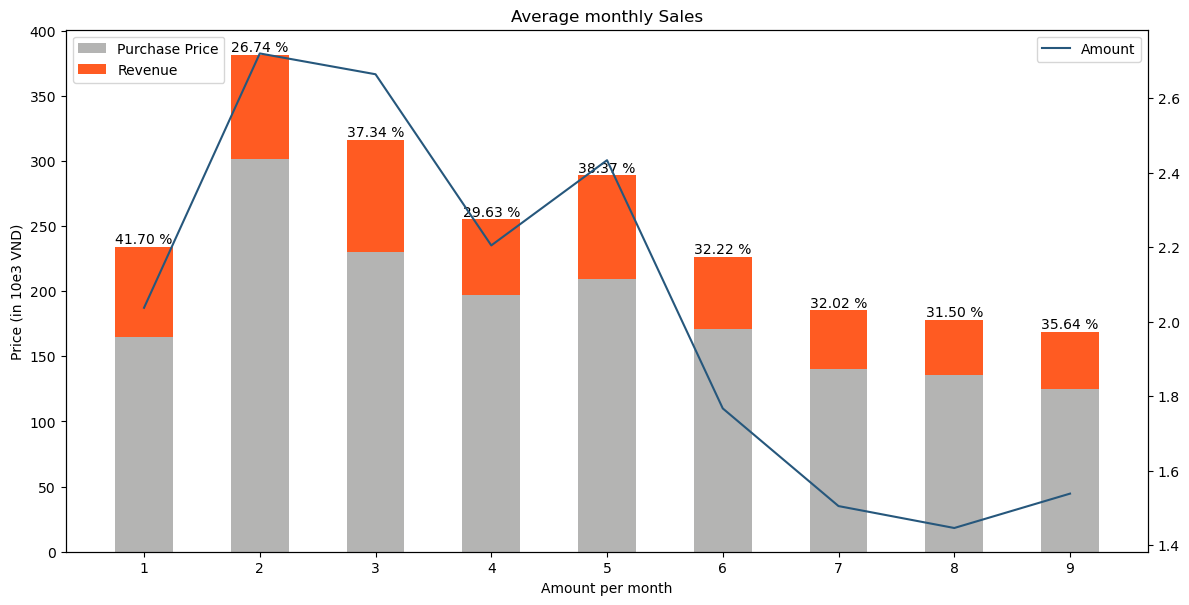

In [ ]:
sale_month = dataset18[['amount', 'month', 'purchase_price', 'revenue']].groupby('month').mean()

n_cols, n_rows = 1, 1
fif, ax = plt.subplots(n_rows, n_cols, figsize=(12*n_rows, 6*n_cols))
ax2 = ax.twinx()


month = sale_month.index.values
ax.bar(month, sale_month['purchase_price']/10e3, width=0.5, color=(180/255, 180/255, 179/255), label = 'Purchase Price')
ax.bar(month, sale_month['revenue']/10e3, width=0.5, color=(255/255, 91/255, 34/255), bottom = sale_month['purchase_price']/10e3, label = 'Revenue')

ax.bar_label(ax.containers[1], labels=[f'{e:.2f} %' for e in 100*sale_month['revenue']/sale_month['purchase_price']], label_type='edge')

ax2.plot(month, sale_month['amount'], color=(38/255, 87/255, 124/255), label = 'Amount')


ax.set_xlabel('Month')
ax.set_ylabel('Price (in 10e3 VND)')
ax.set_xlabel('Amount per month')

ax.set_xticks(month)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.tight_layout()
plt.title('Average monthly Sales')



plt.show()

## Review

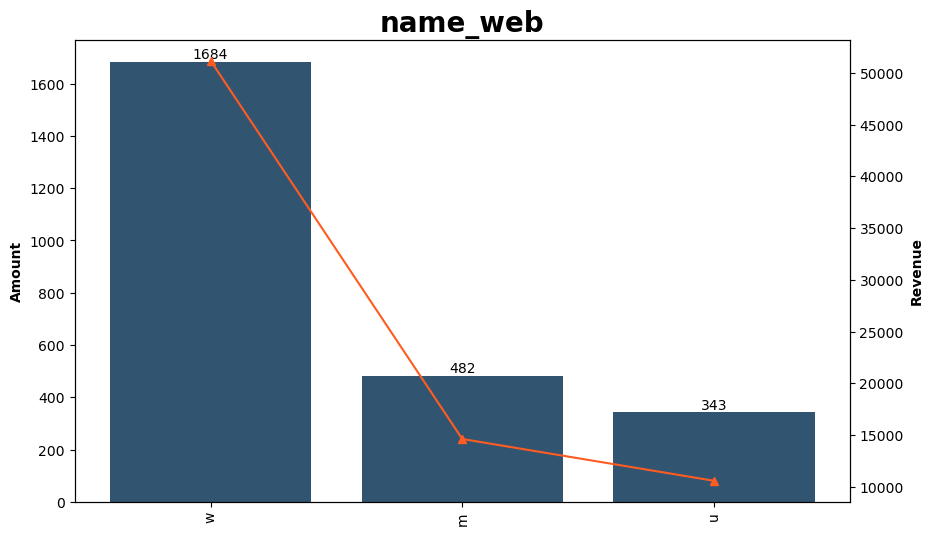

In [ ]:
sale_category1 = dataset18.groupby('subject').sum()[['purchase_price', 'sale_price', 'revenue', 'amount']]
sale_category1 = sale_category1.sort_values(['revenue', 'amount'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x, rotation = 90)

plt.title('name_web', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

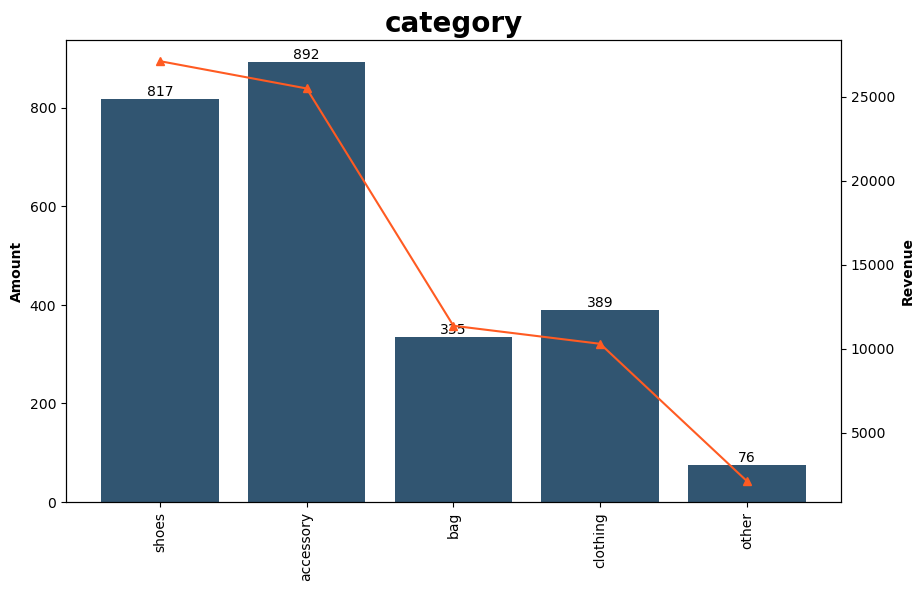

In [ ]:
sale_category1 = dataset18.groupby('category2').sum()[['purchase_price', 'sale_price', 'revenue', 'amount']]
sale_category1 = sale_category1.sort_values(['revenue', 'amount'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x, rotation = 90)

plt.title('category', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

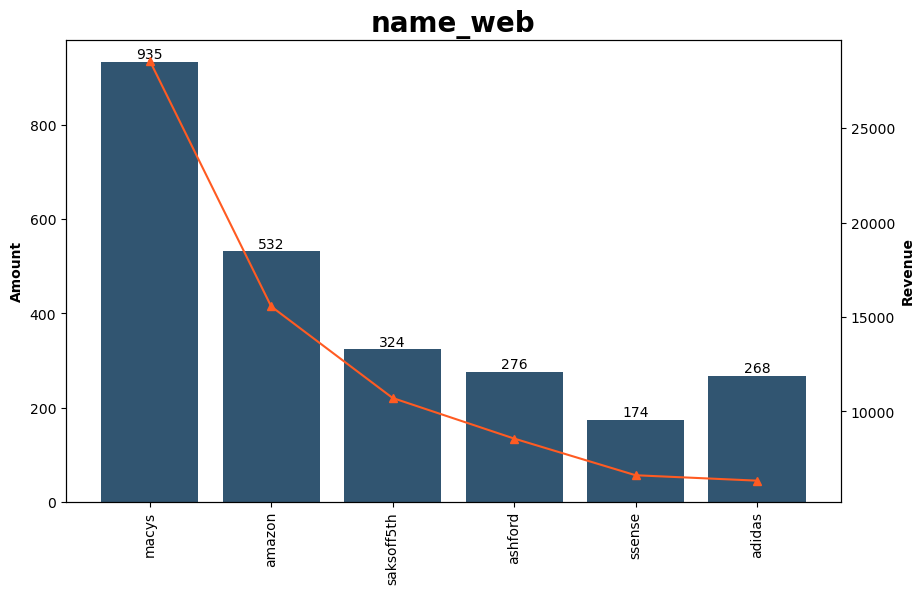

In [ ]:
sale_category1 = dataset18.groupby('name_web').sum()[['purchase_price', 'sale_price', 'revenue', 'amount']]
sale_category1 = sale_category1.sort_values(['revenue', 'amount'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x, rotation = 90)

plt.title('name_web', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()

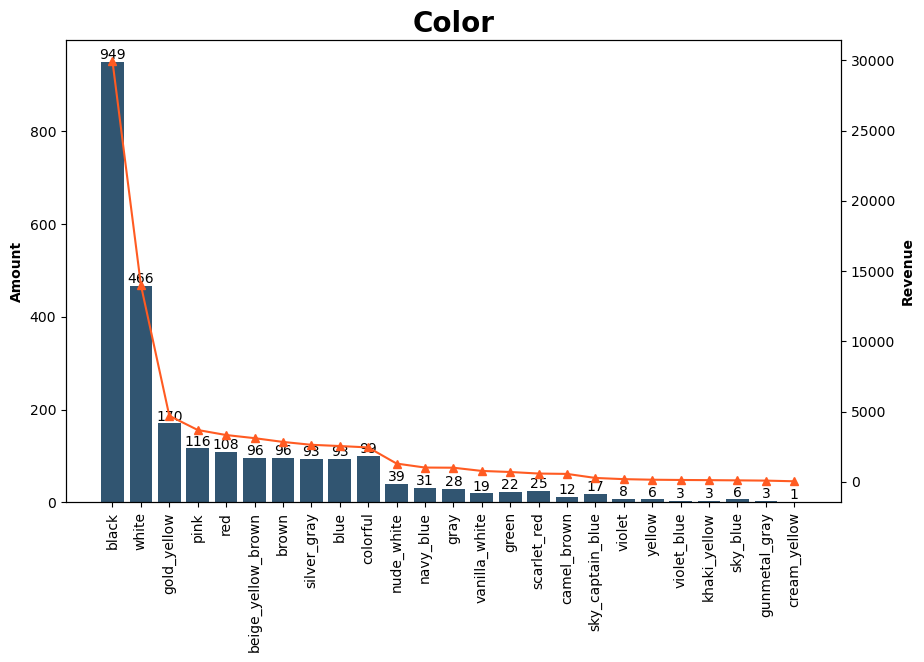

In [ ]:
sale_category1 = dataset18.groupby('color').sum()[['purchase_price', 'sale_price', 'revenue', 'amount']]
sale_category1 = sale_category1.sort_values(['revenue', 'amount'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
x = sale_category1.index

sns.barplot(ax=ax,x=x, y = sale_category1['amount'], data = sale_category1, color = (38/255, 87/255, 124/255))
ax.bar_label(ax.containers[0])

ax2.plot(x, sale_category1['revenue']/10e3,  marker = '^', color = (255/255, 91/255, 34/255), label = 'revenue')

ax.set_ylabel('Amount', fontweight = 'bold')
ax2.set_ylabel('Revenue', fontweight = 'bold')
ax.set_xlabel('')

ax.set_xticklabels(labels = x, rotation = 90)

plt.title('Color', fontsize = 20, fontweight = 'bold')
plt.grid(False)
plt.show()